In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
#import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import matplotlib.patches as patches
import os
import cartopy.mpl.ticker as cticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import re
import datetime
import pandas as pd
import matplotlib.dates as mdates
import dask.array as da
import seaborn as sns

import dask
import glob

/home/kit/imktro/gj5173/anaconda3/envs/newenvi4/lib/python3.9/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [ ]:
#load the good and bad index for the fcnv2_ens
%store -r good_forecast_index_fcnv2_ec_0616_t2m
%store -r bad_forecast_index_fcnv2_ec_0616_t2m
%store -r good_forecast_index_fcnv2_ec_0618_t2m
%store -r bad_forecast_index_fcnv2_ec_0618_t2m
%store -r good_forecast_index_fcnv2_ec_0620_t2m
%store -r bad_forecast_index_fcnv2_ec_0620_t2m
%store -r good_forecast_index_fcnv2_ec_0622_t2m
%store -r bad_forecast_index_fcnv2_ec_0622_t2m
%store -r good_forecast_index_fcnv2_ec_0626_t2m
%store -r bad_forecast_index_fcnv2_ec_0626_t2m

In [ ]:
%store -r good_forecast_index_fcnv2_ec_0616_t2m_weighted 
%store -r bad_forecast_index_fcnv2_ec_0616_t2m_weighted
%store -r good_forecast_index_fcnv2_ec_0618_t2m_weighted
%store -r bad_forecast_index_fcnv2_ec_0618_t2m_weighted
%store -r good_forecast_index_fcnv2_ec_0620_t2m_weighted
%store -r bad_forecast_index_fcnv2_ec_0620_t2m_weighted 
%store -r good_forecast_index_fcnv2_ec_0622_t2m_weighted
%store -r bad_forecast_index_fcnv2_ec_0622_t2m_weighted
%store -r good_forecast_index_fcnv2_ec_0626_t2m_weighted
%store -r bad_forecast_index_fcnv2_ec_0626_t2m_weighted 

In [ ]:
%store -r good_forecast_index_fcnv2_ec_0616_t2m_range_weighted
%store -r bad_forecast_index_fcnv2_ec_0616_t2m_range_weighted
%store -r good_forecast_index_fcnv2_ec_0618_t2m_range_weighted
%store -r bad_forecast_index_fcnv2_ec_0618_t2m_range_weighted
%store -r good_forecast_index_fcnv2_ec_0620_t2m_range_weighted
%store -r bad_forecast_index_fcnv2_ec_0620_t2m_range_weighted
%store -r good_forecast_index_fcnv2_ec_0622_t2m_range_weighted
%store -r bad_forecast_index_fcnv2_ec_0622_t2m_range_weighted
%store -r good_forecast_index_fcnv2_ec_0626_t2m_range_weighted
%store -r bad_forecast_index_fcnv2_ec_0626_t2m_range_weighted
%store -r good_forecast_index_fcnv2_ec_0624_t2m_range_weighted
%store -r bad_forecast_index_fcnv2_ec_0624_t2m_range_weighted

In [ ]:
#from the rmse_tem_vertical
%store -r ds_fcnv2_ec_0616_ens
%store -r ds_fcnv2_ec_0618_ens
%store -r ds_fcnv2_ec_0620_ens
%store -r ds_fcnv2_ec_0622_ens

In [ ]:
%store -r ds_fcnv2_ec_0623_ens
%store -r ds_fcnv2_ec_0624_ens
%store -r ds_fcnv2_ec_0626_ens

In [ ]:
ds_fcnv2_ec_0616_ens['z'][:,:,7,:,:]

In [ ]:
###t2m forecast on 29.06 00utc, north america area ############################
ds_fcnv2_ec_0616_ens_t2m_0629 = ds_fcnv2_ec_0616_ens['2t'][:,51,0,260:39:-1,720:1201]
ds_fcnv2_ec_0618_ens_t2m_0629 = ds_fcnv2_ec_0618_ens['2t'][:,43,0,260:39:-1,720:1201]
ds_fcnv2_ec_0620_ens_t2m_0629 = ds_fcnv2_ec_0620_ens['2t'][:,35,0,260:39:-1,720:1201]
ds_fcnv2_ec_0622_ens_t2m_0629 = ds_fcnv2_ec_0622_ens['2t'][:,27,0,260:39:-1,720:1201]
ds_fcnv2_ec_0623_ens_t2m_0629 = ds_fcnv2_ec_0623_ens['2t'][:,23,0,260:39:-1,720:1201]
ds_fcnv2_ec_0626_ens_t2m_0629 = ds_fcnv2_ec_0626_ens['2t'][:,11,0,260:39:-1,720:1201]

In [ ]:
###t2m forecast on 29.06 00utc-01.07, north america area ############################
ds_fcnv2_ec_0616_ens_t2m_2701 = ds_fcnv2_ec_0616_ens['2t'][:,43:60,0,260:39:-1,720:1201]
ds_fcnv2_ec_0618_ens_t2m_2701 = ds_fcnv2_ec_0618_ens['2t'][:,35:52,0,260:39:-1,720:1201]
ds_fcnv2_ec_0620_ens_t2m_2701 = ds_fcnv2_ec_0620_ens['2t'][:,27:44,0,260:39:-1,720:1201]
ds_fcnv2_ec_0622_ens_t2m_2701 = ds_fcnv2_ec_0622_ens['2t'][:,19:36,0,260:39:-1,720:1201]
ds_fcnv2_ec_0623_ens_t2m_2701 = ds_fcnv2_ec_0623_ens['2t'][:,15:32,0,260:39:-1,720:1201]
ds_fcnv2_ec_0624_ens_t2m_2701 = ds_fcnv2_ec_0624_ens['2t'][:,11:28,0,260:39:-1,720:1201]
ds_fcnv2_ec_0626_ens_t2m_2701 = ds_fcnv2_ec_0626_ens['2t'][:,3:20,0,260:39:-1,720:1201]

In [ ]:
###z500 forecast on 29.06 00utc, north america area ############################
ds_fcnv2_ec_0616_ens_z500_0629 = ds_fcnv2_ec_0616_ens['z'][:,51,7,260:39:-1,720:1201]
ds_fcnv2_ec_0618_ens_z500_0629 = ds_fcnv2_ec_0618_ens['z'][:,43,7,260:39:-1,720:1201]
ds_fcnv2_ec_0620_ens_z500_0629 = ds_fcnv2_ec_0620_ens['z'][:,35,7,260:39:-1,720:1201]
ds_fcnv2_ec_0622_ens_z500_0629 = ds_fcnv2_ec_0622_ens['z'][:,27,7,260:39:-1,720:1201]
ds_fcnv2_ec_0623_ens_z500_0629 = ds_fcnv2_ec_0623_ens['z'][:,23,7,260:39:-1,720:1201]
ds_fcnv2_ec_0626_ens_z500_0629 = ds_fcnv2_ec_0626_ens['z'][:,11,7,260:39:-1,720:1201]

In [ ]:
###z500 forecast on 29.06 00utc-01.07, north america area ############################
ds_fcnv2_ec_0616_ens_z500_2701 = ds_fcnv2_ec_0616_ens['z'][:,43:60,7,260:39:-1,720:1201]
ds_fcnv2_ec_0618_ens_z500_2701 = ds_fcnv2_ec_0618_ens['z'][:,35:52,7,260:39:-1,720:1201]
ds_fcnv2_ec_0620_ens_z500_2701 = ds_fcnv2_ec_0620_ens['z'][:,27:44,7,260:39:-1,720:1201]
ds_fcnv2_ec_0622_ens_z500_2701 = ds_fcnv2_ec_0622_ens['z'][:,19:36,7,260:39:-1,720:1201]
ds_fcnv2_ec_0623_ens_z500_2701 = ds_fcnv2_ec_0623_ens['z'][:,15:32,7,260:39:-1,720:1201]
ds_fcnv2_ec_0624_ens_z500_2701 = ds_fcnv2_ec_0624_ens['z'][:,11:28,7,260:39:-1,720:1201]
ds_fcnv2_ec_0626_ens_z500_2701 = ds_fcnv2_ec_0626_ens['z'][:,3:20,7,260:39:-1,720:1201]

In [ ]:
ds_fcnv2_ec_0616_ens_t2m_0629_na_good = ds_fcnv2_ec_0616_ens_t2m_0629[good_forecast_index_fcnv2_ec_0616_t2m_weighted]
ds_fcnv2_ec_0618_ens_t2m_0629_na_good = ds_fcnv2_ec_0618_ens_t2m_0629[good_forecast_index_fcnv2_ec_0618_t2m_weighted]
ds_fcnv2_ec_0620_ens_t2m_0629_na_good = ds_fcnv2_ec_0620_ens_t2m_0629[good_forecast_index_fcnv2_ec_0620_t2m_weighted]
ds_fcnv2_ec_0622_ens_t2m_0629_na_good = ds_fcnv2_ec_0622_ens_t2m_0629[good_forecast_index_fcnv2_ec_0622_t2m_weighted]



ds_fcnv2_ec_0616_ens_t2m_0629_na_bad = ds_fcnv2_ec_0616_ens_t2m_0629[bad_forecast_index_fcnv2_ec_0616_t2m_weighted]
ds_fcnv2_ec_0618_ens_t2m_0629_na_bad = ds_fcnv2_ec_0618_ens_t2m_0629[bad_forecast_index_fcnv2_ec_0618_t2m_weighted]
ds_fcnv2_ec_0620_ens_t2m_0629_na_bad = ds_fcnv2_ec_0620_ens_t2m_0629[bad_forecast_index_fcnv2_ec_0620_t2m_weighted]
ds_fcnv2_ec_0622_ens_t2m_0629_na_bad = ds_fcnv2_ec_0622_ens_t2m_0629[bad_forecast_index_fcnv2_ec_0622_t2m_weighted]


In [ ]:
ds_fcnv2_ec_0626_ens_t2m_0629_na_good = ds_fcnv2_ec_0626_ens_t2m_0629[good_forecast_index_fcnv2_ec_0626_t2m_weighted]
ds_fcnv2_ec_0626_ens_t2m_0629_na_bad = ds_fcnv2_ec_0626_ens_t2m_0629[bad_forecast_index_fcnv2_ec_0626_t2m_weighted]

In [ ]:
ds_fcnv2_ec_0616_ens_t2m_0629_na_good_mean = np.mean(ds_fcnv2_ec_0616_ens_t2m_0629_na_good, axis=0)
ds_fcnv2_ec_0618_ens_t2m_0629_na_good_mean = np.mean(ds_fcnv2_ec_0618_ens_t2m_0629_na_good, axis=0)
ds_fcnv2_ec_0620_ens_t2m_0629_na_good_mean = np.mean(ds_fcnv2_ec_0620_ens_t2m_0629_na_good, axis=0)
ds_fcnv2_ec_0622_ens_t2m_0629_na_good_mean = np.mean(ds_fcnv2_ec_0622_ens_t2m_0629_na_good, axis=0)

ds_fcnv2_ec_0616_ens_t2m_0629_na_bad_mean = np.mean(ds_fcnv2_ec_0616_ens_t2m_0629_na_bad, axis=0)
ds_fcnv2_ec_0618_ens_t2m_0629_na_bad_mean = np.mean(ds_fcnv2_ec_0618_ens_t2m_0629_na_bad, axis=0)
ds_fcnv2_ec_0620_ens_t2m_0629_na_bad_mean = np.mean(ds_fcnv2_ec_0620_ens_t2m_0629_na_bad, axis=0)
ds_fcnv2_ec_0622_ens_t2m_0629_na_bad_mean = np.mean(ds_fcnv2_ec_0622_ens_t2m_0629_na_bad, axis=0)

In [ ]:
ds_fcnv2_ec_0626_ens_t2m_0629_na_good_mean = np.mean(ds_fcnv2_ec_0626_ens_t2m_0629_na_good, axis=0)
ds_fcnv2_ec_0626_ens_t2m_0629_na_bad_mean = np.mean(ds_fcnv2_ec_0626_ens_t2m_0629_na_bad, axis=0)

In [ ]:
ds_fcnv2_ec_0616_ens_z500_0629_na_good = ds_fcnv2_ec_0616_ens_z500_0629[good_forecast_index_fcnv2_ec_0616_t2m_weighted]
ds_fcnv2_ec_0618_ens_z500_0629_na_good = ds_fcnv2_ec_0618_ens_z500_0629[good_forecast_index_fcnv2_ec_0618_t2m_weighted]
ds_fcnv2_ec_0620_ens_z500_0629_na_good = ds_fcnv2_ec_0620_ens_z500_0629[good_forecast_index_fcnv2_ec_0620_t2m_weighted]
ds_fcnv2_ec_0622_ens_z500_0629_na_good = ds_fcnv2_ec_0622_ens_z500_0629[good_forecast_index_fcnv2_ec_0622_t2m_weighted]



ds_fcnv2_ec_0616_ens_z500_0629_na_bad = ds_fcnv2_ec_0616_ens_z500_0629[bad_forecast_index_fcnv2_ec_0616_t2m_weighted]
ds_fcnv2_ec_0618_ens_z500_0629_na_bad = ds_fcnv2_ec_0618_ens_z500_0629[bad_forecast_index_fcnv2_ec_0618_t2m_weighted]
ds_fcnv2_ec_0620_ens_z500_0629_na_bad = ds_fcnv2_ec_0620_ens_z500_0629[bad_forecast_index_fcnv2_ec_0620_t2m_weighted]
ds_fcnv2_ec_0622_ens_z500_0629_na_bad = ds_fcnv2_ec_0622_ens_z500_0629[bad_forecast_index_fcnv2_ec_0622_t2m_weighted]


In [ ]:
ds_fcnv2_ec_0626_ens_z500_0629_na_good = ds_fcnv2_ec_0626_ens_z500_0629[good_forecast_index_fcnv2_ec_0626_t2m_weighted]
ds_fcnv2_ec_0626_ens_z500_0629_na_bad = ds_fcnv2_ec_0626_ens_z500_0629[bad_forecast_index_fcnv2_ec_0626_t2m_weighted]

In [ ]:
ds_fcnv2_ec_0616_ens_z500_0629_na_good_mean = np.mean(ds_fcnv2_ec_0616_ens_z500_0629_na_good, axis=0)
ds_fcnv2_ec_0618_ens_z500_0629_na_good_mean = np.mean(ds_fcnv2_ec_0618_ens_z500_0629_na_good, axis=0)
ds_fcnv2_ec_0620_ens_z500_0629_na_good_mean = np.mean(ds_fcnv2_ec_0620_ens_z500_0629_na_good, axis=0)
ds_fcnv2_ec_0622_ens_z500_0629_na_good_mean = np.mean(ds_fcnv2_ec_0622_ens_z500_0629_na_good, axis=0)

ds_fcnv2_ec_0616_ens_z500_0629_na_bad_mean = np.mean(ds_fcnv2_ec_0616_ens_z500_0629_na_bad, axis=0)
ds_fcnv2_ec_0618_ens_z500_0629_na_bad_mean = np.mean(ds_fcnv2_ec_0618_ens_z500_0629_na_bad, axis=0)
ds_fcnv2_ec_0620_ens_z500_0629_na_bad_mean = np.mean(ds_fcnv2_ec_0620_ens_z500_0629_na_bad, axis=0)
ds_fcnv2_ec_0622_ens_z500_0629_na_bad_mean = np.mean(ds_fcnv2_ec_0622_ens_z500_0629_na_bad, axis=0)

In [ ]:
ds_fcnv2_ec_0626_ens_z500_0629_na_good_mean = np.mean(ds_fcnv2_ec_0626_ens_z500_0629_na_good, axis=0)
ds_fcnv2_ec_0626_ens_z500_0629_na_bad_mean = np.mean(ds_fcnv2_ec_0626_ens_z500_0629_na_bad, axis=0)

In [ ]:
############# choos ethe range  bad and good members #######################################

In [ ]:
ds_fcnv2_ec_0616_ens_t2m_2701_na_good = ds_fcnv2_ec_0616_ens_t2m_2701[good_forecast_index_fcnv2_ec_0616_t2m_range_weighted]
ds_fcnv2_ec_0618_ens_t2m_2701_na_good = ds_fcnv2_ec_0618_ens_t2m_2701[good_forecast_index_fcnv2_ec_0618_t2m_range_weighted]
ds_fcnv2_ec_0620_ens_t2m_2701_na_good = ds_fcnv2_ec_0620_ens_t2m_2701[good_forecast_index_fcnv2_ec_0620_t2m_range_weighted]
ds_fcnv2_ec_0622_ens_t2m_2701_na_good = ds_fcnv2_ec_0622_ens_t2m_2701[good_forecast_index_fcnv2_ec_0622_t2m_range_weighted]
ds_fcnv2_ec_0624_ens_t2m_2701_na_good = ds_fcnv2_ec_0624_ens_t2m_2701[good_forecast_index_fcnv2_ec_0624_t2m_range_weighted]


ds_fcnv2_ec_0616_ens_t2m_2701_na_bad = ds_fcnv2_ec_0616_ens_t2m_2701[bad_forecast_index_fcnv2_ec_0616_t2m_range_weighted]
ds_fcnv2_ec_0618_ens_t2m_2701_na_bad = ds_fcnv2_ec_0618_ens_t2m_2701[bad_forecast_index_fcnv2_ec_0618_t2m_range_weighted]
ds_fcnv2_ec_0620_ens_t2m_2701_na_bad = ds_fcnv2_ec_0620_ens_t2m_2701[bad_forecast_index_fcnv2_ec_0620_t2m_range_weighted]
ds_fcnv2_ec_0622_ens_t2m_2701_na_bad = ds_fcnv2_ec_0622_ens_t2m_2701[bad_forecast_index_fcnv2_ec_0622_t2m_range_weighted]
ds_fcnv2_ec_0624_ens_t2m_2701_na_bad = ds_fcnv2_ec_0624_ens_t2m_2701[bad_forecast_index_fcnv2_ec_0624_t2m_range_weighted]

In [ ]:
ds_fcnv2_ec_0616_ens_t2m_2701_na_good_mean = np.mean(ds_fcnv2_ec_0616_ens_t2m_2701_na_good, axis=0)
ds_fcnv2_ec_0618_ens_t2m_2701_na_good_mean = np.mean(ds_fcnv2_ec_0618_ens_t2m_2701_na_good, axis=0)
ds_fcnv2_ec_0620_ens_t2m_2701_na_good_mean = np.mean(ds_fcnv2_ec_0620_ens_t2m_2701_na_good, axis=0)
ds_fcnv2_ec_0622_ens_t2m_2701_na_good_mean = np.mean(ds_fcnv2_ec_0622_ens_t2m_2701_na_good, axis=0)
ds_fcnv2_ec_0624_ens_t2m_2701_na_good_mean = np.mean(ds_fcnv2_ec_0624_ens_t2m_2701_na_good, axis=0)

ds_fcnv2_ec_0616_ens_t2m_2701_na_bad_mean = np.mean(ds_fcnv2_ec_0616_ens_t2m_2701_na_bad, axis=0)
ds_fcnv2_ec_0618_ens_t2m_2701_na_bad_mean = np.mean(ds_fcnv2_ec_0618_ens_t2m_2701_na_bad, axis=0)
ds_fcnv2_ec_0620_ens_t2m_2701_na_bad_mean = np.mean(ds_fcnv2_ec_0620_ens_t2m_2701_na_bad, axis=0)
ds_fcnv2_ec_0622_ens_t2m_2701_na_bad_mean = np.mean(ds_fcnv2_ec_0622_ens_t2m_2701_na_bad, axis=0)
ds_fcnv2_ec_0624_ens_t2m_2701_na_bad_mean = np.mean(ds_fcnv2_ec_0624_ens_t2m_2701_na_bad, axis=0)

In [ ]:
ds_fcnv2_ec_0616_ens_z500_2701_na_good = ds_fcnv2_ec_0616_ens_z500_2701[good_forecast_index_fcnv2_ec_0616_t2m_range_weighted]
ds_fcnv2_ec_0618_ens_z500_2701_na_good = ds_fcnv2_ec_0618_ens_z500_2701[good_forecast_index_fcnv2_ec_0618_t2m_range_weighted]
ds_fcnv2_ec_0620_ens_z500_2701_na_good = ds_fcnv2_ec_0620_ens_z500_2701[good_forecast_index_fcnv2_ec_0620_t2m_range_weighted]
ds_fcnv2_ec_0622_ens_z500_2701_na_good = ds_fcnv2_ec_0622_ens_z500_2701[good_forecast_index_fcnv2_ec_0622_t2m_range_weighted]
ds_fcnv2_ec_0624_ens_z500_2701_na_good = ds_fcnv2_ec_0624_ens_z500_2701[good_forecast_index_fcnv2_ec_0624_t2m_range_weighted]

ds_fcnv2_ec_0616_ens_z500_2701_na_bad = ds_fcnv2_ec_0616_ens_z500_2701[bad_forecast_index_fcnv2_ec_0616_t2m_range_weighted]
ds_fcnv2_ec_0618_ens_z500_2701_na_bad = ds_fcnv2_ec_0618_ens_z500_2701[bad_forecast_index_fcnv2_ec_0618_t2m_range_weighted]
ds_fcnv2_ec_0620_ens_z500_2701_na_bad = ds_fcnv2_ec_0620_ens_z500_2701[bad_forecast_index_fcnv2_ec_0620_t2m_range_weighted]
ds_fcnv2_ec_0622_ens_z500_2701_na_bad = ds_fcnv2_ec_0622_ens_z500_2701[bad_forecast_index_fcnv2_ec_0622_t2m_range_weighted]
ds_fcnv2_ec_0624_ens_z500_2701_na_bad = ds_fcnv2_ec_0624_ens_z500_2701[bad_forecast_index_fcnv2_ec_0624_t2m_range_weighted]

In [ ]:
ds_fcnv2_ec_0616_ens_z500_2701_na_good_mean = np.mean(ds_fcnv2_ec_0616_ens_z500_2701_na_good, axis=0)
ds_fcnv2_ec_0618_ens_z500_2701_na_good_mean = np.mean(ds_fcnv2_ec_0618_ens_z500_2701_na_good, axis=0)
ds_fcnv2_ec_0620_ens_z500_2701_na_good_mean = np.mean(ds_fcnv2_ec_0620_ens_z500_2701_na_good, axis=0)
ds_fcnv2_ec_0622_ens_z500_2701_na_good_mean = np.mean(ds_fcnv2_ec_0622_ens_z500_2701_na_good, axis=0)
ds_fcnv2_ec_0624_ens_z500_2701_na_good_mean = np.mean(ds_fcnv2_ec_0624_ens_z500_2701_na_good, axis=0)

ds_fcnv2_ec_0616_ens_z500_2701_na_bad_mean = np.mean(ds_fcnv2_ec_0616_ens_z500_2701_na_bad, axis=0)
ds_fcnv2_ec_0618_ens_z500_2701_na_bad_mean = np.mean(ds_fcnv2_ec_0618_ens_z500_2701_na_bad, axis=0)
ds_fcnv2_ec_0620_ens_z500_2701_na_bad_mean = np.mean(ds_fcnv2_ec_0620_ens_z500_2701_na_bad, axis=0)
ds_fcnv2_ec_0622_ens_z500_2701_na_bad_mean = np.mean(ds_fcnv2_ec_0622_ens_z500_2701_na_bad, axis=0)
ds_fcnv2_ec_0624_ens_z500_2701_na_bad_mean = np.mean(ds_fcnv2_ec_0624_ens_z500_2701_na_bad, axis=0)

In [ ]:
############################################## load the climatology dataset ###############################################################################

In [3]:
clim_z500 = xr.open_dataset('/home/kit/imktro/gj5173/tmp/clim_Z50000_30day_centered_on_0629_1979-2020_-180.0--60.0degE_25.0-80.0degN_by_grid_point',engine = 'netcdf4')

In [4]:
clim_t2m = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Transregio/Gruppe_Grams/ry9527/data/climatologies_ERA5/fields/clim_T2M_JJ_1979-2020_00UTC.nc',engine = 'netcdf4')

In [5]:
clim_t2m_na = clim_t2m.sel(latitude=slice(25, 79.5),longitude = slice(-180,-60.5))

In [6]:
test_z500_anomaly = ds_fcnv2_ec_0616_ens['z'][0,51,7,260:39:-1,720:1201][0:219,0:479]

NameError: name 'ds_fcnv2_ec_0616_ens' is not defined

In [ ]:
test_z500_anomaly

In [ ]:
test_z500_anomaly_computed = test_z500_anomaly.compute()

In [ ]:
test_z500_anomaly_interpolated = test_z500_anomaly_computed.interp(coords={'lat': np.linspace(25, 79.5, 110), 'lon': np.linspace(180, 299.5, 240)}, method='cubic')

In [2]:
def calculate_batch_difference(v1, v2, batch_size):
    """
    Calculate the point-wise difference between two arrays (v2 - v1) in batches.

    Parameters:
    - v1: The first input array.
    - v2: The second input array.
    - batch_size: The desired batch size for processing.

    Returns:
    - An array containing the point-wise differences between v2 and v1.
    """
    # Get the shape of the input arrays
    rows, cols = v1.shape
    
    # Initialize the difference array
    difference = np.empty((rows, cols))

    for i in range(0, rows, batch_size):
        for j in range(0, cols, batch_size):
            batch_variable1 = v1[i:i + batch_size, j:j + batch_size]
            batch_variable2 = v2[i:i + batch_size, j:j + batch_size]
            
            # Calculate the difference point by point for the current batch
            batch_difference = batch_variable2 - batch_variable1

            # Update the difference array with the current batch_difference
            difference[i:i + batch_size, j:j + batch_size] = batch_difference

    return difference

In [ ]:
test_z500_anomaly_interpolated['lon'] = test_z500_anomaly_interpolated['lon']-360

In [ ]:
test_z500_anomaly_interpolated

In [ ]:
clim_z500.Z[:,:]

In [ ]:
test_z500_anomaly_clim_interpolated =calculate_batch_difference(test_z500_anomaly_interpolated, clim_z500.Z, 10)

In [ ]:
np.shape(test_z500_anomaly_clim_interpolated)

In [ ]:
####################################compute the ensembles anomaly-z500-fcnv2_ec################################################

In [ ]:
ds_fcnv2_ec_0616_ens_z500_0629_na_good_mean[0:219,0:479]

In [ ]:
##########good memebrs z500 fcnv2_ec ######################################################################

In [ ]:
ds_fcnv2_ec_0616_ens_z500_0629_na_good_interpolated =  ds_fcnv2_ec_0616_ens_z500_0629_na_good_mean[0:219,0:479].interp(coords={'lat': np.linspace(25, 79.5, 110), 'lon': np.linspace(180, 299.5, 240)}, method='cubic')
ds_fcnv2_ec_0618_ens_z500_0629_na_good_interpolated =  ds_fcnv2_ec_0618_ens_z500_0629_na_good_mean[0:219,0:479].interp(coords={'lat': np.linspace(25, 79.5, 110), 'lon': np.linspace(180, 299.5, 240)}, method='cubic')
ds_fcnv2_ec_0620_ens_z500_0629_na_good_interpolated =  ds_fcnv2_ec_0620_ens_z500_0629_na_good_mean[0:219,0:479].interp(coords={'lat': np.linspace(25, 79.5, 110), 'lon': np.linspace(180, 299.5, 240)}, method='cubic')
ds_fcnv2_ec_0622_ens_z500_0629_na_good_interpolated =  ds_fcnv2_ec_0622_ens_z500_0629_na_good_mean[0:219,0:479].interp(coords={'lat': np.linspace(25, 79.5, 110), 'lon': np.linspace(180, 299.5, 240)}, method='cubic')

In [ ]:
#dont run this block more than once
ds_fcnv2_ec_0616_ens_z500_0629_na_good_interpolated['lon'] = ds_fcnv2_ec_0616_ens_z500_0629_na_good_interpolated['lon']-360
ds_fcnv2_ec_0618_ens_z500_0629_na_good_interpolated['lon'] = ds_fcnv2_ec_0618_ens_z500_0629_na_good_interpolated['lon']-360
ds_fcnv2_ec_0620_ens_z500_0629_na_good_interpolated['lon'] = ds_fcnv2_ec_0620_ens_z500_0629_na_good_interpolated['lon']-360
ds_fcnv2_ec_0622_ens_z500_0629_na_good_interpolated['lon'] = ds_fcnv2_ec_0622_ens_z500_0629_na_good_interpolated['lon']-360

ds_ano_fcnv2_ec_0616_ens_z500_0629_na_good_interpolated =ds_fcnv2_ec_0616_ens_z500_0629_na_good_interpolated-clim_z500.Z
ds_ano_fcnv2_ec_0618_ens_z500_0629_na_good_interpolated =ds_fcnv2_ec_0618_ens_z500_0629_na_good_interpolated-clim_z500.Z
ds_ano_fcnv2_ec_0620_ens_z500_0629_na_good_interpolated =ds_fcnv2_ec_0620_ens_z500_0629_na_good_interpolated-clim_z500.Z
ds_ano_fcnv2_ec_0622_ens_z500_0629_na_good_interpolated =ds_fcnv2_ec_0622_ens_z500_0629_na_good_interpolated-clim_z500.Z


ds_fcnv2_ec_0626_ens_z500_0629_na_good_interpolated =  ds_fcnv2_ec_0626_ens_z500_0629_na_good_mean[0:219,0:479].interp(coords={'lat': np.linspace(25, 79.5, 110), 'lon': np.linspace(180, 299.5, 240)}, method='cubic')
ds_fcnv2_ec_0626_ens_z500_0629_na_good_interpolated['lon'] = ds_fcnv2_ec_0626_ens_z500_0629_na_good_interpolated['lon']-360
ds_ano_fcnv2_ec_0626_ens_z500_0629_na_good_interpolated =ds_fcnv2_ec_0626_ens_z500_0629_na_good_interpolated-clim_z500.Z

In [ ]:
##############bad memebrs z500 fcnv2_ec ######################################################################

In [ ]:
ds_fcnv2_ec_0616_ens_z500_0629_na_bad_interpolated =  ds_fcnv2_ec_0616_ens_z500_0629_na_bad_mean[0:219,0:479].interp(coords={'lat': np.linspace(25, 79.5, 110), 'lon': np.linspace(180, 299.5, 240)}, method='cubic')
ds_fcnv2_ec_0618_ens_z500_0629_na_bad_interpolated =  ds_fcnv2_ec_0618_ens_z500_0629_na_bad_mean[0:219,0:479].interp(coords={'lat': np.linspace(25, 79.5, 110), 'lon': np.linspace(180, 299.5, 240)}, method='cubic')
ds_fcnv2_ec_0620_ens_z500_0629_na_bad_interpolated =  ds_fcnv2_ec_0620_ens_z500_0629_na_bad_mean[0:219,0:479].interp(coords={'lat': np.linspace(25, 79.5, 110), 'lon': np.linspace(180, 299.5, 240)}, method='cubic')
ds_fcnv2_ec_0622_ens_z500_0629_na_bad_interpolated =  ds_fcnv2_ec_0622_ens_z500_0629_na_bad_mean[0:219,0:479].interp(coords={'lat': np.linspace(25, 79.5, 110), 'lon': np.linspace(180, 299.5, 240)}, method='cubic')

#dont run this block more than once
ds_fcnv2_ec_0616_ens_z500_0629_na_bad_interpolated['lon'] = ds_fcnv2_ec_0616_ens_z500_0629_na_bad_interpolated['lon']-360
ds_fcnv2_ec_0618_ens_z500_0629_na_bad_interpolated['lon'] = ds_fcnv2_ec_0618_ens_z500_0629_na_bad_interpolated['lon']-360
ds_fcnv2_ec_0620_ens_z500_0629_na_bad_interpolated['lon'] = ds_fcnv2_ec_0620_ens_z500_0629_na_bad_interpolated['lon']-360
ds_fcnv2_ec_0622_ens_z500_0629_na_bad_interpolated['lon'] = ds_fcnv2_ec_0622_ens_z500_0629_na_bad_interpolated['lon']-360

ds_ano_fcnv2_ec_0616_ens_z500_0629_na_bad_interpolated =ds_fcnv2_ec_0616_ens_z500_0629_na_bad_interpolated-clim_z500.Z
ds_ano_fcnv2_ec_0618_ens_z500_0629_na_bad_interpolated =ds_fcnv2_ec_0618_ens_z500_0629_na_bad_interpolated-clim_z500.Z
ds_ano_fcnv2_ec_0620_ens_z500_0629_na_bad_interpolated =ds_fcnv2_ec_0620_ens_z500_0629_na_bad_interpolated-clim_z500.Z
ds_ano_fcnv2_ec_0622_ens_z500_0629_na_bad_interpolated =ds_fcnv2_ec_0622_ens_z500_0629_na_bad_interpolated-clim_z500.Z


In [ ]:
ds_fcnv2_ec_0626_ens_z500_0629_na_bad_interpolated =  ds_fcnv2_ec_0626_ens_z500_0629_na_bad_mean[0:219,0:479].interp(coords={'lat': np.linspace(25, 79.5, 110), 'lon': np.linspace(180, 299.5, 240)}, method='cubic')
ds_fcnv2_ec_0626_ens_z500_0629_na_bad_interpolated['lon'] = ds_fcnv2_ec_0626_ens_z500_0629_na_bad_interpolated['lon']-360
ds_ano_fcnv2_ec_0626_ens_z500_0629_na_bad_interpolated =ds_fcnv2_ec_0626_ens_z500_0629_na_bad_interpolated-clim_z500.Z

In [ ]:
####################################compute the ensembles anomaly-t2m-fcnv2_ec################################################

In [ ]:
###########good memebers#################

In [ ]:
ds_fcnv2_ec_0616_ens_t2m_0629_na_good_interpolated =  ds_fcnv2_ec_0616_ens_t2m_0629_na_good_mean[0:219,0:479].interp(coords={'lat': np.linspace(25, 79.5, 110), 'lon': np.linspace(180, 299.5, 240)}, method='cubic')
ds_fcnv2_ec_0618_ens_t2m_0629_na_good_interpolated =  ds_fcnv2_ec_0618_ens_t2m_0629_na_good_mean[0:219,0:479].interp(coords={'lat': np.linspace(25, 79.5, 110), 'lon': np.linspace(180, 299.5, 240)}, method='cubic')
ds_fcnv2_ec_0620_ens_t2m_0629_na_good_interpolated =  ds_fcnv2_ec_0620_ens_t2m_0629_na_good_mean[0:219,0:479].interp(coords={'lat': np.linspace(25, 79.5, 110), 'lon': np.linspace(180, 299.5, 240)}, method='cubic')
ds_fcnv2_ec_0622_ens_t2m_0629_na_good_interpolated =  ds_fcnv2_ec_0622_ens_t2m_0629_na_good_mean[0:219,0:479].interp(coords={'lat': np.linspace(25, 79.5, 110), 'lon': np.linspace(180, 299.5, 240)}, method='cubic')

clim_t2m_na = clim_t2m_na.rename({'latitude': 'lat', 'longitude': 'lon'})

#dont run this block more than once
ds_fcnv2_ec_0616_ens_t2m_0629_na_good_interpolated['lon'] = ds_fcnv2_ec_0616_ens_t2m_0629_na_good_interpolated['lon']-360
ds_fcnv2_ec_0618_ens_t2m_0629_na_good_interpolated['lon'] = ds_fcnv2_ec_0618_ens_t2m_0629_na_good_interpolated['lon']-360
ds_fcnv2_ec_0620_ens_t2m_0629_na_good_interpolated['lon'] = ds_fcnv2_ec_0620_ens_t2m_0629_na_good_interpolated['lon']-360
ds_fcnv2_ec_0622_ens_t2m_0629_na_good_interpolated['lon'] = ds_fcnv2_ec_0622_ens_t2m_0629_na_good_interpolated['lon']-360

ds_ano_fcnv2_ec_0616_ens_t2m_0629_na_good_interpolated =ds_fcnv2_ec_0616_ens_t2m_0629_na_good_interpolated-clim_t2m_na.T2M_clim
ds_ano_fcnv2_ec_0618_ens_t2m_0629_na_good_interpolated =ds_fcnv2_ec_0618_ens_t2m_0629_na_good_interpolated-clim_t2m_na.T2M_clim
ds_ano_fcnv2_ec_0620_ens_t2m_0629_na_good_interpolated =ds_fcnv2_ec_0620_ens_t2m_0629_na_good_interpolated-clim_t2m_na.T2M_clim
ds_ano_fcnv2_ec_0622_ens_t2m_0629_na_good_interpolated =ds_fcnv2_ec_0622_ens_t2m_0629_na_good_interpolated-clim_t2m_na.T2M_clim

ds_fcnv2_ec_0626_ens_t2m_0629_na_good_interpolated =  ds_fcnv2_ec_0626_ens_t2m_0629_na_good_mean[0:219,0:479].interp(coords={'lat': np.linspace(25, 79.5, 110), 'lon': np.linspace(180, 299.5, 240)}, method='cubic')
ds_fcnv2_ec_0626_ens_t2m_0629_na_good_interpolated['lon'] = ds_fcnv2_ec_0626_ens_t2m_0629_na_good_interpolated['lon']-360
ds_ano_fcnv2_ec_0626_ens_t2m_0629_na_good_interpolated =ds_fcnv2_ec_0626_ens_t2m_0629_na_good_interpolated-clim_t2m_na.T2M_clim

In [ ]:
######################################## bad memebers ###################################

In [ ]:
ds_fcnv2_ec_0616_ens_t2m_0629_na_bad_interpolated =  ds_fcnv2_ec_0616_ens_t2m_0629_na_bad_mean[0:219,0:479].interp(coords={'lat': np.linspace(25, 79.5, 110), 'lon': np.linspace(180, 299.5, 240)}, method='cubic')
ds_fcnv2_ec_0618_ens_t2m_0629_na_bad_interpolated =  ds_fcnv2_ec_0618_ens_t2m_0629_na_bad_mean[0:219,0:479].interp(coords={'lat': np.linspace(25, 79.5, 110), 'lon': np.linspace(180, 299.5, 240)}, method='cubic')
ds_fcnv2_ec_0620_ens_t2m_0629_na_bad_interpolated =  ds_fcnv2_ec_0620_ens_t2m_0629_na_bad_mean[0:219,0:479].interp(coords={'lat': np.linspace(25, 79.5, 110), 'lon': np.linspace(180, 299.5, 240)}, method='cubic')
ds_fcnv2_ec_0622_ens_t2m_0629_na_bad_interpolated =  ds_fcnv2_ec_0622_ens_t2m_0629_na_bad_mean[0:219,0:479].interp(coords={'lat': np.linspace(25, 79.5, 110), 'lon': np.linspace(180, 299.5, 240)}, method='cubic')

#dont run this block more than once
ds_fcnv2_ec_0616_ens_t2m_0629_na_bad_interpolated['lon'] = ds_fcnv2_ec_0616_ens_t2m_0629_na_bad_interpolated['lon']-360
ds_fcnv2_ec_0618_ens_t2m_0629_na_bad_interpolated['lon'] = ds_fcnv2_ec_0618_ens_t2m_0629_na_bad_interpolated['lon']-360
ds_fcnv2_ec_0620_ens_t2m_0629_na_bad_interpolated['lon'] = ds_fcnv2_ec_0620_ens_t2m_0629_na_bad_interpolated['lon']-360
ds_fcnv2_ec_0622_ens_t2m_0629_na_bad_interpolated['lon'] = ds_fcnv2_ec_0622_ens_t2m_0629_na_bad_interpolated['lon']-360

ds_ano_fcnv2_ec_0616_ens_t2m_0629_na_bad_interpolated =ds_fcnv2_ec_0616_ens_t2m_0629_na_bad_interpolated-clim_t2m_na.T2M_clim
ds_ano_fcnv2_ec_0618_ens_t2m_0629_na_bad_interpolated =ds_fcnv2_ec_0618_ens_t2m_0629_na_bad_interpolated-clim_t2m_na.T2M_clim
ds_ano_fcnv2_ec_0620_ens_t2m_0629_na_bad_interpolated =ds_fcnv2_ec_0620_ens_t2m_0629_na_bad_interpolated-clim_t2m_na.T2M_clim
ds_ano_fcnv2_ec_0622_ens_t2m_0629_na_bad_interpolated =ds_fcnv2_ec_0622_ens_t2m_0629_na_bad_interpolated-clim_t2m_na.T2M_clim

In [ ]:
ds_fcnv2_ec_0626_ens_t2m_0629_na_bad_interpolated =  ds_fcnv2_ec_0626_ens_t2m_0629_na_bad_mean[0:219,0:479].interp(coords={'lat': np.linspace(25, 79.5, 110), 'lon': np.linspace(180, 299.5, 240)}, method='cubic')
ds_fcnv2_ec_0626_ens_t2m_0629_na_bad_interpolated['lon'] = ds_fcnv2_ec_0626_ens_t2m_0629_na_bad_interpolated['lon']-360
ds_ano_fcnv2_ec_0626_ens_t2m_0629_na_bad_interpolated =ds_fcnv2_ec_0626_ens_t2m_0629_na_bad_interpolated-clim_t2m_na.T2M_clim

In [ ]:
#test for the colorbar setting
test_t2m_anomaly = ds_fcnv2_ec_0626_ens_t2m_0629[0,:,:]

In [ ]:
test_t2m_anomaly =test_t2m_anomaly[0:219,0:479].interp(coords={'lat': np.linspace(25, 79.5, 110), 'lon': np.linspace(180, 299.5, 240)}, method='cubic')

In [ ]:
test_t2m_anomaly['lon'] = test_t2m_anomaly['lon']-360

In [ ]:
test_t2m_anomaly = test_t2m_anomaly -clim_t2m_na.T2M_clim

In [ ]:
ds_ano_fcnv2_ec_0626_ens_t2m_0629_na_bad_interpolated

In [ ]:
############################ nterpolate the range _good memebrs and bad memebrs on climatology ##########################################################

In [ ]:
############### z500 good ######################

In [ ]:
ds_fcnv2_ec_0616_ens_z500_2701_na_good_interpolated = ds_fcnv2_ec_0616_ens_z500_2701_na_good_mean[0:219,0:479].interp(coords={'lat': np.linspace(25, 79.5, 110), 'lon': np.linspace(180, 299.5, 240)}, method='cubic')
ds_fcnv2_ec_0618_ens_z500_2701_na_good_interpolated = ds_fcnv2_ec_0618_ens_z500_2701_na_good_mean[0:219,0:479].interp(coords={'lat': np.linspace(25, 79.5, 110), 'lon': np.linspace(180, 299.5, 240)}, method='cubic')
ds_fcnv2_ec_0620_ens_z500_2701_na_good_interpolated = ds_fcnv2_ec_0620_ens_z500_2701_na_good_mean[0:219,0:479].interp(coords={'lat': np.linspace(25, 79.5, 110), 'lon': np.linspace(180, 299.5, 240)}, method='cubic')
ds_fcnv2_ec_0622_ens_z500_2701_na_good_interpolated = ds_fcnv2_ec_0622_ens_z500_2701_na_good_mean[0:219,0:479].interp(coords={'lat': np.linspace(25, 79.5, 110), 'lon': np.linspace(180, 299.5, 240)}, method='cubic')

In [ ]:
ds_fcnv2_ec_0616_ens_z500_2701_na_good_interpolated['lon'] = ds_fcnv2_ec_0616_ens_z500_2701_na_good_interpolated['lon']-360
ds_fcnv2_ec_0618_ens_z500_2701_na_good_interpolated['lon'] = ds_fcnv2_ec_0618_ens_z500_2701_na_good_interpolated['lon']-360
ds_fcnv2_ec_0620_ens_z500_2701_na_good_interpolated['lon'] = ds_fcnv2_ec_0620_ens_z500_2701_na_good_interpolated['lon']-360
ds_fcnv2_ec_0622_ens_z500_2701_na_good_interpolated['lon'] = ds_fcnv2_ec_0622_ens_z500_2701_na_good_interpolated['lon']-360

ds_ano_fcnv2_ec_0616_ens_z500_2701_na_good_interpolated =ds_fcnv2_ec_0616_ens_z500_2701_na_good_interpolated-clim_z500.Z
ds_ano_fcnv2_ec_0618_ens_z500_2701_na_good_interpolated =ds_fcnv2_ec_0618_ens_z500_2701_na_good_interpolated-clim_z500.Z
ds_ano_fcnv2_ec_0620_ens_z500_2701_na_good_interpolated =ds_fcnv2_ec_0620_ens_z500_2701_na_good_interpolated-clim_z500.Z
ds_ano_fcnv2_ec_0622_ens_z500_2701_na_good_interpolated =ds_fcnv2_ec_0622_ens_z500_2701_na_good_interpolated-clim_z500.Z

In [ ]:
ds_fcnv2_ec_0624_ens_z500_2701_na_good_interpolated = ds_fcnv2_ec_0624_ens_z500_2701_na_good_mean[0:219,0:479].interp(coords={'lat': np.linspace(25, 79.5, 110), 'lon': np.linspace(180, 299.5, 240)}, method='cubic')
ds_fcnv2_ec_0624_ens_z500_2701_na_good_interpolated['lon'] = ds_fcnv2_ec_0624_ens_z500_2701_na_good_interpolated['lon']-360
ds_ano_fcnv2_ec_0624_ens_z500_2701_na_good_interpolated =ds_fcnv2_ec_0624_ens_z500_2701_na_good_interpolated-clim_z500.Z

In [ ]:
ds_ano_fcnv2_ec_0616_ens_z500_2701_na_good_interpolated_mean = np.mean(ds_ano_fcnv2_ec_0616_ens_z500_2701_na_good_interpolated, axis =0)
ds_ano_fcnv2_ec_0618_ens_z500_2701_na_good_interpolated_mean = np.mean(ds_ano_fcnv2_ec_0618_ens_z500_2701_na_good_interpolated, axis =0)
ds_ano_fcnv2_ec_0620_ens_z500_2701_na_good_interpolated_mean = np.mean(ds_ano_fcnv2_ec_0620_ens_z500_2701_na_good_interpolated, axis =0)
ds_ano_fcnv2_ec_0622_ens_z500_2701_na_good_interpolated_mean = np.mean(ds_ano_fcnv2_ec_0622_ens_z500_2701_na_good_interpolated, axis =0)
ds_ano_fcnv2_ec_0624_ens_z500_2701_na_good_interpolated_mean = np.mean(ds_ano_fcnv2_ec_0624_ens_z500_2701_na_good_interpolated, axis =0)

In [ ]:
################ z500 bad ################################

In [ ]:
ds_fcnv2_ec_0616_ens_z500_2701_na_bad_interpolated = ds_fcnv2_ec_0616_ens_z500_2701_na_bad_mean[0:219,0:479].interp(coords={'lat': np.linspace(25, 79.5, 110), 'lon': np.linspace(180, 299.5, 240)}, method='cubic')
ds_fcnv2_ec_0618_ens_z500_2701_na_bad_interpolated = ds_fcnv2_ec_0618_ens_z500_2701_na_bad_mean[0:219,0:479].interp(coords={'lat': np.linspace(25, 79.5, 110), 'lon': np.linspace(180, 299.5, 240)}, method='cubic')
ds_fcnv2_ec_0620_ens_z500_2701_na_bad_interpolated = ds_fcnv2_ec_0620_ens_z500_2701_na_bad_mean[0:219,0:479].interp(coords={'lat': np.linspace(25, 79.5, 110), 'lon': np.linspace(180, 299.5, 240)}, method='cubic')
ds_fcnv2_ec_0622_ens_z500_2701_na_bad_interpolated = ds_fcnv2_ec_0622_ens_z500_2701_na_bad_mean[0:219,0:479].interp(coords={'lat': np.linspace(25, 79.5, 110), 'lon': np.linspace(180, 299.5, 240)}, method='cubic')
ds_fcnv2_ec_0624_ens_z500_2701_na_bad_interpolated = ds_fcnv2_ec_0624_ens_z500_2701_na_bad_mean[0:219,0:479].interp(coords={'lat': np.linspace(25, 79.5, 110), 'lon': np.linspace(180, 299.5, 240)}, method='cubic')

#dont run this block more than once
ds_fcnv2_ec_0616_ens_z500_2701_na_bad_interpolated['lon'] = ds_fcnv2_ec_0616_ens_z500_2701_na_bad_interpolated['lon']-360
ds_fcnv2_ec_0618_ens_z500_2701_na_bad_interpolated['lon'] = ds_fcnv2_ec_0618_ens_z500_2701_na_bad_interpolated['lon']-360
ds_fcnv2_ec_0620_ens_z500_2701_na_bad_interpolated['lon'] = ds_fcnv2_ec_0620_ens_z500_2701_na_bad_interpolated['lon']-360
ds_fcnv2_ec_0622_ens_z500_2701_na_bad_interpolated['lon'] = ds_fcnv2_ec_0622_ens_z500_2701_na_bad_interpolated['lon']-360
ds_fcnv2_ec_0624_ens_z500_2701_na_bad_interpolated['lon'] = ds_fcnv2_ec_0624_ens_z500_2701_na_bad_interpolated['lon']-360

ds_ano_fcnv2_ec_0616_ens_z500_2701_na_bad_interpolated =ds_fcnv2_ec_0616_ens_z500_2701_na_bad_interpolated-clim_z500.Z
ds_ano_fcnv2_ec_0618_ens_z500_2701_na_bad_interpolated =ds_fcnv2_ec_0618_ens_z500_2701_na_bad_interpolated-clim_z500.Z
ds_ano_fcnv2_ec_0620_ens_z500_2701_na_bad_interpolated =ds_fcnv2_ec_0620_ens_z500_2701_na_bad_interpolated-clim_z500.Z
ds_ano_fcnv2_ec_0622_ens_z500_2701_na_bad_interpolated =ds_fcnv2_ec_0622_ens_z500_2701_na_bad_interpolated-clim_z500.Z
ds_ano_fcnv2_ec_0624_ens_z500_2701_na_bad_interpolated =ds_fcnv2_ec_0624_ens_z500_2701_na_bad_interpolated-clim_z500.Z

In [ ]:
ds_ano_fcnv2_ec_0616_ens_z500_2701_na_bad_interpolated_mean = np.mean(ds_ano_fcnv2_ec_0616_ens_z500_2701_na_bad_interpolated, axis =0)
ds_ano_fcnv2_ec_0618_ens_z500_2701_na_bad_interpolated_mean = np.mean(ds_ano_fcnv2_ec_0618_ens_z500_2701_na_bad_interpolated, axis =0)
ds_ano_fcnv2_ec_0620_ens_z500_2701_na_bad_interpolated_mean = np.mean(ds_ano_fcnv2_ec_0620_ens_z500_2701_na_bad_interpolated, axis =0)
ds_ano_fcnv2_ec_0622_ens_z500_2701_na_bad_interpolated_mean = np.mean(ds_ano_fcnv2_ec_0622_ens_z500_2701_na_bad_interpolated, axis =0)
ds_ano_fcnv2_ec_0624_ens_z500_2701_na_bad_interpolated_mean = np.mean(ds_ano_fcnv2_ec_0624_ens_z500_2701_na_bad_interpolated, axis =0)

In [ ]:
################ t2m good #########################

In [ ]:
ds_fcnv2_ec_0616_ens_t2m_2701_na_good_interpolated = ds_fcnv2_ec_0616_ens_t2m_2701_na_good_mean[0:219,0:479].interp(coords={'lat': np.linspace(25, 79.5, 110), 'lon': np.linspace(180, 299.5, 240)}, method='cubic')
ds_fcnv2_ec_0618_ens_t2m_2701_na_good_interpolated = ds_fcnv2_ec_0618_ens_t2m_2701_na_good_mean[0:219,0:479].interp(coords={'lat': np.linspace(25, 79.5, 110), 'lon': np.linspace(180, 299.5, 240)}, method='cubic')
ds_fcnv2_ec_0620_ens_t2m_2701_na_good_interpolated = ds_fcnv2_ec_0620_ens_t2m_2701_na_good_mean[0:219,0:479].interp(coords={'lat': np.linspace(25, 79.5, 110), 'lon': np.linspace(180, 299.5, 240)}, method='cubic')
ds_fcnv2_ec_0622_ens_t2m_2701_na_good_interpolated = ds_fcnv2_ec_0622_ens_t2m_2701_na_good_mean[0:219,0:479].interp(coords={'lat': np.linspace(25, 79.5, 110), 'lon': np.linspace(180, 299.5, 240)}, method='cubic')
ds_fcnv2_ec_0624_ens_t2m_2701_na_good_interpolated = ds_fcnv2_ec_0624_ens_t2m_2701_na_good_mean[0:219,0:479].interp(coords={'lat': np.linspace(25, 79.5, 110), 'lon': np.linspace(180, 299.5, 240)}, method='cubic')

#clim_t2m_na = clim_t2m_na.rename({'latitude': 'lat', 'longitude': 'lon'})

#dont run this block more than once
ds_fcnv2_ec_0616_ens_t2m_2701_na_good_interpolated['lon'] = ds_fcnv2_ec_0616_ens_t2m_2701_na_good_interpolated['lon']-360
ds_fcnv2_ec_0618_ens_t2m_2701_na_good_interpolated['lon'] = ds_fcnv2_ec_0618_ens_t2m_2701_na_good_interpolated['lon']-360
ds_fcnv2_ec_0620_ens_t2m_2701_na_good_interpolated['lon'] = ds_fcnv2_ec_0620_ens_t2m_2701_na_good_interpolated['lon']-360
ds_fcnv2_ec_0622_ens_t2m_2701_na_good_interpolated['lon'] = ds_fcnv2_ec_0622_ens_t2m_2701_na_good_interpolated['lon']-360
ds_fcnv2_ec_0624_ens_t2m_2701_na_good_interpolated['lon'] = ds_fcnv2_ec_0624_ens_t2m_2701_na_good_interpolated['lon']-360

ds_ano_fcnv2_ec_0616_ens_t2m_2701_na_good_interpolated =ds_fcnv2_ec_0616_ens_t2m_2701_na_good_interpolated-clim_t2m_na.T2M_clim
ds_ano_fcnv2_ec_0618_ens_t2m_2701_na_good_interpolated =ds_fcnv2_ec_0618_ens_t2m_2701_na_good_interpolated-clim_t2m_na.T2M_clim
ds_ano_fcnv2_ec_0620_ens_t2m_2701_na_good_interpolated =ds_fcnv2_ec_0620_ens_t2m_2701_na_good_interpolated-clim_t2m_na.T2M_clim
ds_ano_fcnv2_ec_0622_ens_t2m_2701_na_good_interpolated =ds_fcnv2_ec_0622_ens_t2m_2701_na_good_interpolated-clim_t2m_na.T2M_clim
ds_ano_fcnv2_ec_0624_ens_t2m_2701_na_good_interpolated =ds_fcnv2_ec_0624_ens_t2m_2701_na_good_interpolated-clim_t2m_na.T2M_clim

In [ ]:
ds_ano_fcnv2_ec_0616_ens_t2m_2701_na_good_interpolated_mean = np.mean(ds_ano_fcnv2_ec_0616_ens_t2m_2701_na_good_interpolated, axis =0)
ds_ano_fcnv2_ec_0618_ens_t2m_2701_na_good_interpolated_mean = np.mean(ds_ano_fcnv2_ec_0618_ens_t2m_2701_na_good_interpolated, axis =0)
ds_ano_fcnv2_ec_0620_ens_t2m_2701_na_good_interpolated_mean = np.mean(ds_ano_fcnv2_ec_0620_ens_t2m_2701_na_good_interpolated, axis =0)
ds_ano_fcnv2_ec_0622_ens_t2m_2701_na_good_interpolated_mean = np.mean(ds_ano_fcnv2_ec_0622_ens_t2m_2701_na_good_interpolated, axis =0)
ds_ano_fcnv2_ec_0624_ens_t2m_2701_na_good_interpolated_mean = np.mean(ds_ano_fcnv2_ec_0624_ens_t2m_2701_na_good_interpolated, axis =0)

In [ ]:
############## t2m bad #####################

In [ ]:
ds_fcnv2_ec_0616_ens_t2m_2701_na_bad_interpolated = ds_fcnv2_ec_0616_ens_t2m_2701_na_bad_mean[0:219,0:479].interp(coords={'lat': np.linspace(25, 79.5, 110), 'lon': np.linspace(180, 299.5, 240)}, method='cubic')
ds_fcnv2_ec_0618_ens_t2m_2701_na_bad_interpolated = ds_fcnv2_ec_0618_ens_t2m_2701_na_bad_mean[0:219,0:479].interp(coords={'lat': np.linspace(25, 79.5, 110), 'lon': np.linspace(180, 299.5, 240)}, method='cubic')
ds_fcnv2_ec_0620_ens_t2m_2701_na_bad_interpolated = ds_fcnv2_ec_0620_ens_t2m_2701_na_bad_mean[0:219,0:479].interp(coords={'lat': np.linspace(25, 79.5, 110), 'lon': np.linspace(180, 299.5, 240)}, method='cubic')
ds_fcnv2_ec_0622_ens_t2m_2701_na_bad_interpolated = ds_fcnv2_ec_0622_ens_t2m_2701_na_bad_mean[0:219,0:479].interp(coords={'lat': np.linspace(25, 79.5, 110), 'lon': np.linspace(180, 299.5, 240)}, method='cubic')
ds_fcnv2_ec_0624_ens_t2m_2701_na_bad_interpolated = ds_fcnv2_ec_0624_ens_t2m_2701_na_bad_mean[0:219,0:479].interp(coords={'lat': np.linspace(25, 79.5, 110), 'lon': np.linspace(180, 299.5, 240)}, method='cubic')

#dont run this block more than once
ds_fcnv2_ec_0616_ens_t2m_2701_na_bad_interpolated['lon'] = ds_fcnv2_ec_0616_ens_t2m_2701_na_bad_interpolated['lon']-360
ds_fcnv2_ec_0618_ens_t2m_2701_na_bad_interpolated['lon'] = ds_fcnv2_ec_0618_ens_t2m_2701_na_bad_interpolated['lon']-360
ds_fcnv2_ec_0620_ens_t2m_2701_na_bad_interpolated['lon'] = ds_fcnv2_ec_0620_ens_t2m_2701_na_bad_interpolated['lon']-360
ds_fcnv2_ec_0622_ens_t2m_2701_na_bad_interpolated['lon'] = ds_fcnv2_ec_0622_ens_t2m_2701_na_bad_interpolated['lon']-360
ds_fcnv2_ec_0624_ens_t2m_2701_na_bad_interpolated['lon'] = ds_fcnv2_ec_0624_ens_t2m_2701_na_bad_interpolated['lon']-360

ds_ano_fcnv2_ec_0616_ens_t2m_2701_na_bad_interpolated =ds_fcnv2_ec_0616_ens_t2m_2701_na_bad_interpolated-clim_t2m_na.T2M_clim
ds_ano_fcnv2_ec_0618_ens_t2m_2701_na_bad_interpolated =ds_fcnv2_ec_0618_ens_t2m_2701_na_bad_interpolated-clim_t2m_na.T2M_clim
ds_ano_fcnv2_ec_0620_ens_t2m_2701_na_bad_interpolated =ds_fcnv2_ec_0620_ens_t2m_2701_na_bad_interpolated-clim_t2m_na.T2M_clim
ds_ano_fcnv2_ec_0622_ens_t2m_2701_na_bad_interpolated =ds_fcnv2_ec_0622_ens_t2m_2701_na_bad_interpolated-clim_t2m_na.T2M_clim
ds_ano_fcnv2_ec_0624_ens_t2m_2701_na_bad_interpolated =ds_fcnv2_ec_0624_ens_t2m_2701_na_bad_interpolated-clim_t2m_na.T2M_clim

In [ ]:
ds_ano_fcnv2_ec_0616_ens_t2m_2701_na_bad_interpolated_mean = np.mean(ds_ano_fcnv2_ec_0616_ens_t2m_2701_na_bad_interpolated, axis =0)
ds_ano_fcnv2_ec_0618_ens_t2m_2701_na_bad_interpolated_mean = np.mean(ds_ano_fcnv2_ec_0618_ens_t2m_2701_na_bad_interpolated, axis =0)
ds_ano_fcnv2_ec_0620_ens_t2m_2701_na_bad_interpolated_mean = np.mean(ds_ano_fcnv2_ec_0620_ens_t2m_2701_na_bad_interpolated, axis =0)
ds_ano_fcnv2_ec_0622_ens_t2m_2701_na_bad_interpolated_mean = np.mean(ds_ano_fcnv2_ec_0622_ens_t2m_2701_na_bad_interpolated, axis =0)
ds_ano_fcnv2_ec_0624_ens_t2m_2701_na_bad_interpolated_mean = np.mean(ds_ano_fcnv2_ec_0624_ens_t2m_2701_na_bad_interpolated, axis =0)

In [ ]:
ds_ano_fcnv2_ec_0624_ens_t2m_2701_na_bad_interpolated

In [42]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
%config InlineBackend.dpi = 300
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid

def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero
    
    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower ofset). Should be between
          0.0 and 1.0.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax/(vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highets point in the colormap's range.
          Defaults to 1.0 (no upper ofset). Should be between
          0.0 and 1.0.
    '''
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }
      
    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])
    
    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))
        
    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=newcmap)

    return newcmap

In [43]:
from matplotlib.colors import LinearSegmentedColormap
my_gradient = LinearSegmentedColormap.from_list('my_gradient', (
    # Edit this gradient at https://eltos.github.io/gradient/#5:060E60-10:0012C7-20:1136C4-30:0B90EF-40:89B6E2-50:FFFFFF-50:FFFFFF-60:FFFFFF-70:FED4C4-80:FD9B82-90:BF5145-95:8D1F00
    (0.000, (0.024, 0.055, 0.376)),
    (0.050, (0.024, 0.055, 0.376)),
    (0.100, (0.000, 0.071, 0.780)),
    (0.200, (0.067, 0.212, 0.769)),
    (0.300, (0.043, 0.565, 0.937)),
    (0.400, (0.537, 0.714, 0.886)),
    (0.500, (1.000, 1.000, 1.000)),
    (0.500, (1.000, 1.000, 1.000)),
    (0.600, (1.000, 1.000, 1.000)),
    (0.700, (0.996, 0.831, 0.769)),
    (0.800, (0.992, 0.608, 0.510)),
    (0.900, (0.749, 0.318, 0.271)),
    (0.950, (0.553, 0.122, 0.000)),
    (1.000, (0.553, 0.122, 0.000))))

In [44]:
orig_cmap= my_gradient
shifted_cmap = shiftedColorMap(orig_cmap, midpoint=0.45, name='shifted_74')

/scratch/slurm_tmpdir/job_23672773/ipykernel_680011/2169532370.py:56: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
  plt.register_cmap(cmap=newcmap)


In [57]:
%from cmcrameri import cm

UsageError: Line magic function `%from` not found.


In [46]:
def plot_t2m_z500_good_bad(dataset_t2m,dataset_z500,title):

    lat = np.linspace(25, 79.5, 110)
    lon = np.linspace(-180, -60.5, 240)
    lon_grid, lat_grid = np.meshgrid(lon, lat)
    
    
    #ds_era_t2m = ds_era.fields[660,2,260:40:-1,720:1200]
    
    # Create a figure and axis with Cartopy projection
    fig = plt.figure(figsize=(10,6))
    #proj = ccrs.PlateCarree(central_longitude=-120)
    #ax = fig.add_axes([0.1, 0.8, 0.5, 0.3],projection = proj)
    ax = plt.axes(projection=ccrs.PlateCarree())
    #proj = ccrs.PlateCarree(central_longitude=-120) 
    
    
    # Set up the map projection
    #projection = 'merc'  # Choose the desired projection
    #fig, ax = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree() })
    
    # Convert coordinates to map projection
    x, y = lon_grid, lat_grid  # Replace with the appropriate transformation method
    
    
    
    
    
    
    leftlon, rightlon, lowerlat, upperlat = (-180,-60.5,25,79.5)#define map extent
    
    #f2_ax1 = fig.add_axes([0.1, 0.8, 0.5, 0.3],projection = proj)
    ax.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
                      
    
    
    # Add map 
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    ax.add_feature(cfeature.OCEAN, facecolor='w')
    
    
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.set_xticks(np.arange(leftlon,rightlon+10,20), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())
    
    lat_formatter = cticker.LatitudeFormatter()
    lon_formatter = cticker.LongitudeFormatter()
    
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    
    # Plot the contour map
    #contour = ax.contourf(lon,lat,ds_era.fields[656,2,260:40:-1,720:1200],cmap='jet',levels=20)
    contour1 = ax.contourf(x,y,dataset_t2m,cmap=shifted_cmap, levels=np.linspace(-12, 12, 13), extend='both')
    #contour1 = ax.contourf(x,y,dataset_t2m,cmap=cm.vik, levels=np.linspace(-18, 18, 19), extend='both')
    contour2 = ax.contour(x,y,dataset_z500/9.80665,levels=8,linewidths=1.5,colors = 'black')
    #mark the location of lytton
    #red_point_lon = -121.50
    #red_point_lat = 50.25
    #ax.plot(red_point_lon, red_point_lat, 'r*', markersize=10)
    # Add colorbar
    #plt.colorbar()
    cbar = plt.colorbar(contour1, ax=ax, label='Temperature/K',orientation='horizontal')

    ax.clabel(contour2, inline=True, fontsize=8)
    # Set plot title and labels
    #plt.title('T2m_2021-06-29-00:00UTC_ERA5')
    #plt.xlabel('Longitude')
    #plt.ylabel('Latitude')
    
    plt.savefig(f'/home/kit/imktro/gj5173/result_3005_tz_gb/{title}.png', bbox_inches='tight',dpi=200)
    
    #656:2021.06.14 00UTC -06.29 00UTC
    
    # Show the plot
    #plt.show()

In [ ]:
plot_t2m_z500_good_bad(test_t2m_anomaly,test_z500_anomaly_clim_interpolated)

In [ ]:
plot_t2m_z500_good_bad(ds_ano_fcnv2_ec_0618_ens_t2m_2701_na_bad_interpolated_mean,ds_ano_fcnv2_ec_0618_ens_z500_2701_na_bad_interpolated_mean, '0618_bad_fcnv2')

In [ ]:
plot_t2m_z500_good_bad(ds_ano_fcnv2_ec_0620_ens_t2m_2701_na_bad_interpolated_mean,ds_ano_fcnv2_ec_0620_ens_z500_2701_na_bad_interpolated_mean, '0620_bad_fcnv2')

In [ ]:
plot_t2m_z500_good_bad(ds_ano_fcnv2_ec_0622_ens_t2m_2701_na_bad_interpolated_mean,ds_ano_fcnv2_ec_0622_ens_z500_2701_na_bad_interpolated_mean, '0622_bad_fcnv2')

In [ ]:
plot_t2m_z500_good_bad(ds_ano_fcnv2_ec_0624_ens_t2m_2701_na_bad_interpolated_mean,ds_ano_fcnv2_ec_0624_ens_z500_2701_na_bad_interpolated_mean, '0624_bad_fcnv2')

In [ ]:
plot_t2m_z500_good_bad(ds_ano_fcnv2_ec_0618_ens_t2m_2701_na_good_interpolated_mean,ds_ano_fcnv2_ec_0618_ens_z500_2701_na_good_interpolated_mean, '0618_good_fcnv2')

In [ ]:
plot_t2m_z500_good_bad(ds_ano_fcnv2_ec_0620_ens_t2m_2701_na_good_interpolated_mean,ds_ano_fcnv2_ec_0620_ens_z500_2701_na_good_interpolated_mean, '0620_good_fcnv2')

In [ ]:
plot_t2m_z500_good_bad(ds_ano_fcnv2_ec_0622_ens_t2m_2701_na_good_interpolated_mean,ds_ano_fcnv2_ec_0622_ens_z500_2701_na_good_interpolated_mean, '0622_good_fcnv2')

In [ ]:
plot_t2m_z500_good_bad(ds_ano_fcnv2_ec_0624_ens_t2m_2701_na_good_interpolated_mean,ds_ano_fcnv2_ec_0624_ens_z500_2701_na_good_interpolated_mean, '0624_good_fcnv2')

In [ ]:
plot_t2m_z500_good_bad(ds_ano_fcnv2_ec_0616_ens_t2m_0629_na_good_interpolated,ds_ano_fcnv2_ec_0616_ens_z500_0629_na_good_interpolated)

In [ ]:
plot_t2m_z500_good_bad(ds_ano_fcnv2_ec_0616_ens_t2m_0629_na_good_interpolated,ds_ano_fcnv2_ec_0616_ens_z500_0629_na_good_interpolated)

In [ ]:
plot_t2m_z500_good_bad(ds_ano_fcnv2_ec_0618_ens_t2m_0629_na_good_interpolated,ds_ano_fcnv2_ec_0618_ens_z500_0629_na_good_interpolated)

In [ ]:
plot_t2m_z500_good_bad(ds_ano_fcnv2_ec_0620_ens_t2m_0629_na_good_interpolated,ds_ano_fcnv2_ec_0620_ens_z500_0629_na_good_interpolated)

In [ ]:
plot_t2m_z500_good_bad(ds_ano_fcnv2_ec_0622_ens_t2m_0629_na_good_interpolated,ds_ano_fcnv2_ec_0622_ens_z500_0629_na_good_interpolated)

In [ ]:
plot_t2m_z500_good_bad(ds_ano_fcnv2_ec_0626_ens_t2m_0629_na_good_interpolated,ds_ano_fcnv2_ec_0626_ens_z500_0629_na_good_interpolated)

In [ ]:
############ bad memebers #############

In [ ]:
plot_t2m_z500_good_bad(ds_ano_fcnv2_ec_0616_ens_t2m_0629_na_bad_interpolated,ds_ano_fcnv2_ec_0616_ens_z500_0629_na_bad_interpolated)

In [ ]:
plot_t2m_z500_good_bad(ds_ano_fcnv2_ec_0618_ens_t2m_0629_na_bad_interpolated,ds_ano_fcnv2_ec_0618_ens_z500_0629_na_bad_interpolated)

In [ ]:
plot_t2m_z500_good_bad(ds_ano_fcnv2_ec_0620_ens_t2m_0629_na_bad_interpolated,ds_ano_fcnv2_ec_0620_ens_z500_0629_na_bad_interpolated)

In [ ]:
plot_t2m_z500_good_bad(ds_ano_fcnv2_ec_0622_ens_t2m_0629_na_bad_interpolated,ds_ano_fcnv2_ec_0622_ens_z500_0629_na_bad_interpolated)

In [ ]:
plot_t2m_z500_good_bad(ds_ano_fcnv2_ec_0626_ens_t2m_0629_na_bad_interpolated,ds_ano_fcnv2_ec_0626_ens_z500_0629_na_bad_interpolated)

In [ ]:
plot_t2m_z500_good_bad(ds_ano_fcnv2_ec_0626_ens_t2m_0629_na_good_interpolated,ds_ano_fcnv2_ec_0626_ens_z500_0629_na_good_interpolated)

In [ ]:
plot_t2m_good_bad(ds_fcnv2_ec_0616_ens_t2m_0629_na_good_mean)

In [ ]:
plot_t2m_good_bad(ds_fcnv2_ec_0616_ens_t2m_0629_na_bad_mean)

In [ ]:
plot_t2m_good_bad(ds_fcnv2_ec_0618_ens_t2m_0629_na_bad_mean)

In [ ]:
plot_t2m_good_bad(ds_fcnv2_ec_0618_ens_t2m_0629_na_good_mean)

In [ ]:
plot_t2m_good_bad(ds_fcnv2_ec_0620_ens_t2m_0629_na_good_mean)

In [ ]:
plot_t2m_good_bad(ds_fcnv2_ec_0620_ens_t2m_0629_na_bad_mean)

In [ ]:
plot_t2m_good_bad(ds_fcnv2_ec_0622_ens_t2m_0629_na_good_mean)

In [ ]:
plot_t2m_good_bad(ds_fcnv2_ec_0622_ens_t2m_0629_na_bad_mean)

In [ ]:
plot_t2m_good_bad(ds_fcnv2_ec_0626_ens_t2m_0629_na_good_mean)

In [ ]:
plot_t2m_good_bad(ds_fcnv2_ec_0626_ens_t2m_0629_na_bad_mean)

In [41]:
def plot_z500_good_bad(dataset):

    lat = np.linspace(25, 80, 110)
    lon = np.linspace(-180, -60, 240)
    lon_grid, lat_grid = np.meshgrid(lon, lat)
    
    
    #ds_era_t2m = ds_era.fields[660,2,260:40:-1,720:1200]
    
    # Create a figure and axis with Cartopy projection
    fig = plt.figure(figsize=(10,6))
    #proj = ccrs.PlateCarree(central_longitude=-120)
    #ax = fig.add_axes([0.1, 0.8, 0.5, 0.3],projection = proj)
    ax = plt.axes(projection=ccrs.PlateCarree())
    #proj = ccrs.PlateCarree(central_longitude=-120) 
    
    
    # Set up the map projection
    #projection = 'merc'  # Choose the desired projection
    #fig, ax = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree() })
    
    # Convert coordinates to map projection
    x, y = lon_grid, lat_grid  # Replace with the appropriate transformation method
    
    
    
    
    
    
    leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent
    
    #f2_ax1 = fig.add_axes([0.1, 0.8, 0.5, 0.3],projection = proj)
    ax.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
                      
    
    
    # Add map 
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    ax.add_feature(cfeature.OCEAN, facecolor='w')
    
    
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.set_xticks(np.arange(leftlon,rightlon+10,20), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())
    
    lat_formatter = cticker.LatitudeFormatter()
    lon_formatter = cticker.LongitudeFormatter()
    
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    
    # Plot the contour map
    #contour = ax.contourf(lon,lat,ds_era.fields[656,2,260:40:-1,720:1200],cmap='jet',levels=20)
    #contour1 = ax.contourf(x,y,dataset,cmap='RdYlBu_r',extend='both',levels=20)
    contour1 = ax.contour(x,y,dataset,levels=10,colors ='black')
    #mark the location of lytton
    #red_point_lon = -121.50
    #red_point_lat = 50.25
    #ax.plot(red_point_lon, red_point_lat, 'r*', markersize=10)
    # Add colorbar
    #plt.colorbar()
    #cbar = plt.colorbar(contour1, ax=ax, label='Geopotential Height(m)',orientation='horizontal')
    ax.clabel(contour1, inline=True, fontsize=8)
    
    # Set plot title and labels
    #plt.title('T2m_2021-06-29-00:00UTC_ERA5')
    #plt.xlabel('Longitude')
    #plt.ylabel('Latitude')
    
    #plt.savefig('T2m_2021-06-15_ERA5.png', bbox_inches='tight',dpi=100)
    
    #656:2021.06.14 00UTC -06.29 00UTC
    
    # Show the plot
    #plt.show()

In [ ]:
ds_fcnv2_ec_0616_ens['z'][0,51,7,260:39:-1,720:1201]

In [ ]:
plot_z500_good_bad(ds_ano_fcnv2_ec_0622_ens_z500_0629_na_good_interpolated)

In [ ]:
plot_z500_good_bad(test_z500_anomaly_interpolated)

In [ ]:
plot_z500_good_bad(ds_fcnv2_ec_0616_ens_z500_0629_na_good_mean/9.80665)

In [ ]:
plot_z500_good_bad(ds_fcnv2_ec_0616_ens_z500_0629_na_bad_mean/9.80665)

In [ ]:
plot_z500_good_bad(ds_fcnv2_ec_0618_ens_z500_0629_na_good_mean/9.80665)

In [ ]:
plot_z500_good_bad(ds_fcnv2_ec_0618_ens_z500_0629_na_bad_mean/9.80665)

In [ ]:
plot_z500_good_bad(ds_fcnv2_ec_0620_ens_z500_0629_na_good_mean/9.80665)

In [ ]:
plot_z500_good_bad(ds_fcnv2_ec_0620_ens_z500_0629_na_bad_mean/9.80665)

In [ ]:
plot_z500_good_bad(ds_fcnv2_ec_0622_ens_z500_0629_na_good_mean/9.80665)

In [ ]:
plot_z500_good_bad(ds_fcnv2_ec_0622_ens_z500_0629_na_bad_mean/9.80665)

In [ ]:
plot_z500_good_bad(ds_fcnv2_ec_0626_ens_z500_0629_na_good_mean/9.80665)

In [ ]:
plot_z500_good_bad(ds_fcnv2_ec_0626_ens_z500_0629_na_bad_mean/9.80665)

In [ ]:
############## ifs_ens #################################

In [2]:
ds_ec_0616_ens = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210616_00_sfc.nc') 
ds_ec_0618_ens = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210618_00_sfc.nc') 
ds_ec_0620_ens = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210620_00_sfc.nc') 
ds_ec_0622_ens = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210622_00_sfc.nc') 
ds_ec_0623_ens = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210623_00_sfc.nc') 
ds_ec_0624_ens = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210624_00_sfc.nc') 
ds_ec_0626_ens = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210626_00_sfc.nc') 

In [3]:
ds_ec_0616_pl_ens = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210616_00_pl.nc') 
ds_ec_0618_pl_ens = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210618_00_pl.nc') 
ds_ec_0620_pl_ens = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210620_00_pl.nc') 
ds_ec_0622_pl_ens = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210622_00_pl.nc') 
ds_ec_0623_pl_ens = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210623_00_pl.nc')
ds_ec_0624_pl_ens = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210624_00_pl.nc') 
ds_ec_0626_pl_ens = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210626_00_pl.nc') 

In [ ]:
%store ds_ec_0616_ens
%store ds_ec_0618_ens
%store ds_ec_0620_ens
%store ds_ec_0622_ens
%store ds_ec_0623_ens

In [ ]:
ds_ec_0616_ens['t2m'].sel(time = slice('2021-06-16T00:00:00.000000000','2021-06-18T00:00:00.000000000'))

In [4]:
###t2m forecast on 27.06 00utc to 01 07 00UTC, north america area ############################
ds_ec_0616_ens_t2m_2701 = ds_ec_0616_ens['t2m'].sel(time = slice('2021-06-27T00:00:00.000000000','2021-07-01T00:00:00.000000000'))
ds_ec_0618_ens_t2m_2701 = ds_ec_0618_ens['t2m'].sel(time = slice('2021-06-27T00:00:00.000000000','2021-07-01T00:00:00.000000000'))
ds_ec_0620_ens_t2m_2701 = ds_ec_0620_ens['t2m'].sel(time = slice('2021-06-27T00:00:00.000000000','2021-07-01T00:00:00.000000000'))
ds_ec_0622_ens_t2m_2701 = ds_ec_0622_ens['t2m'].sel(time = slice('2021-06-27T00:00:00.000000000','2021-07-01T00:00:00.000000000'))
ds_ec_0623_ens_t2m_2701 = ds_ec_0623_ens['t2m'].sel(time = slice('2021-06-27T00:00:00.000000000','2021-07-01T00:00:00.000000000'))
ds_ec_0624_ens_t2m_2701 = ds_ec_0624_ens['t2m'].sel(time = slice('2021-06-27T00:00:00.000000000','2021-07-01T00:00:00.000000000'))
ds_ec_0626_ens_t2m_2701 = ds_ec_0626_ens['t2m'].sel(time = slice('2021-06-27T00:00:00.000000000','2021-07-01T00:00:00.000000000'))

In [5]:
###t2m forecast on 29.06 00utc, north america area ############################
ds_ec_0616_ens_t2m_0629 = ds_ec_0616_ens['t2m'][52,:,:,:]
ds_ec_0618_ens_t2m_0629 = ds_ec_0618_ens['t2m'][44,:,:,:]
ds_ec_0620_ens_t2m_0629 = ds_ec_0620_ens['t2m'][36,:,:,:]
ds_ec_0622_ens_t2m_0629 = ds_ec_0622_ens['t2m'][28,:,:,:]
ds_ec_0623_ens_t2m_0629 = ds_ec_0623_ens['t2m'][24,:,:,:]
ds_ec_0626_ens_t2m_0629 = ds_ec_0626_ens['t2m'][12,:,:,:]

In [6]:
#box:lat:60.25-40.25,-131.5-111.5
ds_ec_0616_ens_t2m_0629_box = ds_ec_0616_ens_t2m_0629[:,79:160,194:275]
ds_ec_0618_ens_t2m_0629_box = ds_ec_0618_ens_t2m_0629[:,79:160,194:275]
ds_ec_0620_ens_t2m_0629_box = ds_ec_0620_ens_t2m_0629[:,79:160,194:275]
ds_ec_0622_ens_t2m_0629_box = ds_ec_0622_ens_t2m_0629[:,79:160,194:275]
ds_ec_0623_ens_t2m_0629_box = ds_ec_0623_ens_t2m_0629[:,79:160,194:275]
ds_ec_0626_ens_t2m_0629_box = ds_ec_0626_ens_t2m_0629[:,79:160,194:275]

In [7]:
###t2m forecast on 27.06 00utc to 01 07 00UTC, box ############################
ds_ec_0616_ens_t2m_2701_box = ds_ec_0616_ens_t2m_2701[:,:,79:160,194:275]
ds_ec_0618_ens_t2m_2701_box = ds_ec_0618_ens_t2m_2701[:,:,79:160,194:275]
ds_ec_0620_ens_t2m_2701_box = ds_ec_0620_ens_t2m_2701[:,:,79:160,194:275]
ds_ec_0622_ens_t2m_2701_box = ds_ec_0622_ens_t2m_2701[:,:,79:160,194:275]
ds_ec_0623_ens_t2m_2701_box = ds_ec_0623_ens_t2m_2701[:,:,79:160,194:275]
ds_ec_0624_ens_t2m_2701_box = ds_ec_0624_ens_t2m_2701[:,:,79:160,194:275]
ds_ec_0626_ens_t2m_2701_box = ds_ec_0626_ens_t2m_2701[:,:,79:160,194:275]

In [8]:
ds_ec_0616_ens_t2m_0629_box = ds_ec_0616_ens_t2m_0629_box[:,::-1,:]
ds_ec_0618_ens_t2m_0629_box = ds_ec_0618_ens_t2m_0629_box[:,::-1,:]
ds_ec_0620_ens_t2m_0629_box = ds_ec_0620_ens_t2m_0629_box[:,::-1,:]
ds_ec_0622_ens_t2m_0629_box = ds_ec_0622_ens_t2m_0629_box[:,::-1,:]
ds_ec_0623_ens_t2m_0629_box = ds_ec_0623_ens_t2m_0629_box[:,::-1,:]
ds_ec_0626_ens_t2m_0629_box = ds_ec_0626_ens_t2m_0629_box[:,::-1,:]

In [9]:
ds_ec_0616_ens_t2m_2701_box = ds_ec_0616_ens_t2m_2701_box[:,::-1,:]
ds_ec_0618_ens_t2m_2701_box = ds_ec_0618_ens_t2m_2701_box[:,::-1,:]
ds_ec_0620_ens_t2m_2701_box = ds_ec_0620_ens_t2m_2701_box[:,::-1,:]
ds_ec_0622_ens_t2m_2701_box = ds_ec_0622_ens_t2m_2701_box[:,::-1,:]
ds_ec_0623_ens_t2m_2701_box = ds_ec_0623_ens_t2m_2701_box[:,::-1,:]
ds_ec_0624_ens_t2m_2701_box = ds_ec_0624_ens_t2m_2701_box[:,::-1,:]
ds_ec_0626_ens_t2m_2701_box = ds_ec_0626_ens_t2m_2701_box[:,::-1,:]

In [10]:
ds_ec_0616_ens_t2m_2701_box_mean = np.mean(ds_ec_0616_ens_t2m_2701_box, axis=0)
ds_ec_0618_ens_t2m_2701_box_mean = np.mean(ds_ec_0618_ens_t2m_2701_box, axis=0)
ds_ec_0620_ens_t2m_2701_box_mean = np.mean(ds_ec_0620_ens_t2m_2701_box, axis=0)
ds_ec_0622_ens_t2m_2701_box_mean = np.mean(ds_ec_0622_ens_t2m_2701_box, axis=0)
ds_ec_0623_ens_t2m_2701_box_mean = np.mean(ds_ec_0623_ens_t2m_2701_box, axis=0)
ds_ec_0624_ens_t2m_2701_box_mean = np.mean(ds_ec_0624_ens_t2m_2701_box, axis=0)
ds_ec_0626_ens_t2m_2701_box_mean = np.mean(ds_ec_0626_ens_t2m_2701_box, axis=0)

In [11]:
###########z500########################################################################
ds_ec_0616_ens_z500_0629 = ds_ec_0616_pl_ens['z'][52,:,2,:,:]
ds_ec_0618_ens_z500_0629 = ds_ec_0618_pl_ens['z'][44,:,2,:,:]
ds_ec_0620_ens_z500_0629 = ds_ec_0620_pl_ens['z'][36,:,2,:,:]
ds_ec_0622_ens_z500_0629 = ds_ec_0622_pl_ens['z'][28,:,2,:,:]
ds_ec_0623_ens_z500_0629 = ds_ec_0623_pl_ens['z'][24,:,2,:,:]
ds_ec_0626_ens_z500_0629 = ds_ec_0626_pl_ens['z'][12,:,2,:,:]

In [12]:
#box:lat:60.25-40.25,-131.5-111.5
ds_ec_0616_ens_z500_0629_box = ds_ec_0616_ens_z500_0629[:,79:160,194:275]
ds_ec_0618_ens_z500_0629_box = ds_ec_0618_ens_z500_0629[:,79:160,194:275]
ds_ec_0620_ens_z500_0629_box = ds_ec_0620_ens_z500_0629[:,79:160,194:275]
ds_ec_0622_ens_z500_0629_box = ds_ec_0622_ens_z500_0629[:,79:160,194:275]
ds_ec_0623_ens_z500_0629_box = ds_ec_0623_ens_z500_0629[:,79:160,194:275]
ds_ec_0626_ens_z500_0629_box = ds_ec_0626_ens_z500_0629[:,79:160,194:275]

In [13]:
ds_ec_0616_ens_z500_0629_box = ds_ec_0616_ens_z500_0629_box[:,::-1,:]
ds_ec_0618_ens_z500_0629_box = ds_ec_0618_ens_z500_0629_box[:,::-1,:]
ds_ec_0620_ens_z500_0629_box = ds_ec_0620_ens_z500_0629_box[:,::-1,:]
ds_ec_0622_ens_z500_0629_box = ds_ec_0622_ens_z500_0629_box[:,::-1,:]
ds_ec_0623_ens_z500_0629_box = ds_ec_0623_ens_z500_0629_box[:,::-1,:]
ds_ec_0626_ens_z500_0629_box = ds_ec_0626_ens_z500_0629_box[:,::-1,:]

In [14]:
####################################### fcn_ec 2701 #########################################

In [15]:
ds_ec_0616_ens_z500_2701 = ds_ec_0616_pl_ens['z'].sel(time = slice('2021-06-27T00:00:00.000000000','2021-07-01T00:00:00.000000000'),level = 500)
ds_ec_0618_ens_z500_2701 = ds_ec_0618_pl_ens['z'].sel(time = slice('2021-06-27T00:00:00.000000000','2021-07-01T00:00:00.000000000'),level = 500)
ds_ec_0620_ens_z500_2701 = ds_ec_0620_pl_ens['z'].sel(time = slice('2021-06-27T00:00:00.000000000','2021-07-01T00:00:00.000000000'),level = 500)
ds_ec_0622_ens_z500_2701 = ds_ec_0622_pl_ens['z'].sel(time = slice('2021-06-27T00:00:00.000000000','2021-07-01T00:00:00.000000000'),level = 500)
ds_ec_0623_ens_z500_2701 = ds_ec_0623_pl_ens['z'].sel(time = slice('2021-06-27T00:00:00.000000000','2021-07-01T00:00:00.000000000'),level = 500)
ds_ec_0624_ens_z500_2701 = ds_ec_0624_pl_ens['z'].sel(time = slice('2021-06-27T00:00:00.000000000','2021-07-01T00:00:00.000000000'),level = 500)
ds_ec_0626_ens_z500_2701 = ds_ec_0626_pl_ens['z'].sel(time = slice('2021-06-27T00:00:00.000000000','2021-07-01T00:00:00.000000000'),level = 500)

In [16]:
#box:lat:60.25-40.25,-131.5-111.5
ds_ec_0616_ens_z500_2701_box = ds_ec_0616_ens_z500_2701[:,:,79:160,194:275]
ds_ec_0618_ens_z500_2701_box = ds_ec_0618_ens_z500_2701[:,:,79:160,194:275]
ds_ec_0620_ens_z500_2701_box = ds_ec_0620_ens_z500_2701[:,:,79:160,194:275]
ds_ec_0622_ens_z500_2701_box = ds_ec_0622_ens_z500_2701[:,:,79:160,194:275]
ds_ec_0623_ens_z500_2701_box = ds_ec_0623_ens_z500_2701[:,:,79:160,194:275]
ds_ec_0624_ens_z500_2701_box = ds_ec_0624_ens_z500_2701[:,:,79:160,194:275]
ds_ec_0626_ens_z500_2701_box = ds_ec_0626_ens_z500_2701[:,:,79:160,194:275]

In [17]:
ds_ec_0616_ens_z500_2701_box_mean = np.mean(ds_ec_0616_ens_z500_2701_box, axis=0)
ds_ec_0618_ens_z500_2701_box_mean = np.mean(ds_ec_0618_ens_z500_2701_box, axis=0)
ds_ec_0620_ens_z500_2701_box_mean = np.mean(ds_ec_0620_ens_z500_2701_box, axis=0)
ds_ec_0622_ens_z500_2701_box_mean = np.mean(ds_ec_0622_ens_z500_2701_box, axis=0)
ds_ec_0623_ens_z500_2701_box_mean = np.mean(ds_ec_0623_ens_z500_2701_box, axis=0)
ds_ec_0624_ens_z500_2701_box_mean = np.mean(ds_ec_0624_ens_z500_2701_box, axis=0)
ds_ec_0626_ens_z500_2701_box_mean = np.mean(ds_ec_0626_ens_z500_2701_box, axis=0)

In [18]:
ds_ec_0616_ens_z500_2701_box_mean = ds_ec_0616_ens_z500_2701_box_mean[:,::-1,:]
ds_ec_0618_ens_z500_2701_box_mean = ds_ec_0618_ens_z500_2701_box_mean[:,::-1,:]
ds_ec_0620_ens_z500_2701_box_mean = ds_ec_0620_ens_z500_2701_box_mean[:,::-1,:]
ds_ec_0622_ens_z500_2701_box_mean = ds_ec_0622_ens_z500_2701_box_mean[:,::-1,:]
ds_ec_0623_ens_z500_2701_box_mean = ds_ec_0623_ens_z500_2701_box_mean[:,::-1,:]
ds_ec_0624_ens_z500_2701_box_mean = ds_ec_0624_ens_z500_2701_box_mean[:,::-1,:]
ds_ec_0626_ens_z500_2701_box_mean = ds_ec_0626_ens_z500_2701_box_mean[:,::-1,:]

In [19]:
###################load era5 to compute the RMSE #######################################

In [20]:
ds_era = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/era5/2021.h5')
ds_era5_0629_t2m = ds_era.fields[716,2,260:39:-1,720:1201]
ds_era5_0629_t2m_sbox = ds_era5_0629_t2m[61:142,194:275]

In [21]:
#time from 00UTC 29.06 to 00UTC 01.07(from 708 to 724) 
ds_era5_2701_t2m=ds_era.fields[708:724,2,260:39:-1,720:1201]
ds_era5_2701_t2m_mean=np.mean(ds_era5_2701_t2m,axis=0)
ds_era5_2701_t2m_mean_sbox = ds_era5_2701_t2m_mean[61:142,194:275]

In [22]:
ds_ec_0616_ens_t2m_0629_box

<xarray.DataArray 't2m' (number: 50, latitude: 81, longitude: 81)> Size: 1MB
[328050 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 324B -131.5 -131.2 -131.0 ... -111.8 -111.5
  * latitude   (latitude) float32 324B 40.25 40.5 40.75 ... 59.75 60.0 60.25
  * number     (number) int32 200B 1 2 3 4 5 6 7 8 9 ... 43 44 45 46 47 48 49 50
    time       datetime64[ns] 8B 2021-06-29
Attributes:
    units:      K
    long_name:  2 metre temperature

In [23]:
################## add weighting factor ###########################################

In [93]:

ifs_ens_lat = ds_ec_0616_ens_t2m_0629_box.latitude
sigma_ifs_box = np.square(np.cos(ifs_ens_lat[::-1]*np.pi/180)) #########from 40.25 to 60.25 ###################
sigma_era5_box = np.square(np.cos(ifs_ens_lat*np.pi/180)) #same latitude range

In [130]:
sigma_ifs_box

<xarray.DataArray 'latitude' (latitude: 81)> Size: 324B
array([0.2462308 , 0.24999997, 0.2537883 , 0.2575951 , 0.26142052,
       0.2652642 , 0.26912564, 0.27300468, 0.27690113, 0.28081444,
       0.28474444, 0.28869084, 0.2926533 , 0.29663163, 0.30062547,
       0.30463442, 0.3086583 , 0.31269664, 0.31674933, 0.32081598,
       0.32489625, 0.32898995, 0.33309653, 0.33721593, 0.3413476 ,
       0.3454915 , 0.34964705, 0.35381413, 0.35799232, 0.36218128,
       0.36638075, 0.37059042, 0.37480995, 0.37903902, 0.38327733,
       0.38752443, 0.39178017, 0.39604408, 0.40031597, 0.40459546,
       0.40888223, 0.41317588, 0.41747615, 0.42178276, 0.4260952 ,
       0.43041337, 0.43473682, 0.43906528, 0.44339836, 0.4477357 ,
       0.45207712, 0.45642206, 0.4607704 , 0.4651217 , 0.46947572,
       0.47383198, 0.47819024, 0.4825503 , 0.48691142, 0.4912738 ,
       0.49563664, 0.49999997, 0.5043633 , 0.50872624, 0.5130885 ,
       0.5174496 , 0.5218097 , 0.5261679 , 0.53052425, 0.53487825,
       0.5392295 , 0.54357785, 0.54792285, 0.5522642 , 0.5566015 ,
       0.56093466, 0.56526303, 0.5695866 , 0.57390475, 0.5782172 ,
       0.5825238 ], dtype=float32)
Coordinates:
  * latitude  (latitude) float32 324B 60.25 60.0 59.75 59.5 ... 40.75 40.5 40.25
    time      datetime64[ns] 8B 2021-06-29

In [133]:
################## applying the weighting coeffient for range inde######################################################
ds_ec_0616_ens_t2m_2701_box_weighted = ds_ec_0616_ens_t2m_2701_box_mean*sigma_ifs_box.values
ds_ec_0618_ens_t2m_2701_box_weighted = ds_ec_0618_ens_t2m_2701_box_mean*sigma_ifs_box.values
ds_ec_0620_ens_t2m_2701_box_weighted = ds_ec_0620_ens_t2m_2701_box_mean*sigma_ifs_box.values
ds_ec_0622_ens_t2m_2701_box_weighted = ds_ec_0622_ens_t2m_2701_box_mean*sigma_ifs_box.values
ds_ec_0624_ens_t2m_2701_box_weighted = ds_ec_0624_ens_t2m_2701_box_mean*sigma_ifs_box.values
ds_ec_0626_ens_t2m_2701_box_weighted = ds_ec_0626_ens_t2m_2701_box_mean*sigma_ifs_box.values
ds_era5_2701_t2m_sbox_weighted = ds_era5_2701_t2m_mean_sbox*sigma_era5_box.values


In [27]:
################## applying the weighting coeffient for 06 29 inde######################################################
ds_ec_0616_ens_t2m_0629_box_weighted = ds_ec_0616_ens_t2m_0629_box*sigma_ifs_box.values
ds_ec_0618_ens_t2m_0629_box_weighted = ds_ec_0618_ens_t2m_0629_box*sigma_ifs_box.values
ds_ec_0620_ens_t2m_0629_box_weighted = ds_ec_0620_ens_t2m_0629_box*sigma_ifs_box.values
ds_ec_0622_ens_t2m_0629_box_weighted = ds_ec_0622_ens_t2m_0629_box*sigma_ifs_box.values
ds_ec_0626_ens_t2m_0629_box_weighted = ds_ec_0626_ens_t2m_0629_box*sigma_ifs_box.values
ds_era5_0629_t2m_sbox_weighted =  ds_era5_0629_t2m_sbox*sigma_ifs_box.values


In [ ]:
##################calsulating RMSE based on teh weigning factor #######################################

In [ ]:
ds_era5_0629_t2m_sbox_weighted = ds_era5_0629_t2m_sboxweighted.rename({'phony_dim_2': 'latitude', 'phony_dim_3': 'longitude'})

squared_diff_t2m_ec_0616_weighted = (ds_ec_0616_ens_t2m_0629_box_weighted  - ds_era5_0629_t2m_sbox_weighted) ** 2
mean_squared_diff_t2m_ec_0616_weighted = np.mean(squared_diff_t2m_ec_0616_weighted, axis=(-1,-2))
rmse_t2m_ec_0616_weighted = np.sqrt(mean_squared_diff_t2m_ec_0616_weighted)

squared_diff_t2m_ec_0618_weighted = (ds_ec_0618_ens_t2m_0629_box_weighted  - ds_era5_0629_t2m_sbox_weighted) ** 2
mean_squared_diff_t2m_ec_0618_weighted = np.mean(squared_diff_t2m_ec_0618_weighted, axis=(-1,-2))
rmse_t2m_ec_0618_weighted = np.sqrt(mean_squared_diff_t2m_ec_0618_weighted)

squared_diff_t2m_ec_0620_weighted = (ds_ec_0620_ens_t2m_0629_box_weighted  - ds_era5_0629_t2m_sbox_weighted) ** 2
mean_squared_diff_t2m_ec_0620_weighted = np.mean(squared_diff_t2m_ec_0620_weighted, axis=(-1,-2))
rmse_t2m_ec_0620_weighted = np.sqrt(mean_squared_diff_t2m_ec_0620_weighted)

squared_diff_t2m_ec_0622_weighted = (ds_ec_0622_ens_t2m_0629_box_weighted  - ds_era5_0629_t2m_sbox_weighted) ** 2
mean_squared_diff_t2m_ec_0622_weighted = np.mean(squared_diff_t2m_ec_0622_weighted, axis=(-1,-2))
rmse_t2m_ec_0622_weighted = np.sqrt(mean_squared_diff_t2m_ec_0622_weighted)

squared_diff_t2m_ec_0626_weighted = (ds_ec_0626_ens_t2m_0629_box_weighted  - ds_era5_0629_t2m_sbox_weighted) ** 2
mean_squared_diff_t2m_ec_0626_weighted = np.mean(squared_diff_t2m_ec_0626_weighted, axis=(-1,-2))
rmse_t2m_ec_0626_weighted = np.sqrt(mean_squared_diff_t2m_ec_0626_weighted)

In [ ]:
#choose the 70 and 30 quantile for RMSE
rmse_30_t2m_ec_0616_weighted  = np.percentile(rmse_t2m_ec_0616_weighted ,30)
rmse_70_t2m_ec_0616_weighted  = np.percentile(rmse_t2m_ec_0616_weighted ,70)

rmse_30_t2m_ec_0618_weighted  = np.percentile(rmse_t2m_ec_0618_weighted ,30)
rmse_70_t2m_ec_0618_weighted  = np.percentile(rmse_t2m_ec_0618_weighted ,70)

rmse_30_t2m_ec_0620_weighted  = np.percentile(rmse_t2m_ec_0620_weighted ,30)
rmse_70_t2m_ec_0620_weighted  = np.percentile(rmse_t2m_ec_0620_weighted ,70)


rmse_30_t2m_ec_0622_weighted  = np.percentile(rmse_t2m_ec_0622_weighted ,30)
rmse_70_t2m_ec_0622_weighted  = np.percentile(rmse_t2m_ec_0622_weighted ,70)

rmse_30_t2m_ec_0626_weighted  = np.percentile(rmse_t2m_ec_0626_weighted ,30)
rmse_70_t2m_ec_0626_weighted  = np.percentile(rmse_t2m_ec_0626_weighted ,70)

In [ ]:
#choose the memebr index based on the rmse(70% and 30%)
good_forecast_index_ec_0616_t2m_weighted = np.where(rmse_t2m_ec_0616_weighted < rmse_30_t2m_ec_0616_weighted )
bad_forecast_index_ec_0616_t2m_weighted = np.where(rmse_t2m_ec_0616_weighted > rmse_70_t2m_ec_0616_weighted)
good_forecast_index_ec_0618_t2m_weighted = np.where(rmse_t2m_ec_0618_weighted < rmse_30_t2m_ec_0618_weighted )
bad_forecast_index_ec_0618_t2m_weighted = np.where(rmse_t2m_ec_0618_weighted > rmse_70_t2m_ec_0618_weighted)
good_forecast_index_ec_0620_t2m_weighted = np.where(rmse_t2m_ec_0620_weighted < rmse_30_t2m_ec_0620_weighted )
bad_forecast_index_ec_0620_t2m_weighted = np.where(rmse_t2m_ec_0620_weighted > rmse_70_t2m_ec_0620_weighted)
good_forecast_index_ec_0622_t2m_weighted = np.where(rmse_t2m_ec_0622_weighted < rmse_30_t2m_ec_0622_weighted)
bad_forecast_index_ec_0622_t2m_weighted = np.where(rmse_t2m_ec_0622_weighted > rmse_70_t2m_ec_0622_weighted)
good_forecast_index_ec_0626_t2m_weighted = np.where(rmse_t2m_ec_0626_weighted < rmse_30_t2m_ec_0626_weighted)
bad_forecast_index_ec_0626_t2m_weighted = np.where(rmse_t2m_ec_0626_weighted > rmse_70_t2m_ec_0626_weighted)

In [ ]:
%store -r good_forecast_index_ec_0616_t2m_weighted
%store -r bad_forecast_index_ec_0616_t2m_weighted
%store -r good_forecast_index_ec_0618_t2m_weighted
%store  -r bad_forecast_index_ec_0618_t2m_weighted
%store -r good_forecast_index_ec_0620_t2m_weighted
%store -r bad_forecast_index_ec_0620_t2m_weighted
%store -r good_forecast_index_ec_0622_t2m_weighted
%store -r bad_forecast_index_ec_0622_t2m_weighted
%store -r good_forecast_index_ec_0626_t2m_weighted
%store -r bad_forecast_index_ec_0626_t2m_weighted

In [ ]:
########################### range index #########################################################

In [134]:
ds_era5_2701_t2m_sbox_weighted = ds_era5_2701_t2m_sbox_weighted.rename({'phony_dim_2': 'latitude', 'phony_dim_3': 'longitude'})

squared_diff_t2m_ec_0616_weighted = (ds_ec_0616_ens_t2m_2701_box_weighted - ds_era5_2701_t2m_sbox_weighted) ** 2
mean_squared_diff_t2m_ec_0616_weighted = np.mean(squared_diff_t2m_ec_0616_weighted, axis=(-1,-2))
rmse_t2m_ec_0616_weighted = np.sqrt(mean_squared_diff_t2m_ec_0616_weighted)

squared_diff_t2m_ec_0618_weighted = (ds_ec_0618_ens_t2m_2701_box_weighted - ds_era5_2701_t2m_sbox_weighted) ** 2
mean_squared_diff_t2m_ec_0618_weighted = np.mean(squared_diff_t2m_ec_0618_weighted, axis=(-1,-2))
rmse_t2m_ec_0618_weighted = np.sqrt(mean_squared_diff_t2m_ec_0618_weighted)

squared_diff_t2m_ec_0620_weighted = (ds_ec_0620_ens_t2m_2701_box_weighted - ds_era5_2701_t2m_sbox_weighted) ** 2
mean_squared_diff_t2m_ec_0620_weighted = np.mean(squared_diff_t2m_ec_0620_weighted, axis=(-1,-2))
rmse_t2m_ec_0620_weighted = np.sqrt(mean_squared_diff_t2m_ec_0620_weighted)

squared_diff_t2m_ec_0622_weighted = (ds_ec_0622_ens_t2m_2701_box_weighted - ds_era5_2701_t2m_sbox_weighted) ** 2
mean_squared_diff_t2m_ec_0622_weighted = np.mean(squared_diff_t2m_ec_0622_weighted, axis=(-1,-2))
rmse_t2m_ec_0622_weighted = np.sqrt(mean_squared_diff_t2m_ec_0622_weighted)


squared_diff_t2m_ec_0624_weighted = (ds_ec_0624_ens_t2m_2701_box_weighted - ds_era5_2701_t2m_sbox_weighted) ** 2
mean_squared_diff_t2m_ec_0624_weighted = np.mean(squared_diff_t2m_ec_0624_weighted, axis=(-1,-2))
rmse_t2m_ec_0624_weighted = np.sqrt(mean_squared_diff_t2m_ec_0624_weighted)

squared_diff_t2m_ec_0626_weighted = (ds_ec_0626_ens_t2m_2701_box_weighted - ds_era5_2701_t2m_sbox_weighted) ** 2
mean_squared_diff_t2m_ec_0626_weighted = np.mean(squared_diff_t2m_ec_0626_weighted, axis=(-1,-2))
rmse_t2m_ec_0626_weighted = np.sqrt(mean_squared_diff_t2m_ec_0626_weighted)

In [98]:
rmse_t2m_ec_0622_weighted

<xarray.DataArray (number: 50)> Size: 200B
array([2.2055974, 2.3703854, 2.3412995, 2.4858818, 2.1890202, 2.1783721,
       2.3167546, 2.2704594, 2.7841055, 2.3041728, 2.543046 , 2.04602  ,
       2.35847  , 2.1323557, 2.4601934, 2.1982744, 2.5973594, 2.719759 ,
       2.1255693, 2.2017736, 2.3494513, 2.2029078, 2.2834725, 2.3279426,
       2.349664 , 2.153363 , 2.478382 , 2.4685743, 2.432825 , 2.3457794,
       2.581213 , 2.1946251, 2.4869769, 2.326724 , 2.5117528, 2.1367698,
       2.30513  , 2.2053127, 2.3907428, 2.3215158, 2.429841 , 2.1543999,
       2.1648686, 2.1496596, 2.467261 , 2.2466605, 2.216211 , 2.1678934,
       2.1217444, 2.4696739], dtype=float32)
Coordinates:
  * number   (number) int32 200B 50 49 48 47 46 45 44 43 42 ... 8 7 6 5 4 3 2 1

In [135]:
#choose the 70 and 30 quantile for RMSE
rmse_30_t2m_ec_0616_weighted  = np.percentile(rmse_t2m_ec_0616_weighted ,30)
rmse_70_t2m_ec_0616_weighted  = np.percentile(rmse_t2m_ec_0616_weighted ,70)

rmse_30_t2m_ec_0618_weighted  = np.percentile(rmse_t2m_ec_0618_weighted ,30)
rmse_70_t2m_ec_0618_weighted  = np.percentile(rmse_t2m_ec_0618_weighted ,70)

rmse_30_t2m_ec_0620_weighted  = np.percentile(rmse_t2m_ec_0620_weighted ,30)
rmse_70_t2m_ec_0620_weighted  = np.percentile(rmse_t2m_ec_0620_weighted ,70)


rmse_30_t2m_ec_0622_weighted  = np.percentile(rmse_t2m_ec_0622_weighted ,30)
rmse_70_t2m_ec_0622_weighted  = np.percentile(rmse_t2m_ec_0622_weighted ,70)


rmse_30_t2m_ec_0624_weighted  = np.percentile(rmse_t2m_ec_0624_weighted ,30)
rmse_70_t2m_ec_0624_weighted  = np.percentile(rmse_t2m_ec_0624_weighted ,70)


rmse_30_t2m_ec_0626_weighted  = np.percentile(rmse_t2m_ec_0626_weighted ,30)
rmse_70_t2m_ec_0626_weighted  = np.percentile(rmse_t2m_ec_0626_weighted ,70)

In [136]:
good_forecast_index_ec_0616_t2m_weighted_range = np.where(rmse_t2m_ec_0616_weighted < rmse_30_t2m_ec_0616_weighted )
bad_forecast_index_ec_0616_t2m_weighted_range = np.where(rmse_t2m_ec_0616_weighted > rmse_70_t2m_ec_0616_weighted)
good_forecast_index_ec_0618_t2m_weighted_range = np.where(rmse_t2m_ec_0618_weighted < rmse_30_t2m_ec_0618_weighted )
bad_forecast_index_ec_0618_t2m_weighted_range = np.where(rmse_t2m_ec_0618_weighted > rmse_70_t2m_ec_0618_weighted)
good_forecast_index_ec_0620_t2m_weighted_range = np.where(rmse_t2m_ec_0620_weighted < rmse_30_t2m_ec_0620_weighted )
bad_forecast_index_ec_0620_t2m_weighted_range = np.where(rmse_t2m_ec_0620_weighted > rmse_70_t2m_ec_0620_weighted)
good_forecast_index_ec_0622_t2m_weighted_range = np.where(rmse_t2m_ec_0622_weighted < rmse_30_t2m_ec_0622_weighted)
bad_forecast_index_ec_0622_t2m_weighted_range = np.where(rmse_t2m_ec_0622_weighted > rmse_70_t2m_ec_0622_weighted)
good_forecast_index_ec_0624_t2m_weighted_range = np.where(rmse_t2m_ec_0624_weighted < rmse_30_t2m_ec_0624_weighted)
bad_forecast_index_ec_0624_t2m_weighted_range = np.where(rmse_t2m_ec_0624_weighted > rmse_70_t2m_ec_0624_weighted)
good_forecast_index_ec_0626_t2m_weighted_range = np.where(rmse_t2m_ec_0626_weighted < rmse_30_t2m_ec_0626_weighted)
bad_forecast_index_ec_0626_t2m_weighted_range = np.where(rmse_t2m_ec_0626_weighted > rmse_70_t2m_ec_0626_weighted)

In [137]:
%store  good_forecast_index_ec_0616_t2m_weighted_range
%store  bad_forecast_index_ec_0616_t2m_weighted_range
%store  good_forecast_index_ec_0618_t2m_weighted_range
%store  bad_forecast_index_ec_0618_t2m_weighted_range
%store  good_forecast_index_ec_0620_t2m_weighted_range
%store bad_forecast_index_ec_0620_t2m_weighted_range
%store  good_forecast_index_ec_0622_t2m_weighted_range
%store  bad_forecast_index_ec_0622_t2m_weighted_range
%store good_forecast_index_ec_0624_t2m_weighted_range
%store  bad_forecast_index_ec_0624_t2m_weighted_range
%store  good_forecast_index_ec_0626_t2m_weighted_range
%store bad_forecast_index_ec_0626_t2m_weighted_range

Stored 'good_forecast_index_ec_0616_t2m_weighted_range' (tuple)
Stored 'bad_forecast_index_ec_0616_t2m_weighted_range' (tuple)
Stored 'good_forecast_index_ec_0618_t2m_weighted_range' (tuple)
Stored 'bad_forecast_index_ec_0618_t2m_weighted_range' (tuple)
Stored 'good_forecast_index_ec_0620_t2m_weighted_range' (tuple)
Stored 'bad_forecast_index_ec_0620_t2m_weighted_range' (tuple)
Stored 'good_forecast_index_ec_0622_t2m_weighted_range' (tuple)
Stored 'bad_forecast_index_ec_0622_t2m_weighted_range' (tuple)
Stored 'good_forecast_index_ec_0624_t2m_weighted_range' (tuple)
Stored 'bad_forecast_index_ec_0624_t2m_weighted_range' (tuple)
Stored 'good_forecast_index_ec_0626_t2m_weighted_range' (tuple)
Stored 'bad_forecast_index_ec_0626_t2m_weighted_range' (tuple)


In [ ]:
########################compute the RMSE based on the box ######################################################################

In [ ]:
ds_era5_0629_t2m_sbox = ds_era5_0629_t2m_sbox.rename({'phony_dim_2': 'latitude', 'phony_dim_3': 'longitude'})

In [ ]:
squared_diff_t2m_ec_0616 = (ds_ec_0616_ens_t2m_0629_box  - ds_era5_0629_t2m_sbox) ** 2
mean_squared_diff_t2m_ec_0616 = np.mean(squared_diff_t2m_ec_0616, axis=(-1,-2))
rmse_t2m_ec_0616 = np.sqrt(mean_squared_diff_t2m_ec_0616)

In [ ]:
squared_diff_t2m_ec_0618 = (ds_ec_0618_ens_t2m_0629_box  - ds_era5_0629_t2m_sbox) ** 2
mean_squared_diff_t2m_ec_0618 = np.mean(squared_diff_t2m_ec_0618, axis=(-1,-2))
rmse_t2m_ec_0618 = np.sqrt(mean_squared_diff_t2m_ec_0618)

In [ ]:
squared_diff_t2m_ec_0620 = (ds_ec_0620_ens_t2m_0629_box  - ds_era5_0629_t2m_sbox) ** 2
mean_squared_diff_t2m_ec_0620 = np.mean(squared_diff_t2m_ec_0620, axis=(-1,-2))
rmse_t2m_ec_0620 = np.sqrt(mean_squared_diff_t2m_ec_0620)

In [ ]:
squared_diff_t2m_ec_0622 = (ds_ec_0622_ens_t2m_0629_box  - ds_era5_0629_t2m_sbox) ** 2
mean_squared_diff_t2m_ec_0622 = np.mean(squared_diff_t2m_ec_0622, axis=(-1,-2))
rmse_t2m_ec_0622 = np.sqrt(mean_squared_diff_t2m_ec_0622)

In [ ]:
squared_diff_t2m_ec_0623 = (ds_ec_0623_ens_t2m_0629_box  - ds_era5_0629_t2m_sbox) ** 2
mean_squared_diff_t2m_ec_0623 = np.mean(squared_diff_t2m_ec_0623, axis=(-1,-2))
rmse_t2m_ec_0623 = np.sqrt(mean_squared_diff_t2m_ec_0623)

In [ ]:
squared_diff_t2m_ec_0626 = (ds_ec_0626_ens_t2m_0629_box  - ds_era5_0629_t2m_sbox) ** 2
mean_squared_diff_t2m_ec_0626 = np.mean(squared_diff_t2m_ec_0626, axis=(-1,-2))
rmse_t2m_ec_0626 = np.sqrt(mean_squared_diff_t2m_ec_0623)

In [ ]:
rmse_t2m_ec_0616 = rmse_t2m_ec_0616.values

In [ ]:
%store -r rmse_t2m_ec_0616

In [ ]:
rmse_t2m_ec_0618 = rmse_t2m_ec_0618.values

In [ ]:
%store -r rmse_t2m_ec_0618

In [ ]:
rmse_t2m_ec_0620 = rmse_t2m_ec_0620.values

In [ ]:
%store -r rmse_t2m_ec_0620

In [ ]:
rmse_t2m_ec_0622 = rmse_t2m_ec_0622.values

In [ ]:
%store -r rmse_t2m_ec_0622

In [ ]:
rmse_t2m_ec_0623= rmse_t2m_ec_0623.values

In [ ]:
%store -r rmse_t2m_ec_0623

In [ ]:
rmse_t2m_ec_0626= rmse_t2m_ec_0626.values

In [ ]:
%store -r rmse_t2m_ec_0626

In [ ]:
#choose the 70 and 30 quantile for RMSE
rmse_30_t2m_ec_0616 = np.percentile(rmse_t2m_ec_0616,30)
rmse_70_t2m_ec_0616 = np.percentile(rmse_t2m_ec_0616,70)

rmse_30_t2m_ec_0618 = np.percentile(rmse_t2m_ec_0618,30)
rmse_70_t2m_ec_0618 = np.percentile(rmse_t2m_ec_0618,70)

rmse_30_t2m_ec_0620 = np.percentile(rmse_t2m_ec_0620,30)
rmse_70_t2m_ec_0620 = np.percentile(rmse_t2m_ec_0620,70)


rmse_30_t2m_ec_0622 = np.percentile(rmse_t2m_ec_0622,30)
rmse_70_t2m_ec_0622 = np.percentile(rmse_t2m_ec_0622,70)

rmse_30_t2m_ec_0623 = np.percentile(rmse_t2m_ec_0623,30)
rmse_70_t2m_ec_0623 = np.percentile(rmse_t2m_ec_0623,70)

In [ ]:
rmse_30_t2m_ec_0626 = np.percentile(rmse_t2m_ec_0626,30)
rmse_70_t2m_ec_0626 = np.percentile(rmse_t2m_ec_0626,70)

In [ ]:
#choose the memebr index based on the rmse(70% and 30%)
good_forecast_index_ec_0616_t2m = np.where(rmse_t2m_ec_0616 < rmse_30_t2m_ec_0616 )
bad_forecast_index_ec_0616_t2m = np.where(rmse_t2m_ec_0616 > rmse_70_t2m_ec_0616)
good_forecast_index_ec_0618_t2m = np.where(rmse_t2m_ec_0618 < rmse_30_t2m_ec_0618 )
bad_forecast_index_ec_0618_t2m = np.where(rmse_t2m_ec_0618 > rmse_70_t2m_ec_0618)
good_forecast_index_ec_0620_t2m = np.where(rmse_t2m_ec_0620 < rmse_30_t2m_ec_0620 )
bad_forecast_index_ec_0620_t2m = np.where(rmse_t2m_ec_0620 > rmse_70_t2m_ec_0620)
good_forecast_index_ec_0622_t2m = np.where(rmse_t2m_ec_0622 < rmse_30_t2m_ec_0622)
bad_forecast_index_ec_0622_t2m = np.where(rmse_t2m_ec_0622 > rmse_70_t2m_ec_0622)
good_forecast_index_ec_0623_t2m = np.where(rmse_t2m_ec_0623 < rmse_30_t2m_ec_0623)
bad_forecast_index_ec_0623_t2m = np.where(rmse_t2m_ec_0623 > rmse_70_t2m_ec_0623)

In [ ]:
good_forecast_index_ec_0626_t2m = np.where(rmse_t2m_ec_0626 < rmse_30_t2m_ec_0626)
bad_forecast_index_ec_0626_t2m = np.where(rmse_t2m_ec_0626 > rmse_70_t2m_ec_0626)

In [ ]:
%store -r good_forecast_index_ec_0616_t2m
%store -r bad_forecast_index_ec_0616_t2m
%store -r good_forecast_index_ec_0618_t2m
%store -r bad_forecast_index_ec_0618_t2m
%store -r good_forecast_index_ec_0620_t2m
%store -r bad_forecast_index_ec_0620_t2m
%store -r good_forecast_index_ec_0622_t2m
%store -r bad_forecast_index_ec_0622_t2m

In [ ]:
%store -r good_forecast_index_ec_0626_t2m
%store -r bad_forecast_index_ec_0626_t2m

In [ ]:
#################### choose good and same memebrs of t2m range ##########################

In [ ]:
ds_era5_0629_t2m_sbox_weighted = ds_era5_0629_t2m_sboxweighted.rename({'phony_dim_2': 'latitude', 'phony_dim_3': 'longitude'})

squared_diff_t2m_ec_0616_weighted = (ds_ec_0616_ens_t2m_0629_box_weighted  - ds_era5_0629_t2m_sbox_weighted) ** 2
mean_squared_diff_t2m_ec_0616_weighted = np.mean(squared_diff_t2m_ec_0616_weighted, axis=(-1,-2))
rmse_t2m_ec_0616_weighted = np.sqrt(mean_squared_diff_t2m_ec_0616_weighted)

In [138]:
ds_ec_0616_ens_t2m_2701_weighted_range_na_good_mean = np.mean(ds_ec_0616_ens_t2m_2701[:,good_forecast_index_ec_0616_t2m_weighted_range[0],:,:], axis=(0,1))
ds_ec_0618_ens_t2m_2701_weighted_range_na_good_mean = np.mean(ds_ec_0618_ens_t2m_2701[:,good_forecast_index_ec_0618_t2m_weighted_range[0],:,:], axis=(0,1))
ds_ec_0620_ens_t2m_2701_weighted_range_na_good_mean = np.mean(ds_ec_0620_ens_t2m_2701[:,good_forecast_index_ec_0620_t2m_weighted_range[0],:,:], axis=(0,1))
ds_ec_0622_ens_t2m_2701_weighted_range_na_good_mean = np.mean(ds_ec_0622_ens_t2m_2701[:,good_forecast_index_ec_0622_t2m_weighted_range[0],:,:], axis=(0,1))
ds_ec_0624_ens_t2m_2701_weighted_range_na_good_mean  = np.mean(ds_ec_0624_ens_t2m_2701[:,good_forecast_index_ec_0624_t2m_weighted_range[0],:,:], axis=(0,1))

ds_ec_0616_ens_t2m_2701_weighted_range_na_bad_mean = np.mean(ds_ec_0616_ens_t2m_2701[:,bad_forecast_index_ec_0616_t2m_weighted_range[0],:,:], axis=(0,1))
ds_ec_0618_ens_t2m_2701_weighted_range_na_bad_mean = np.mean(ds_ec_0618_ens_t2m_2701[:,bad_forecast_index_ec_0618_t2m_weighted_range[0],:,:], axis=(0,1))
ds_ec_0620_ens_t2m_2701_weighted_range_na_bad_mean = np.mean(ds_ec_0620_ens_t2m_2701[:,bad_forecast_index_ec_0620_t2m_weighted_range[0],:,:], axis=(0,1))
ds_ec_0622_ens_t2m_2701_weighted_range_na_bad_mean = np.mean(ds_ec_0622_ens_t2m_2701[:,bad_forecast_index_ec_0622_t2m_weighted_range[0],:,:], axis=(0,1))
ds_ec_0624_ens_t2m_2701_weighted_range_na_bad_mean = np.mean(ds_ec_0624_ens_t2m_2701[:,bad_forecast_index_ec_0624_t2m_weighted_range[0],:,:], axis=(0,1))

In [ ]:
#################### choose good and same memebrs of z500 range ##########################

In [139]:
ds_ec_0616_ens_z500_2701_weighted_range_na_good_mean = np.mean(ds_ec_0616_ens_z500_2701[:,good_forecast_index_ec_0616_t2m_weighted_range[0],:,:], axis=(0,1))
ds_ec_0618_ens_z500_2701_weighted_range_na_good_mean = np.mean(ds_ec_0618_ens_z500_2701[:,good_forecast_index_ec_0618_t2m_weighted_range[0],:,:], axis=(0,1))
ds_ec_0620_ens_z500_2701_weighted_range_na_good_mean = np.mean(ds_ec_0620_ens_z500_2701[:,good_forecast_index_ec_0620_t2m_weighted_range[0],:,:], axis=(0,1))
ds_ec_0622_ens_z500_2701_weighted_range_na_good_mean = np.mean(ds_ec_0622_ens_z500_2701[:,good_forecast_index_ec_0622_t2m_weighted_range[0],:,:], axis=(0,1))
ds_ec_0624_ens_z500_2701_weighted_range_na_good_mean = np.mean(ds_ec_0624_ens_z500_2701[:,good_forecast_index_ec_0624_t2m_weighted_range[0],:,:], axis=(0,1))

ds_ec_0616_ens_z500_2701_weighted_range_na_bad_mean = np.mean(ds_ec_0616_ens_z500_2701[:,bad_forecast_index_ec_0616_t2m_weighted_range[0],:,:], axis=(0,1))
ds_ec_0618_ens_z500_2701_weighted_range_na_bad_mean = np.mean(ds_ec_0618_ens_z500_2701[:,bad_forecast_index_ec_0618_t2m_weighted_range[0],:,:], axis=(0,1))
ds_ec_0620_ens_z500_2701_weighted_range_na_bad_mean = np.mean(ds_ec_0620_ens_z500_2701[:,bad_forecast_index_ec_0620_t2m_weighted_range[0],:,:], axis=(0,1))
ds_ec_0622_ens_z500_2701_weighted_range_na_bad_mean = np.mean(ds_ec_0622_ens_z500_2701[:,bad_forecast_index_ec_0622_t2m_weighted_range[0],:,:], axis=(0,1))
ds_ec_0624_ens_z500_2701_weighted_range_na_bad_mean = np.mean(ds_ec_0624_ens_z500_2701[:,bad_forecast_index_ec_0624_t2m_weighted_range[0],:,:], axis=(0,1))

In [104]:
bad_forecast_index_ec_0622_t2m_weighted_range

(array([ 3,  8, 10, 14, 16, 17, 26, 27, 28, 30, 32, 34, 40, 44, 49]),)

In [105]:
good_forecast_index_ec_0622_t2m_weighted_range

(array([ 4,  5, 11, 13, 15, 18, 19, 25, 31, 35, 41, 42, 43, 47, 48]),)

In [ ]:
######################## choose good and bad memebrs of t2m ###############################################
ds_ec_0616_ens_t2m_0629_na_good = ds_ec_0616_ens_t2m_0629[good_forecast_index_ec_0616_t2m]
ds_ec_0618_ens_t2m_0629_na_good = ds_ec_0618_ens_t2m_0629[good_forecast_index_ec_0618_t2m]
ds_ec_0620_ens_t2m_0629_na_good = ds_ec_0620_ens_t2m_0629[good_forecast_index_ec_0620_t2m]
ds_ec_0622_ens_t2m_0629_na_good = ds_ec_0622_ens_t2m_0629[good_forecast_index_ec_0622_t2m]



ds_ec_0616_ens_t2m_0629_na_bad = ds_ec_0616_ens_t2m_0629[bad_forecast_index_ec_0616_t2m]
ds_ec_0618_ens_t2m_0629_na_bad = ds_ec_0618_ens_t2m_0629[bad_forecast_index_ec_0618_t2m]
ds_ec_0620_ens_t2m_0629_na_bad = ds_ec_0620_ens_t2m_0629[bad_forecast_index_ec_0620_t2m]
ds_ec_0622_ens_t2m_0629_na_bad = ds_ec_0622_ens_t2m_0629[bad_forecast_index_ec_0622_t2m]



In [ ]:
ds_ec_0626_ens_t2m_0629_na_good = ds_ec_0626_ens_t2m_0629[good_forecast_index_ec_0626_t2m]
ds_ec_0626_ens_t2m_0629_na_bad = ds_ec_0626_ens_t2m_0629[bad_forecast_index_ec_0626_t2m]

In [ ]:
ds_ec_0616_ens_t2m_0629_na_good_mean = np.mean(ds_ec_0616_ens_t2m_0629_na_good, axis=0)
ds_ec_0618_ens_t2m_0629_na_good_mean = np.mean(ds_ec_0618_ens_t2m_0629_na_good, axis=0)
ds_ec_0620_ens_t2m_0629_na_good_mean = np.mean(ds_ec_0620_ens_t2m_0629_na_good, axis=0)
ds_ec_0622_ens_t2m_0629_na_good_mean = np.mean(ds_ec_0622_ens_t2m_0629_na_good, axis=0)


ds_ec_0616_ens_t2m_0629_na_bad_mean = np.mean(ds_ec_0616_ens_t2m_0629_na_bad, axis=0)
ds_ec_0618_ens_t2m_0629_na_bad_mean = np.mean(ds_ec_0618_ens_t2m_0629_na_bad, axis=0)
ds_ec_0620_ens_t2m_0629_na_bad_mean = np.mean(ds_ec_0620_ens_t2m_0629_na_bad, axis=0)
ds_ec_0622_ens_t2m_0629_na_bad_mean = np.mean(ds_ec_0622_ens_t2m_0629_na_bad, axis=0)


In [ ]:
ds_ec_0626_ens_t2m_0629_na_good_mean = np.mean(ds_ec_0626_ens_t2m_0629_na_good, axis=0)
ds_ec_0626_ens_t2m_0629_na_bad_mean = np.mean(ds_ec_0626_ens_t2m_0629_na_bad, axis=0)

In [ ]:
###################################### choose good and bad memebrs of z500 #############################################################
ds_ec_0616_ens_z500_0629_na_good = ds_ec_0616_ens_z500_0629[good_forecast_index_ec_0616_t2m]
ds_ec_0618_ens_z500_0629_na_good = ds_ec_0618_ens_z500_0629[good_forecast_index_ec_0618_t2m]
ds_ec_0620_ens_z500_0629_na_good = ds_ec_0620_ens_z500_0629[good_forecast_index_ec_0620_t2m]
ds_ec_0622_ens_z500_0629_na_good = ds_ec_0622_ens_z500_0629[good_forecast_index_ec_0622_t2m]
ds_ec_0626_ens_z500_0629_na_good = ds_ec_0626_ens_z500_0629[good_forecast_index_ec_0626_t2m]


ds_ec_0616_ens_z500_0629_na_bad = ds_ec_0616_ens_z500_0629[bad_forecast_index_ec_0616_t2m]
ds_ec_0618_ens_z500_0629_na_bad = ds_ec_0618_ens_z500_0629[bad_forecast_index_ec_0618_t2m]
ds_ec_0620_ens_z500_0629_na_bad = ds_ec_0620_ens_z500_0629[bad_forecast_index_ec_0620_t2m]
ds_ec_0622_ens_z500_0629_na_bad = ds_ec_0622_ens_z500_0629[bad_forecast_index_ec_0622_t2m]
ds_ec_0626_ens_z500_0629_na_bad = ds_ec_0626_ens_z500_0629[bad_forecast_index_ec_0626_t2m]

In [ ]:
ds_ec_0616_ens_z500_0629_na_good_mean = np.mean(ds_ec_0616_ens_z500_0629_na_good, axis=0)
ds_ec_0618_ens_z500_0629_na_good_mean = np.mean(ds_ec_0618_ens_z500_0629_na_good, axis=0)
ds_ec_0620_ens_z500_0629_na_good_mean = np.mean(ds_ec_0620_ens_z500_0629_na_good, axis=0)
ds_ec_0622_ens_z500_0629_na_good_mean = np.mean(ds_ec_0622_ens_z500_0629_na_good, axis=0)
ds_ec_0626_ens_z500_0629_na_good_mean = np.mean(ds_ec_0626_ens_z500_0629_na_good, axis=0)

ds_ec_0616_ens_z500_0629_na_bad_mean = np.mean(ds_ec_0616_ens_z500_0629_na_bad, axis=0)
ds_ec_0618_ens_z500_0629_na_bad_mean = np.mean(ds_ec_0618_ens_z500_0629_na_bad, axis=0)
ds_ec_0620_ens_z500_0629_na_bad_mean = np.mean(ds_ec_0620_ens_z500_0629_na_bad, axis=0)
ds_ec_0622_ens_z500_0629_na_bad_mean = np.mean(ds_ec_0622_ens_z500_0629_na_bad, axis=0)
ds_ec_0626_ens_z500_0629_na_bad_mean = np.mean(ds_ec_0626_ens_z500_0629_na_bad, axis=0)


In [ ]:
###################choose t2m good memebr and bad memebr based on the weighted index ######################################

In [ ]:
ds_ec_0616_ens_t2m_0629_na_good_weighted = ds_ec_0616_ens_t2m_0629[good_forecast_index_ec_0616_t2m_weighted]
ds_ec_0618_ens_t2m_0629_na_good_weighted = ds_ec_0618_ens_t2m_0629[good_forecast_index_ec_0618_t2m_weighted]
ds_ec_0620_ens_t2m_0629_na_good_weighted = ds_ec_0620_ens_t2m_0629[good_forecast_index_ec_0620_t2m_weighted]
ds_ec_0622_ens_t2m_0629_na_good_weighted = ds_ec_0622_ens_t2m_0629[good_forecast_index_ec_0622_t2m_weighted]
ds_ec_0626_ens_t2m_0629_na_good_weighted = ds_ec_0626_ens_t2m_0629[good_forecast_index_ec_0626_t2m_weighted]

ds_ec_0616_ens_t2m_0629_na_bad_weighted = ds_ec_0616_ens_t2m_0629[bad_forecast_index_ec_0616_t2m_weighted]
ds_ec_0618_ens_t2m_0629_na_bad_weighted = ds_ec_0618_ens_t2m_0629[bad_forecast_index_ec_0618_t2m_weighted]
ds_ec_0620_ens_t2m_0629_na_bad_weighted = ds_ec_0620_ens_t2m_0629[bad_forecast_index_ec_0620_t2m_weighted]
ds_ec_0622_ens_t2m_0629_na_bad_weighted = ds_ec_0622_ens_t2m_0629[bad_forecast_index_ec_0622_t2m_weighted]
ds_ec_0626_ens_t2m_0629_na_bad_weighted = ds_ec_0626_ens_t2m_0629[bad_forecast_index_ec_0626_t2m_weighted]

In [ ]:
ds_ec_0616_ens_t2m_0629_na_good_mean_weighted = np.mean(ds_ec_0616_ens_t2m_0629_na_good_weighted, axis=0)
ds_ec_0618_ens_t2m_0629_na_good_mean_weighted = np.mean(ds_ec_0618_ens_t2m_0629_na_good_weighted, axis=0)
ds_ec_0620_ens_t2m_0629_na_good_mean_weighted = np.mean(ds_ec_0620_ens_t2m_0629_na_good_weighted, axis=0)
ds_ec_0622_ens_t2m_0629_na_good_mean_weighted = np.mean(ds_ec_0622_ens_t2m_0629_na_good_weighted, axis=0)
ds_ec_0626_ens_t2m_0629_na_good_mean_weighted = np.mean(ds_ec_0626_ens_t2m_0629_na_good_weighted, axis=0)

ds_ec_0616_ens_t2m_0629_na_bad_mean_weighted = np.mean(ds_ec_0616_ens_t2m_0629_na_bad_weighted, axis=0)
ds_ec_0618_ens_t2m_0629_na_bad_mean_weighted = np.mean(ds_ec_0618_ens_t2m_0629_na_bad_weighted, axis=0)
ds_ec_0620_ens_t2m_0629_na_bad_mean_weighted = np.mean(ds_ec_0620_ens_t2m_0629_na_bad_weighted, axis=0)
ds_ec_0622_ens_t2m_0629_na_bad_mean_weighted = np.mean(ds_ec_0622_ens_t2m_0629_na_bad_weighted, axis=0)
ds_ec_0626_ens_t2m_0629_na_bad_mean_weighted = np.mean(ds_ec_0626_ens_t2m_0629_na_bad_weighted, axis=0)


In [ ]:
###################choose z500 good memebr and bad memebr based on the weighted index ######################################

In [ ]:
ds_ec_0616_ens_z500_0629_na_good_weighted = ds_ec_0616_ens_z500_0629[good_forecast_index_ec_0616_t2m_weighted]
ds_ec_0618_ens_z500_0629_na_good_weighted = ds_ec_0618_ens_z500_0629[good_forecast_index_ec_0618_t2m_weighted]
ds_ec_0620_ens_z500_0629_na_good_weighted = ds_ec_0620_ens_z500_0629[good_forecast_index_ec_0620_t2m_weighted]
ds_ec_0622_ens_z500_0629_na_good_weighted = ds_ec_0622_ens_z500_0629[good_forecast_index_ec_0622_t2m_weighted]
ds_ec_0626_ens_z500_0629_na_good_weighted = ds_ec_0626_ens_z500_0629[good_forecast_index_ec_0626_t2m_weighted]

ds_ec_0616_ens_z500_0629_na_bad_weighted = ds_ec_0616_ens_z500_0629[bad_forecast_index_ec_0616_t2m_weighted]
ds_ec_0618_ens_z500_0629_na_bad_weighted = ds_ec_0618_ens_z500_0629[bad_forecast_index_ec_0618_t2m_weighted]
ds_ec_0620_ens_z500_0629_na_bad_weighted = ds_ec_0620_ens_z500_0629[bad_forecast_index_ec_0620_t2m_weighted]
ds_ec_0622_ens_z500_0629_na_bad_weighted = ds_ec_0622_ens_z500_0629[bad_forecast_index_ec_0622_t2m_weighted]
ds_ec_0626_ens_z500_0629_na_bad_weighted = ds_ec_0626_ens_z500_0629[bad_forecast_index_ec_0626_t2m_weighted]


In [ ]:
ds_ec_0616_ens_z500_0629_na_good_mean_weighted = np.mean(ds_ec_0616_ens_z500_0629_na_good_weighted, axis=0)
ds_ec_0618_ens_z500_0629_na_good_mean_weighted = np.mean(ds_ec_0618_ens_z500_0629_na_good_weighted, axis=0)
ds_ec_0620_ens_z500_0629_na_good_mean_weighted = np.mean(ds_ec_0620_ens_z500_0629_na_good_weighted, axis=0)
ds_ec_0622_ens_z500_0629_na_good_mean_weighted = np.mean(ds_ec_0622_ens_z500_0629_na_good_weighted, axis=0)
ds_ec_0626_ens_z500_0629_na_good_mean_weighted = np.mean(ds_ec_0626_ens_z500_0629_na_good_weighted, axis=0)

ds_ec_0616_ens_z500_0629_na_bad_mean_weighted = np.mean(ds_ec_0616_ens_z500_0629_na_bad_weighted, axis=0)
ds_ec_0618_ens_z500_0629_na_bad_mean_weighted = np.mean(ds_ec_0618_ens_z500_0629_na_bad_weighted, axis=0)
ds_ec_0620_ens_z500_0629_na_bad_mean_weighted = np.mean(ds_ec_0620_ens_z500_0629_na_bad_weighted, axis=0)
ds_ec_0622_ens_z500_0629_na_bad_mean_weighted = np.mean(ds_ec_0622_ens_z500_0629_na_bad_weighted, axis=0)
ds_ec_0626_ens_z500_0629_na_bad_mean_weighted = np.mean(ds_ec_0626_ens_z500_0629_na_bad_weighted, axis=0)


In [ ]:
################################### compute the anomaly with respect to climatology ####################################################################

In [ ]:
clim_z500

In [ ]:
3ds_ec_0616_ens_z500_0629_na_good_mean[220:1:-1,0:479]

In [ ]:
ds_ec_0616_ens_z500_0629_na_good_mean.compute()

In [ ]:
####################### z500 ###############################

In [ ]:
ds_ec_0616_ens_z500_0629_na_good_interpolated = ds_ec_0616_ens_z500_0629_na_good_mean[220:1:-1,0:479].interp(coords={'latitude': np.linspace(25, 79.5, 110), 'longitude': np.linspace(-180, -60.5, 240)}, method='cubic')
ds_ec_0618_ens_z500_0629_na_good_interpolated = ds_ec_0618_ens_z500_0629_na_good_mean[220:1:-1,0:479].interp(coords={'latitude': np.linspace(25, 79.5, 110), 'longitude': np.linspace(-180, -60.5, 240)}, method='cubic')
ds_ec_0620_ens_z500_0629_na_good_interpolated = ds_ec_0620_ens_z500_0629_na_good_mean[220:1:-1,0:479].interp(coords={'latitude': np.linspace(25, 79.5, 110), 'longitude': np.linspace(-180, -60.5, 240)}, method='cubic')
ds_ec_0622_ens_z500_0629_na_good_interpolated = ds_ec_0622_ens_z500_0629_na_good_mean[220:1:-1,0:479].interp(coords={'latitude': np.linspace(25, 79.5, 110), 'longitude': np.linspace(-180, -60.5, 240)}, method='cubic')
ds_ec_0626_ens_z500_0629_na_good_interpolated = ds_ec_0626_ens_z500_0629_na_good_mean[220:1:-1,0:479].interp(coords={'latitude': np.linspace(25, 79.5, 110), 'longitude': np.linspace(-180, -60.5, 240)}, method='cubic')

In [ ]:
#weighted version
ds_ec_0616_ens_z500_0629_na_good_interpolated = ds_ec_0616_ens_z500_0629_na_good_mean_weighted[220:1:-1,0:479].interp(coords={'latitude': np.linspace(25, 79.5, 110), 'longitude': np.linspace(-180, -60.5, 240)}, method='cubic')
ds_ec_0618_ens_z500_0629_na_good_interpolated = ds_ec_0618_ens_z500_0629_na_good_mean_weighted[220:1:-1,0:479].interp(coords={'latitude': np.linspace(25, 79.5, 110), 'longitude': np.linspace(-180, -60.5, 240)}, method='cubic')
ds_ec_0620_ens_z500_0629_na_good_interpolated = ds_ec_0620_ens_z500_0629_na_good_mean_weighted[220:1:-1,0:479].interp(coords={'latitude': np.linspace(25, 79.5, 110), 'longitude': np.linspace(-180, -60.5, 240)}, method='cubic')
ds_ec_0622_ens_z500_0629_na_good_interpolated = ds_ec_0622_ens_z500_0629_na_good_mean_weighted[220:1:-1,0:479].interp(coords={'latitude': np.linspace(25, 79.5, 110), 'longitude': np.linspace(-180, -60.5, 240)}, method='cubic')
ds_ec_0626_ens_z500_0629_na_good_interpolated = ds_ec_0626_ens_z500_0629_na_good_mean_weighted[220:1:-1,0:479].interp(coords={'latitude': np.linspace(25, 79.5, 110), 'longitude': np.linspace(-180, -60.5, 240)}, method='cubic')

In [ ]:
clim_z500 = clim_z500.rename({'lat': 'latitude', 'lon': 'longitude'})

ds_ano_ec_0616_ens_z500_0629_na_good_interpolated =ds_ec_0616_ens_z500_0629_na_good_interpolated-clim_z500.Z
ds_ano_ec_0618_ens_z500_0629_na_good_interpolated =ds_ec_0618_ens_z500_0629_na_good_interpolated-clim_z500.Z
ds_ano_ec_0620_ens_z500_0629_na_good_interpolated =ds_ec_0620_ens_z500_0629_na_good_interpolated-clim_z500.Z
ds_ano_ec_0622_ens_z500_0629_na_good_interpolated =ds_ec_0622_ens_z500_0629_na_good_interpolated-clim_z500.Z
ds_ano_ec_0626_ens_z500_0629_na_good_interpolated =ds_ec_0626_ens_z500_0629_na_good_interpolated-clim_z500.Z

In [ ]:
ds_ec_0616_ens_z500_0629_na_bad_interpolated = ds_ec_0616_ens_z500_0629_na_bad_mean[220:1:-1,0:479].interp(coords={'latitude': np.linspace(25, 79.5, 110), 'longitude': np.linspace(-180, -60.5, 240)}, method='cubic')
ds_ec_0618_ens_z500_0629_na_bad_interpolated = ds_ec_0618_ens_z500_0629_na_bad_mean[220:1:-1,0:479].interp(coords={'latitude': np.linspace(25, 79.5, 110), 'longitude': np.linspace(-180, -60.5, 240)}, method='cubic')
ds_ec_0620_ens_z500_0629_na_bad_interpolated = ds_ec_0620_ens_z500_0629_na_bad_mean[220:1:-1,0:479].interp(coords={'latitude': np.linspace(25, 79.5, 110), 'longitude': np.linspace(-180, -60.5, 240)}, method='cubic')
ds_ec_0622_ens_z500_0629_na_bad_interpolated = ds_ec_0622_ens_z500_0629_na_bad_mean[220:1:-1,0:479].interp(coords={'latitude': np.linspace(25, 79.5, 110), 'longitude': np.linspace(-180, -60.5, 240)}, method='cubic')
ds_ec_0626_ens_z500_0629_na_bad_interpolated = ds_ec_0626_ens_z500_0629_na_bad_mean[220:1:-1,0:479].interp(coords={'latitude': np.linspace(25, 79.5, 110), 'longitude': np.linspace(-180, -60.5, 240)}, method='cubic')

In [ ]:
#weighted version
ds_ec_0616_ens_z500_0629_na_bad_interpolated = ds_ec_0616_ens_z500_0629_na_bad_mean_weighted[220:1:-1,0:479].interp(coords={'latitude': np.linspace(25, 79.5, 110), 'longitude': np.linspace(-180, -60.5, 240)}, method='cubic')
ds_ec_0618_ens_z500_0629_na_bad_interpolated = ds_ec_0618_ens_z500_0629_na_bad_mean_weighted[220:1:-1,0:479].interp(coords={'latitude': np.linspace(25, 79.5, 110), 'longitude': np.linspace(-180, -60.5, 240)}, method='cubic')
ds_ec_0620_ens_z500_0629_na_bad_interpolated = ds_ec_0620_ens_z500_0629_na_bad_mean_weighted[220:1:-1,0:479].interp(coords={'latitude': np.linspace(25, 79.5, 110), 'longitude': np.linspace(-180, -60.5, 240)}, method='cubic')
ds_ec_0622_ens_z500_0629_na_bad_interpolated = ds_ec_0622_ens_z500_0629_na_bad_mean_weighted[220:1:-1,0:479].interp(coords={'latitude': np.linspace(25, 79.5, 110), 'longitude': np.linspace(-180, -60.5, 240)}, method='cubic')
ds_ec_0626_ens_z500_0629_na_bad_interpolated = ds_ec_0626_ens_z500_0629_na_bad_mean_weighted[220:1:-1,0:479].interp(coords={'latitude': np.linspace(25, 79.5, 110), 'longitude': np.linspace(-180, -60.5, 240)}, method='cubic')

In [ ]:
ds_ano_ec_0616_ens_z500_0629_na_bad_interpolated =ds_ec_0616_ens_z500_0629_na_bad_interpolated-clim_z500.Z
ds_ano_ec_0618_ens_z500_0629_na_bad_interpolated =ds_ec_0618_ens_z500_0629_na_bad_interpolated-clim_z500.Z
ds_ano_ec_0620_ens_z500_0629_na_bad_interpolated =ds_ec_0620_ens_z500_0629_na_bad_interpolated-clim_z500.Z
ds_ano_ec_0622_ens_z500_0629_na_bad_interpolated =ds_ec_0622_ens_z500_0629_na_bad_interpolated-clim_z500.Z
ds_ano_ec_0626_ens_z500_0629_na_bad_interpolated =ds_ec_0626_ens_z500_0629_na_bad_interpolated-clim_z500.Z

In [ ]:
############# t2m ############################

In [ ]:
ds_ec_0616_ens_t2m_0629_na_good_interpolated = ds_ec_0616_ens_t2m_0629_na_good_mean[220:1:-1,0:479].interp(coords={'latitude': np.linspace(25, 79.5, 110), 'longitude': np.linspace(-180, -60.5, 240)}, method='cubic')
ds_ec_0618_ens_t2m_0629_na_good_interpolated = ds_ec_0618_ens_t2m_0629_na_good_mean[220:1:-1,0:479].interp(coords={'latitude': np.linspace(25, 79.5, 110), 'longitude': np.linspace(-180, -60.5, 240)}, method='cubic')
ds_ec_0620_ens_t2m_0629_na_good_interpolated = ds_ec_0620_ens_t2m_0629_na_good_mean[220:1:-1,0:479].interp(coords={'latitude': np.linspace(25, 79.5, 110), 'longitude': np.linspace(-180, -60.5, 240)}, method='cubic')
ds_ec_0622_ens_t2m_0629_na_good_interpolated = ds_ec_0622_ens_t2m_0629_na_good_mean[220:1:-1,0:479].interp(coords={'latitude': np.linspace(25, 79.5, 110), 'longitude': np.linspace(-180, -60.5, 240)}, method='cubic')
ds_ec_0626_ens_t2m_0629_na_good_interpolated = ds_ec_0626_ens_t2m_0629_na_good_mean[220:1:-1,0:479].interp(coords={'latitude': np.linspace(25, 79.5, 110), 'longitude': np.linspace(-180, -60.5, 240)}, method='cubic')

In [ ]:
#weight version
ds_ec_0616_ens_t2m_0629_na_good_interpolated = ds_ec_0616_ens_t2m_0629_na_good_mean_weighted[220:1:-1,0:479].interp(coords={'latitude': np.linspace(25, 79.5, 110), 'longitude': np.linspace(-180, -60.5, 240)}, method='cubic')
ds_ec_0618_ens_t2m_0629_na_good_interpolated = ds_ec_0618_ens_t2m_0629_na_good_mean_weighted[220:1:-1,0:479].interp(coords={'latitude': np.linspace(25, 79.5, 110), 'longitude': np.linspace(-180, -60.5, 240)}, method='cubic')
ds_ec_0620_ens_t2m_0629_na_good_interpolated = ds_ec_0620_ens_t2m_0629_na_good_mean_weighted[220:1:-1,0:479].interp(coords={'latitude': np.linspace(25, 79.5, 110), 'longitude': np.linspace(-180, -60.5, 240)}, method='cubic')
ds_ec_0622_ens_t2m_0629_na_good_interpolated = ds_ec_0622_ens_t2m_0629_na_good_mean_weighted[220:1:-1,0:479].interp(coords={'latitude': np.linspace(25, 79.5, 110), 'longitude': np.linspace(-180, -60.5, 240)}, method='cubic')
ds_ec_0626_ens_t2m_0629_na_good_interpolated = ds_ec_0626_ens_t2m_0629_na_good_mean_weighted[220:1:-1,0:479].interp(coords={'latitude': np.linspace(25, 79.5, 110), 'longitude': np.linspace(-180, -60.5, 240)}, method='cubic')

In [ ]:
clim_t2m_na = clim_t2m_na.rename({'lat': 'latitude', 'lon': 'longitude'})

ds_ano_ec_0616_ens_t2m_0629_na_good_interpolated =ds_ec_0616_ens_t2m_0629_na_good_interpolated-clim_t2m_na.T2M_clim
ds_ano_ec_0618_ens_t2m_0629_na_good_interpolated =ds_ec_0618_ens_t2m_0629_na_good_interpolated-clim_t2m_na.T2M_clim
ds_ano_ec_0620_ens_t2m_0629_na_good_interpolated =ds_ec_0620_ens_t2m_0629_na_good_interpolated-clim_t2m_na.T2M_clim
ds_ano_ec_0622_ens_t2m_0629_na_good_interpolated =ds_ec_0622_ens_t2m_0629_na_good_interpolated-clim_t2m_na.T2M_clim
ds_ano_ec_0626_ens_t2m_0629_na_good_interpolated =ds_ec_0626_ens_t2m_0629_na_good_interpolated-clim_t2m_na.T2M_clim

ds_ec_0616_ens_t2m_0629_na_bad_interpolated = ds_ec_0616_ens_t2m_0629_na_bad_mean[220:1:-1,0:479].interp(coords={'latitude': np.linspace(25, 79.5, 110), 'longitude': np.linspace(-180, -60.5, 240)}, method='cubic')
ds_ec_0618_ens_t2m_0629_na_bad_interpolated = ds_ec_0618_ens_t2m_0629_na_bad_mean[220:1:-1,0:479].interp(coords={'latitude': np.linspace(25, 79.5, 110), 'longitude': np.linspace(-180, -60.5, 240)}, method='cubic')
ds_ec_0620_ens_t2m_0629_na_bad_interpolated= ds_ec_0620_ens_t2m_0629_na_bad_mean[220:1:-1,0:479].interp(coords={'latitude': np.linspace(25, 79.5, 110), 'longitude': np.linspace(-180, -60.5, 240)}, method='cubic')
ds_ec_0622_ens_t2m_0629_na_bad_interpolated = ds_ec_0622_ens_t2m_0629_na_bad_mean[220:1:-1,0:479].interp(coords={'latitude': np.linspace(25, 79.5, 110), 'longitude': np.linspace(-180, -60.5, 240)}, method='cubic')
ds_ec_0626_ens_t2m_0629_na_bad_interpolated = ds_ec_0626_ens_t2m_0629_na_bad_mean[220:1:-1,0:479].interp(coords={'latitude': np.linspace(25, 79.5, 110), 'longitude': np.linspace(-180, -60.5, 240)}, method='cubic')

In [ ]:
#weight version
ds_ec_0616_ens_t2m_0629_na_bad_interpolated = ds_ec_0616_ens_t2m_0629_na_bad_mean_weighted[220:1:-1,0:479].interp(coords={'latitude': np.linspace(25, 79.5, 110), 'longitude': np.linspace(-180, -60.5, 240)}, method='cubic')
ds_ec_0618_ens_t2m_0629_na_bad_interpolated = ds_ec_0618_ens_t2m_0629_na_bad_mean_weighted[220:1:-1,0:479].interp(coords={'latitude': np.linspace(25, 79.5, 110), 'longitude': np.linspace(-180, -60.5, 240)}, method='cubic')
ds_ec_0620_ens_t2m_0629_na_bad_interpolated= ds_ec_0620_ens_t2m_0629_na_bad_mean_weighted[220:1:-1,0:479].interp(coords={'latitude': np.linspace(25, 79.5, 110), 'longitude': np.linspace(-180, -60.5, 240)}, method='cubic')
ds_ec_0622_ens_t2m_0629_na_bad_interpolated = ds_ec_0622_ens_t2m_0629_na_bad_mean_weighted[220:1:-1,0:479].interp(coords={'latitude': np.linspace(25, 79.5, 110), 'longitude': np.linspace(-180, -60.5, 240)}, method='cubic')
ds_ec_0626_ens_t2m_0629_na_bad_interpolated = ds_ec_0626_ens_t2m_0629_na_bad_mean_weighted[220:1:-1,0:479].interp(coords={'latitude': np.linspace(25, 79.5, 110), 'longitude': np.linspace(-180, -60.5, 240)}, method='cubic')

In [ ]:
ds_ano_ec_0616_ens_t2m_0629_na_bad_interpolated =ds_ec_0616_ens_t2m_0629_na_bad_interpolated-clim_t2m_na.T2M_clim
ds_ano_ec_0618_ens_t2m_0629_na_bad_interpolated =ds_ec_0618_ens_t2m_0629_na_bad_interpolated-clim_t2m_na.T2M_clim
ds_ano_ec_0620_ens_t2m_0629_na_bad_interpolated =ds_ec_0620_ens_t2m_0629_na_bad_interpolated-clim_t2m_na.T2M_clim
ds_ano_ec_0622_ens_t2m_0629_na_bad_interpolated =ds_ec_0622_ens_t2m_0629_na_bad_interpolated-clim_t2m_na.T2M_clim
ds_ano_ec_0626_ens_t2m_0629_na_bad_interpolated =ds_ec_0626_ens_t2m_0629_na_bad_interpolated-clim_t2m_na.T2M_clim

In [ ]:
ds_ano_ec_0626_ens_t2m_0629_na_bad_interpolated

In [ ]:
ds_ano_ec_0626_ens_z500_0629_na_bad_interpolated

In [ ]:
###################################### new !!!!!!!!!!!!!!!!!!!!!!!!!!!!! ################################################################

In [ ]:
################################## compute teh anomaly for good and bad ----range index 2701 #############################

In [140]:
ds_ec_0616_ens_t2m_2701_weighted_range_na_good_interpolated = ds_ec_0616_ens_t2m_2701_weighted_range_na_good_mean[220:1:-1,0:479].interp(coords={'latitude': np.linspace(25, 79.5, 110), 'longitude': np.linspace(-180, -60.5, 240)}, method='cubic')

ds_ec_0618_ens_t2m_2701_weighted_range_na_good_interpolated = ds_ec_0618_ens_t2m_2701_weighted_range_na_good_mean[220:1:-1,0:479].interp(coords={'latitude': np.linspace(25, 79.5, 110), 'longitude': np.linspace(-180, -60.5, 240)}, method='cubic')

ds_ec_0620_ens_t2m_2701_weighted_range_na_good_interpolated = ds_ec_0620_ens_t2m_2701_weighted_range_na_good_mean[220:1:-1,0:479].interp(coords={'latitude': np.linspace(25, 79.5, 110), 'longitude': np.linspace(-180, -60.5, 240)}, method='cubic')

ds_ec_0622_ens_t2m_2701_weighted_range_na_good_interpolated = ds_ec_0622_ens_t2m_2701_weighted_range_na_good_mean[220:1:-1,0:479].interp(coords={'latitude': np.linspace(25, 79.5, 110), 'longitude': np.linspace(-180, -60.5, 240)}, method='cubic')

ds_ec_0624_ens_t2m_2701_weighted_range_na_good_interpolated = ds_ec_0624_ens_t2m_2701_weighted_range_na_good_mean[220:1:-1,0:479].interp(coords={'latitude': np.linspace(25, 79.5, 110), 'longitude': np.linspace(-180, -60.5, 240)}, method='cubic')

In [141]:
ds_ec_0616_ens_t2m_2701_weighted_range_na_bad_interpolated = ds_ec_0616_ens_t2m_2701_weighted_range_na_bad_mean[220:1:-1,0:479].interp(coords={'latitude': np.linspace(25, 79.5, 110), 'longitude': np.linspace(-180, -60.5, 240)}, method='cubic')

ds_ec_0618_ens_t2m_2701_weighted_range_na_bad_interpolated = ds_ec_0618_ens_t2m_2701_weighted_range_na_bad_mean[220:1:-1,0:479].interp(coords={'latitude': np.linspace(25, 79.5, 110), 'longitude': np.linspace(-180, -60.5, 240)}, method='cubic')

ds_ec_0620_ens_t2m_2701_weighted_range_na_bad_interpolated = ds_ec_0620_ens_t2m_2701_weighted_range_na_bad_mean[220:1:-1,0:479].interp(coords={'latitude': np.linspace(25, 79.5, 110), 'longitude': np.linspace(-180, -60.5, 240)}, method='cubic')

ds_ec_0622_ens_t2m_2701_weighted_range_na_bad_interpolated = ds_ec_0622_ens_t2m_2701_weighted_range_na_bad_mean[220:1:-1,0:479].interp(coords={'latitude': np.linspace(25, 79.5, 110), 'longitude': np.linspace(-180, -60.5, 240)}, method='cubic')

ds_ec_0624_ens_t2m_2701_weighted_range_na_bad_interpolated = ds_ec_0624_ens_t2m_2701_weighted_range_na_bad_mean[220:1:-1,0:479].interp(coords={'latitude': np.linspace(25, 79.5, 110), 'longitude': np.linspace(-180, -60.5, 240)}, method='cubic')

In [142]:
ds_ec_0616_ens_z500_2701_weighted_range_na_good_interpolated = ds_ec_0616_ens_z500_2701_weighted_range_na_good_mean[220:1:-1,0:479].interp(coords={'latitude': np.linspace(25, 79.5, 110), 'longitude': np.linspace(-180, -60.5, 240)}, method='cubic')

ds_ec_0618_ens_z500_2701_weighted_range_na_good_interpolated = ds_ec_0618_ens_z500_2701_weighted_range_na_good_mean[220:1:-1,0:479].interp(coords={'latitude': np.linspace(25, 79.5, 110), 'longitude': np.linspace(-180, -60.5, 240)}, method='cubic')

ds_ec_0620_ens_z500_2701_weighted_range_na_good_interpolated = ds_ec_0620_ens_z500_2701_weighted_range_na_good_mean[220:1:-1,0:479].interp(coords={'latitude': np.linspace(25, 79.5, 110), 'longitude': np.linspace(-180, -60.5, 240)}, method='cubic')

ds_ec_0622_ens_z500_2701_weighted_range_na_good_interpolated = ds_ec_0622_ens_z500_2701_weighted_range_na_good_mean[220:1:-1,0:479].interp(coords={'latitude': np.linspace(25, 79.5, 110), 'longitude': np.linspace(-180, -60.5, 240)}, method='cubic')

ds_ec_0624_ens_z500_2701_weighted_range_na_good_interpolated = ds_ec_0624_ens_z500_2701_weighted_range_na_good_mean[220:1:-1,0:479].interp(coords={'latitude': np.linspace(25, 79.5, 110), 'longitude': np.linspace(-180, -60.5, 240)}, method='cubic')

In [143]:
ds_ec_0616_ens_z500_2701_weighted_range_na_bad_interpolated = ds_ec_0616_ens_z500_2701_weighted_range_na_bad_mean[220:1:-1,0:479].interp(coords={'latitude': np.linspace(25, 79.5, 110), 'longitude': np.linspace(-180, -60.5, 240)}, method='cubic')

ds_ec_0618_ens_z500_2701_weighted_range_na_bad_interpolated = ds_ec_0618_ens_z500_2701_weighted_range_na_bad_mean[220:1:-1,0:479].interp(coords={'latitude': np.linspace(25, 79.5, 110), 'longitude': np.linspace(-180, -60.5, 240)}, method='cubic')

ds_ec_0620_ens_z500_2701_weighted_range_na_bad_interpolated = ds_ec_0620_ens_z500_2701_weighted_range_na_bad_mean[220:1:-1,0:479].interp(coords={'latitude': np.linspace(25, 79.5, 110), 'longitude': np.linspace(-180, -60.5, 240)}, method='cubic')

ds_ec_0622_ens_z500_2701_weighted_range_na_bad_interpolated = ds_ec_0622_ens_z500_2701_weighted_range_na_bad_mean[220:1:-1,0:479].interp(coords={'latitude': np.linspace(25, 79.5, 110), 'longitude': np.linspace(-180, -60.5, 240)}, method='cubic')

ds_ec_0624_ens_z500_2701_weighted_range_na_bad_interpolated = ds_ec_0624_ens_z500_2701_weighted_range_na_bad_mean[220:1:-1,0:479].interp(coords={'latitude': np.linspace(25, 79.5, 110), 'longitude': np.linspace(-180, -60.5, 240)}, method='cubic')

In [144]:
#clim_z500 = clim_z500.rename({'lat': 'latitude', 'lon': 'longitude'})

ds_ano_ec_0616_ens_z500_2701_weighted_range_na_good_interpolated = ds_ec_0616_ens_z500_2701_weighted_range_na_good_interpolated - clim_z500.Z
ds_ano_ec_0618_ens_z500_2701_weighted_range_na_good_interpolated = ds_ec_0618_ens_z500_2701_weighted_range_na_good_interpolated - clim_z500.Z
ds_ano_ec_0620_ens_z500_2701_weighted_range_na_good_interpolated = ds_ec_0620_ens_z500_2701_weighted_range_na_good_interpolated - clim_z500.Z
ds_ano_ec_0622_ens_z500_2701_weighted_range_na_good_interpolated = ds_ec_0622_ens_z500_2701_weighted_range_na_good_interpolated - clim_z500.Z
ds_ano_ec_0624_ens_z500_2701_weighted_range_na_good_interpolated = ds_ec_0624_ens_z500_2701_weighted_range_na_good_interpolated - clim_z500.Z

In [145]:
ds_ano_ec_0616_ens_z500_2701_weighted_range_na_bad_interpolated = ds_ec_0616_ens_z500_2701_weighted_range_na_bad_interpolated - clim_z500.Z
ds_ano_ec_0618_ens_z500_2701_weighted_range_na_bad_interpolated = ds_ec_0618_ens_z500_2701_weighted_range_na_bad_interpolated - clim_z500.Z
ds_ano_ec_0620_ens_z500_2701_weighted_range_na_bad_interpolated = ds_ec_0620_ens_z500_2701_weighted_range_na_bad_interpolated - clim_z500.Z
ds_ano_ec_0622_ens_z500_2701_weighted_range_na_bad_interpolated = ds_ec_0622_ens_z500_2701_weighted_range_na_bad_interpolated - clim_z500.Z
ds_ano_ec_0624_ens_z500_2701_weighted_range_na_bad_interpolated = ds_ec_0624_ens_z500_2701_weighted_range_na_bad_interpolated - clim_z500.Z

In [146]:
#clim_t2m_na = clim_t2m_na.rename({'lat': 'latitude', 'lon': 'longitude'})


ds_ano_ec_0616_ens_t2m_2701_weighted_range_na_good_interpolated = ds_ec_0616_ens_t2m_2701_weighted_range_na_good_interpolated - clim_t2m_na.T2M_clim
ds_ano_ec_0618_ens_t2m_2701_weighted_range_na_good_interpolated = ds_ec_0618_ens_t2m_2701_weighted_range_na_good_interpolated - clim_t2m_na.T2M_clim
ds_ano_ec_0620_ens_t2m_2701_weighted_range_na_good_interpolated = ds_ec_0620_ens_t2m_2701_weighted_range_na_good_interpolated - clim_t2m_na.T2M_clim
ds_ano_ec_0622_ens_t2m_2701_weighted_range_na_good_interpolated = ds_ec_0622_ens_t2m_2701_weighted_range_na_good_interpolated - clim_t2m_na.T2M_clim
ds_ano_ec_0624_ens_t2m_2701_weighted_range_na_good_interpolated = ds_ec_0624_ens_t2m_2701_weighted_range_na_good_interpolated - clim_t2m_na.T2M_clim


In [147]:
ds_ano_ec_0616_ens_t2m_2701_weighted_range_na_bad_interpolated = ds_ec_0616_ens_t2m_2701_weighted_range_na_bad_interpolated - clim_t2m_na.T2M_clim
ds_ano_ec_0618_ens_t2m_2701_weighted_range_na_bad_interpolated = ds_ec_0618_ens_t2m_2701_weighted_range_na_bad_interpolated - clim_t2m_na.T2M_clim
ds_ano_ec_0620_ens_t2m_2701_weighted_range_na_bad_interpolated = ds_ec_0620_ens_t2m_2701_weighted_range_na_bad_interpolated - clim_t2m_na.T2M_clim
ds_ano_ec_0622_ens_t2m_2701_weighted_range_na_bad_interpolated = ds_ec_0622_ens_t2m_2701_weighted_range_na_bad_interpolated - clim_t2m_na.T2M_clim
ds_ano_ec_0624_ens_t2m_2701_weighted_range_na_bad_interpolated = ds_ec_0624_ens_t2m_2701_weighted_range_na_bad_interpolated - clim_t2m_na.T2M_clim

In [148]:
%store ds_ano_ec_0616_ens_z500_2701_weighted_range_na_good_interpolated
%store ds_ano_ec_0618_ens_z500_2701_weighted_range_na_good_interpolated
%store ds_ano_ec_0620_ens_z500_2701_weighted_range_na_good_interpolated
%store ds_ano_ec_0622_ens_z500_2701_weighted_range_na_good_interpolated
%store ds_ano_ec_0624_ens_z500_2701_weighted_range_na_good_interpolated

Stored 'ds_ano_ec_0616_ens_z500_2701_weighted_range_na_good_interpolated' (DataArray)
Stored 'ds_ano_ec_0618_ens_z500_2701_weighted_range_na_good_interpolated' (DataArray)
Stored 'ds_ano_ec_0620_ens_z500_2701_weighted_range_na_good_interpolated' (DataArray)
Stored 'ds_ano_ec_0622_ens_z500_2701_weighted_range_na_good_interpolated' (DataArray)
Stored 'ds_ano_ec_0624_ens_z500_2701_weighted_range_na_good_interpolated' (DataArray)


In [149]:
%store ds_ano_ec_0616_ens_t2m_2701_weighted_range_na_good_interpolated
%store ds_ano_ec_0618_ens_t2m_2701_weighted_range_na_good_interpolated
%store ds_ano_ec_0620_ens_t2m_2701_weighted_range_na_good_interpolated
%store ds_ano_ec_0622_ens_t2m_2701_weighted_range_na_good_interpolated
%store ds_ano_ec_0624_ens_t2m_2701_weighted_range_na_good_interpolated

Stored 'ds_ano_ec_0616_ens_t2m_2701_weighted_range_na_good_interpolated' (DataArray)
Stored 'ds_ano_ec_0618_ens_t2m_2701_weighted_range_na_good_interpolated' (DataArray)
Stored 'ds_ano_ec_0620_ens_t2m_2701_weighted_range_na_good_interpolated' (DataArray)
Stored 'ds_ano_ec_0622_ens_t2m_2701_weighted_range_na_good_interpolated' (DataArray)
Stored 'ds_ano_ec_0624_ens_t2m_2701_weighted_range_na_good_interpolated' (DataArray)


In [150]:
%store ds_ano_ec_0616_ens_z500_2701_weighted_range_na_bad_interpolated
%store ds_ano_ec_0618_ens_z500_2701_weighted_range_na_bad_interpolated
%store ds_ano_ec_0620_ens_z500_2701_weighted_range_na_bad_interpolated
%store ds_ano_ec_0622_ens_z500_2701_weighted_range_na_bad_interpolated
%store ds_ano_ec_0624_ens_z500_2701_weighted_range_na_bad_interpolated

Stored 'ds_ano_ec_0616_ens_z500_2701_weighted_range_na_bad_interpolated' (DataArray)
Stored 'ds_ano_ec_0618_ens_z500_2701_weighted_range_na_bad_interpolated' (DataArray)
Stored 'ds_ano_ec_0620_ens_z500_2701_weighted_range_na_bad_interpolated' (DataArray)
Stored 'ds_ano_ec_0622_ens_z500_2701_weighted_range_na_bad_interpolated' (DataArray)
Stored 'ds_ano_ec_0624_ens_z500_2701_weighted_range_na_bad_interpolated' (DataArray)


In [151]:

%store ds_ano_ec_0616_ens_t2m_2701_weighted_range_na_bad_interpolated
%store ds_ano_ec_0618_ens_t2m_2701_weighted_range_na_bad_interpolated
%store ds_ano_ec_0620_ens_t2m_2701_weighted_range_na_bad_interpolated
%store ds_ano_ec_0622_ens_t2m_2701_weighted_range_na_bad_interpolated
%store ds_ano_ec_0624_ens_t2m_2701_weighted_range_na_bad_interpolated

Stored 'ds_ano_ec_0616_ens_t2m_2701_weighted_range_na_bad_interpolated' (DataArray)
Stored 'ds_ano_ec_0618_ens_t2m_2701_weighted_range_na_bad_interpolated' (DataArray)
Stored 'ds_ano_ec_0620_ens_t2m_2701_weighted_range_na_bad_interpolated' (DataArray)
Stored 'ds_ano_ec_0622_ens_t2m_2701_weighted_range_na_bad_interpolated' (DataArray)
Stored 'ds_ano_ec_0624_ens_t2m_2701_weighted_range_na_bad_interpolated' (DataArray)


In [152]:
####################   plot session ######################################################################################################

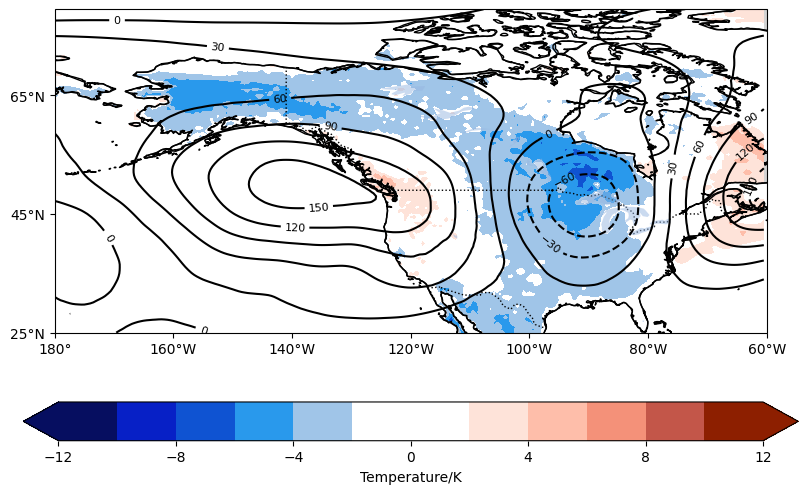

In [153]:
plot_t2m_z500_good_bad(ds_ano_ec_0618_ens_t2m_2701_weighted_range_na_good_interpolated,ds_ano_ec_0618_ens_z500_2701_weighted_range_na_good_interpolated, '0618_good_ec')

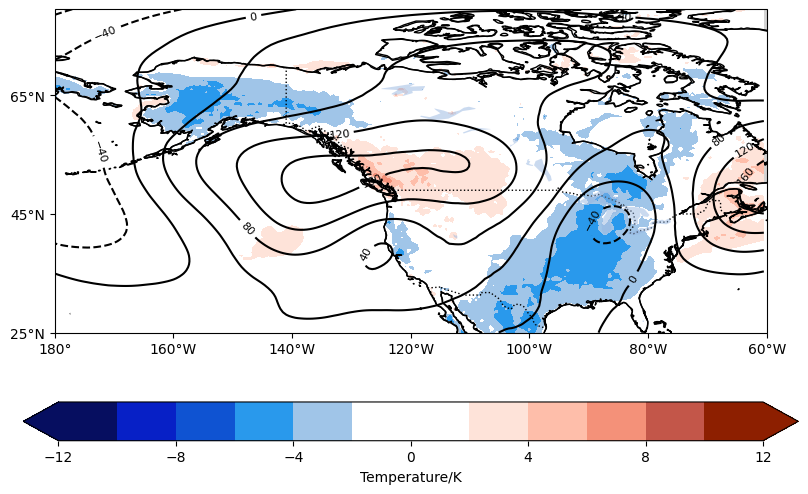

In [154]:
plot_t2m_z500_good_bad(ds_ano_ec_0620_ens_t2m_2701_weighted_range_na_good_interpolated,ds_ano_ec_0620_ens_z500_2701_weighted_range_na_good_interpolated, '0620_good_ec')

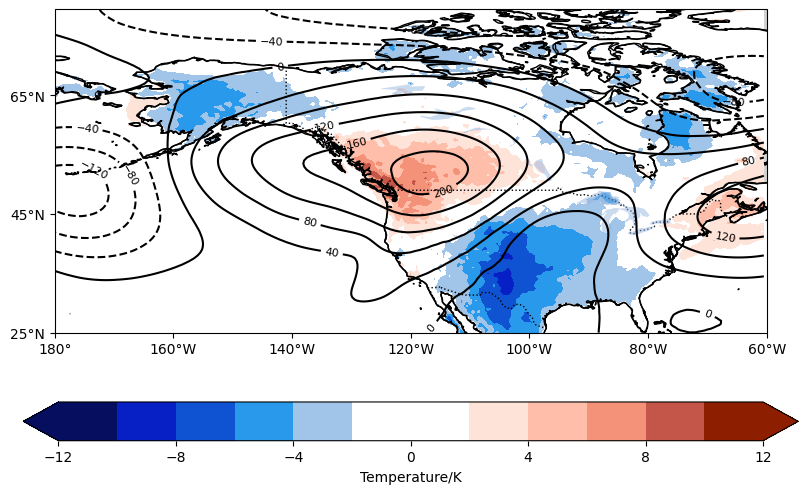

In [155]:
plot_t2m_z500_good_bad(ds_ano_ec_0622_ens_t2m_2701_weighted_range_na_good_interpolated,ds_ano_ec_0622_ens_z500_2701_weighted_range_na_good_interpolated, '0622_good_ec')

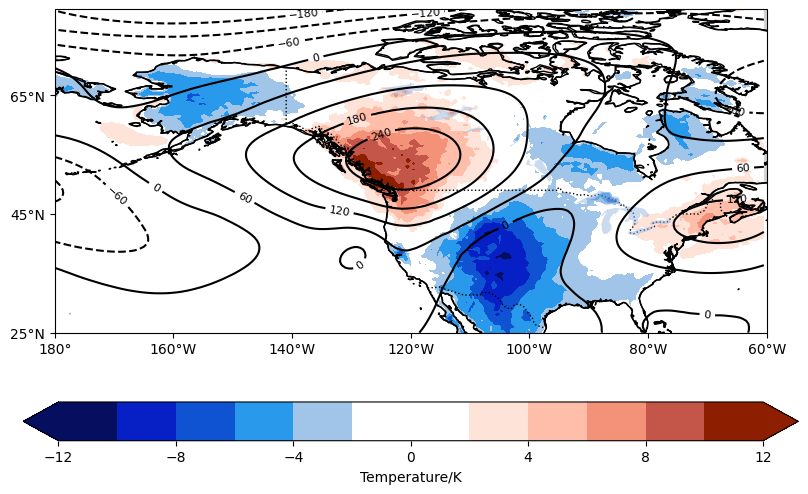

In [156]:
plot_t2m_z500_good_bad(ds_ano_ec_0624_ens_t2m_2701_weighted_range_na_good_interpolated,ds_ano_ec_0624_ens_z500_2701_weighted_range_na_good_interpolated, '0624_good_ec')

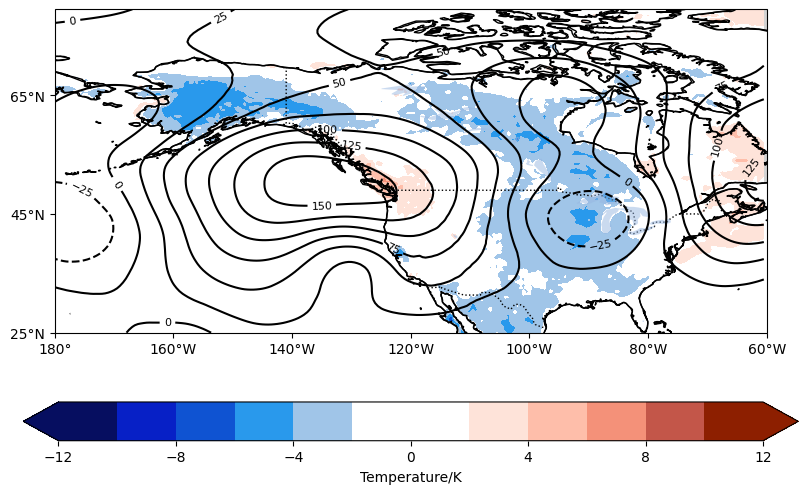

In [157]:
plot_t2m_z500_good_bad(ds_ano_ec_0618_ens_t2m_2701_weighted_range_na_bad_interpolated,ds_ano_ec_0618_ens_z500_2701_weighted_range_na_bad_interpolated, '0618_bad_ec')

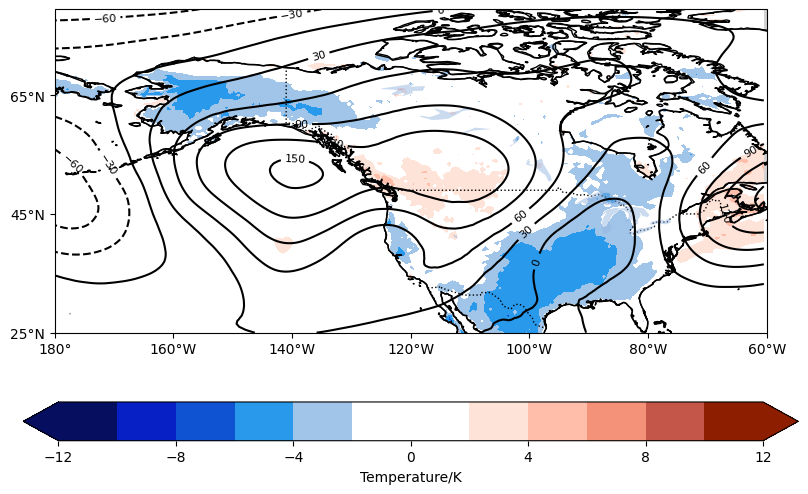

In [158]:
plot_t2m_z500_good_bad(ds_ano_ec_0620_ens_t2m_2701_weighted_range_na_bad_interpolated,ds_ano_ec_0620_ens_z500_2701_weighted_range_na_bad_interpolated, '0620_bad_ec')

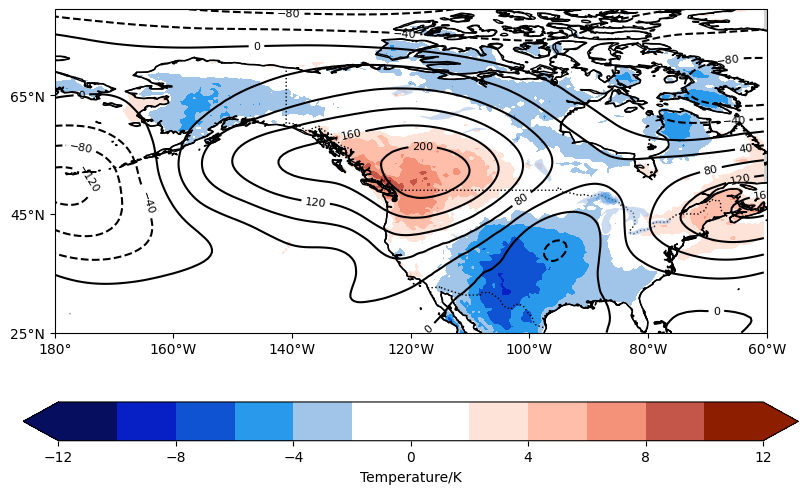

In [159]:
plot_t2m_z500_good_bad(ds_ano_ec_0622_ens_t2m_2701_weighted_range_na_bad_interpolated,ds_ano_ec_0622_ens_z500_2701_weighted_range_na_bad_interpolated, '0622_bad_ec')

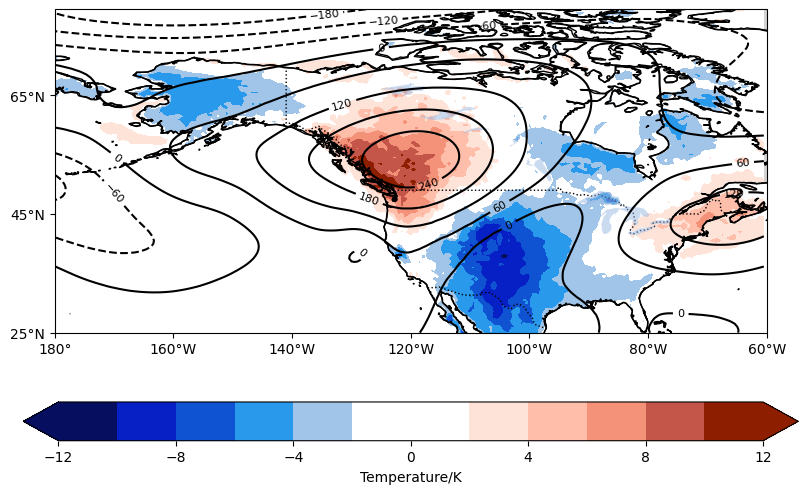

In [160]:
plot_t2m_z500_good_bad(ds_ano_ec_0624_ens_t2m_2701_weighted_range_na_bad_interpolated,ds_ano_ec_0624_ens_z500_2701_weighted_range_na_bad_interpolated, '0624_bad_ec')

In [ ]:
####################   plot session ######################################################################################################

In [ ]:
plot_t2m_z500_good_bad(ds_ano_ec_0616_ens_t2m_0629_na_good_interpolated,ds_ano_ec_0616_ens_z500_0629_na_good_interpolated)

In [ ]:
#weights
plot_t2m_z500_good_bad(ds_ano_ec_0616_ens_t2m_0629_na_good_interpolated,ds_ano_ec_0616_ens_z500_0629_na_good_interpolated)

In [ ]:
plot_t2m_z500_good_bad(ds_ano_ec_0618_ens_t2m_0629_na_good_interpolated,ds_ano_ec_0618_ens_z500_0629_na_good_interpolated)

In [ ]:
#weight
plot_t2m_z500_good_bad(ds_ano_ec_0618_ens_t2m_0629_na_good_interpolated,ds_ano_ec_0618_ens_z500_0629_na_good_interpolated)

In [ ]:
plot_t2m_z500_good_bad(ds_ano_ec_0620_ens_t2m_0629_na_good_interpolated,ds_ano_ec_0620_ens_z500_0629_na_good_interpolated)

In [ ]:
#weight
plot_t2m_z500_good_bad(ds_ano_ec_0620_ens_t2m_0629_na_good_interpolated,ds_ano_ec_0620_ens_z500_0629_na_good_interpolated)

In [ ]:
plot_t2m_z500_good_bad(ds_ano_ec_0622_ens_t2m_0629_na_good_interpolated,ds_ano_ec_0622_ens_z500_0629_na_good_interpolated)

In [ ]:
#weight
plot_t2m_z500_good_bad(ds_ano_ec_0626_ens_t2m_0629_na_good_interpolated,ds_ano_ec_0626_ens_z500_0629_na_good_interpolated)

In [ ]:
plot_t2m_z500_good_bad(ds_ano_ec_0626_ens_t2m_0629_na_good_interpolated,ds_ano_ec_0626_ens_z500_0629_na_good_interpolated)

In [ ]:
plot_t2m_z500_good_bad(ds_ano_ec_0626_ens_t2m_0629_na_bad_interpolated,ds_ano_ec_0626_ens_z500_0629_na_bad_interpolated)

In [ ]:
#weight
plot_t2m_z500_good_bad(ds_ano_ec_0626_ens_t2m_0629_na_bad_interpolated,ds_ano_ec_0626_ens_z500_0629_na_bad_interpolated)

In [ ]:
plot_t2m_z500_good_bad(ds_ano_ec_0622_ens_t2m_0629_na_bad_interpolated,ds_ano_ec_0622_ens_z500_0629_na_bad_interpolated)

In [ ]:
#weight
plot_t2m_z500_good_bad(ds_ano_ec_0622_ens_t2m_0629_na_bad_interpolated,ds_ano_ec_0622_ens_z500_0629_na_bad_interpolated)

In [ ]:
plot_t2m_z500_good_bad(ds_ano_ec_0620_ens_t2m_0629_na_bad_interpolated,ds_ano_ec_0620_ens_z500_0629_na_bad_interpolated)

In [ ]:
plot_t2m_z500_good_bad(ds_ano_ec_0618_ens_t2m_0629_na_bad_interpolated,ds_ano_ec_0618_ens_z500_0629_na_bad_interpolated)

In [ ]:
plot_t2m_z500_good_bad(ds_ano_ec_0616_ens_t2m_0629_na_bad_interpolated,ds_ano_ec_0616_ens_z500_0629_na_bad_interpolated)

In [ ]:
plot_t2m_good_bad(ds_ec_0616_ens_t2m_0629_na_good_mean[::-1,:])

In [ ]:
plot_t2m_good_bad(ds_ec_0616_ens_t2m_0629_na_bad_mean[::-1,:])

In [ ]:
plot_t2m_good_bad(ds_ec_0618_ens_t2m_0629_na_good_mean[::-1,:])

In [ ]:
plot_t2m_good_bad(ds_ec_0618_ens_t2m_0629_na_bad_mean[::-1,:])

In [ ]:
plot_t2m_good_bad(ds_ec_0620_ens_t2m_0629_na_good_mean[::-1,:])

In [ ]:
plot_t2m_good_bad(ds_ec_0620_ens_t2m_0629_na_bad_mean[::-1,:])

In [ ]:
plot_t2m_good_bad(ds_ec_0622_ens_t2m_0629_na_good_mean[::-1,:])

In [ ]:
plot_t2m_good_bad(ds_ec_0622_ens_t2m_0629_na_bad_mean[::-1,:])

In [ ]:
plot_t2m_good_bad(ds_ec_0626_ens_t2m_0629_na_bad_mean[::-1,:])

In [ ]:
plot_t2m_good_bad(ds_ec_0626_ens_t2m_0629_na_bad_mean[::-1,:])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_t2m_good_bad_6p(dataset1, dataset2, dataset3, dataset4, dataset5, dataset6):
    lat = np.linspace(25, 80, 221)
    lon = np.linspace(-180, -60, 481)
    lon_grid, lat_grid = np.meshgrid(lon, lat)

    fig, axs = plt.subplots(2, 3, figsize=(16, 7),subplot_kw={'projection': ccrs.PlateCarree()})

    datasets = [dataset1, dataset2, dataset3, dataset4, dataset5, dataset6]

    for i in range(2):
        for j in range(3):
            ax = axs[i, j]
            #ax.set_title(f'Subplot {i*2 + j + 1}')  # Set subplot title

            # Plot data on each subplot
            dataset = datasets[i*3 + j]  # Get dataset for current subplot
            contour1 = ax.contourf(lon_grid, lat_grid, dataset, cmap='coolwarm', levels=np.linspace(265, 315, 21), extend='both')
        
            if i == 0 and j==0:
                ax.set_title('IFS Initialized on June 16')
                ax.set_ylabel('Good members')
            if i == 0 and j==1:
                ax.set_title('IFS Initialized on June 22')
            if i == 0 and j==2:
                ax.set_title('IFS Initialized on June 26')
            if i == 1 and j==0:
                ax.set_ylabel('Bad members')
            
            
            # Set map extent and features
            ax.set_extent([-180, -60, 25, 80], crs=ccrs.PlateCarree())
            ax.add_feature(cfeature.COASTLINE)
            ax.add_feature(cfeature.BORDERS, linestyle=':')
            ax.add_feature(cfeature.LAND, facecolor='lightgray')
            ax.add_feature(cfeature.OCEAN, facecolor='w')
            ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
            ax.add_feature(cfeature.LAKES, alpha=0.5)
            ax.set_xticks(np.arange(-180, -60+10, 20), crs=ccrs.PlateCarree())
            ax.set_yticks(np.arange(25, 80, 20), crs=ccrs.PlateCarree())

            lat_formatter = cticker.LatitudeFormatter()
            lon_formatter = cticker.LongitudeFormatter()

            ax.xaxis.set_major_formatter(lon_formatter)
            ax.yaxis.set_major_formatter(lat_formatter)
    plt.tight_layout()       
    cbar = plt.colorbar(contour1, ax=axs, orientation='horizontal', shrink=0.4,label='2-m Temperature(K)',pad =0.06,extend = 'both') 
    plt.savefig('/home/kit/imk-tro/gj5173/result_0415/gm_ifs_0629.png', bbox_inches='tight',dpi=100)
   # plt.colorbar(contour1, ax=ax, label='Temperature/K', orientation='horizontal')
   
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_t2m_good_bad_6p_fcnv2_ec(dataset1, dataset2, dataset3, dataset4, dataset5, dataset6):
    lat = np.linspace(25, 80, 221)
    lon = np.linspace(-180, -60, 481)
    lon_grid, lat_grid = np.meshgrid(lon, lat)

    fig, axs = plt.subplots(2, 3, figsize=(16, 7),subplot_kw={'projection': ccrs.PlateCarree()})

    datasets = [dataset1, dataset2, dataset3, dataset4, dataset5, dataset6]

    for i in range(2):
        for j in range(3):
            ax = axs[i, j]
            #ax.set_title(f'Subplot {i*2 + j + 1}')  # Set subplot title

            # Plot data on each subplot
            dataset = datasets[i*3 + j]  # Get dataset for current subplot
            contour1 = ax.contourf(lon_grid, lat_grid, dataset, cmap='coolwarm', levels=np.linspace(265, 315, 21), extend='both')
        
            if i == 0 and j==0:
                ax.set_title('FCNV2_IFS Initialized on June 16')
                ax.set_ylabel('Good members')
            if i == 0 and j==1:
                ax.set_title('FCNV2_IFS Initialized on June 22')
            if i == 0 and j==2:
                ax.set_title('FCNV2_IFS Initialized on June 26')
            if i == 1 and j==0:
                ax.set_ylabel('Bad members')
            
            
            # Set map extent and features
            ax.set_extent([-180, -60, 25, 80], crs=ccrs.PlateCarree())
            ax.add_feature(cfeature.COASTLINE)
            ax.add_feature(cfeature.BORDERS, linestyle=':')
            ax.add_feature(cfeature.LAND, facecolor='lightgray')
            ax.add_feature(cfeature.OCEAN, facecolor='w')
            ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
            ax.add_feature(cfeature.LAKES, alpha=0.5)
            ax.set_xticks(np.arange(-180, -60+10, 20), crs=ccrs.PlateCarree())
            ax.set_yticks(np.arange(25, 80, 20), crs=ccrs.PlateCarree())

            lat_formatter = cticker.LatitudeFormatter()
            lon_formatter = cticker.LongitudeFormatter()

            ax.xaxis.set_major_formatter(lon_formatter)
            ax.yaxis.set_major_formatter(lat_formatter)
    plt.tight_layout()       
    cbar = plt.colorbar(contour1, ax=axs, orientation='horizontal', shrink=0.4,label='2-m Temperature(K)',pad =0.06,extend = 'both') 
    plt.savefig('/home/kit/imk-tro/gj5173/result_0415/gm_fcn_ifs_0629.png', bbox_inches='tight',dpi=100)
   # plt.colorbar(contour1, ax=ax, label='Temperature/K', orientation='horizontal')
   
    plt.show()

In [ ]:
plot_t2m_good_bad_6p_fcnv2_ec(ds_fcnv2_ec_0616_ens_t2m_0629_na_good_mean[:,:],ds_fcnv2_ec_0622_ens_t2m_0629_na_good_mean[:,:],ds_fcnv2_ec_0626_ens_t2m_0629_na_good_mean[:,:],ds_fcnv2_ec_0616_ens_t2m_0629_na_bad_mean[:,:],ds_fcnv2_ec_0622_ens_t2m_0629_na_bad_mean[:,:],ds_fcnv2_ec_0626_ens_t2m_0629_na_bad_mean[:,:])

In [ ]:
plot_t2m_good_bad_6p(ds_ec_0616_ens_t2m_0629_na_good_mean[::-1,:],ds_ec_0622_ens_t2m_0629_na_good_mean[::-1,:],ds_ec_0626_ens_t2m_0629_na_good_mean[::-1,:],ds_ec_0616_ens_t2m_0629_na_bad_mean[::-1,:],ds_ec_0622_ens_t2m_0629_na_bad_mean[::-1,:],ds_ec_0626_ens_t2m_0629_na_bad_mean[::-1,:])

In [ ]:

ds_era5_0629_t2m

In [ ]:
plot_t2m_good_bad_6p(ds_ec_0616_ens_t2m_0629_na_good_mean[::-1,:],ds_ec_0622_ens_t2m_0629_na_good_mean[::-1,:],ds_ec_0626_ens_t2m_0629_na_good_mean[::-1,:],ds_ec_0616_ens_t2m_0629_na_bad_mean[::-1,:],ds_ec_0622_ens_t2m_0629_na_bad_mean[::-1,:],ds_ec_0626_ens_t2m_0629_na_bad_mean[::-1,:])

In [ ]:
######################################################### 2*2 0616;0620;0622;0626 good memebr anomaly ####################################################################################################

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_t2m_good_bad_6p_fcnv2_ec(dataset1, dataset2, dataset3, dataset4, dataset5, dataset6):
    lat = np.linspace(25, 80, 221)
    lon = np.linspace(-180, -60, 481)
    lon_grid, lat_grid = np.meshgrid(lon, lat)

    fig, axs = plt.subplots(2, 3, figsize=(16, 7),subplot_kw={'projection': ccrs.PlateCarree()})

    datasets = [dataset1, dataset2, dataset3, dataset4, dataset5, dataset6]

    for i in range(2):
        for j in range(3):
            ax = axs[i, j]
            #ax.set_title(f'Subplot {i*2 + j + 1}')  # Set subplot title

            # Plot data on each subplot
            dataset = datasets[i*3 + j]  # Get dataset for current subplot
            contour1 = ax.contourf(lon_grid, lat_grid, dataset, cmap='coolwarm', levels=np.linspace(265, 315, 21), extend='both')
        
            if i == 0 and j==0:
                ax.set_title('FCNV2_IFS Initialized on June 16')
                ax.set_ylabel('Good members')
            if i == 0 and j==1:
                ax.set_title('FCNV2_IFS Initialized on June 22')
            if i == 0 and j==2:
                ax.set_title('FCNV2_IFS Initialized on June 26')
            if i == 1 and j==0:
                ax.set_ylabel('Bad members')
            
            
            # Set map extent and features
            ax.set_extent([-180, -60, 25, 80], crs=ccrs.PlateCarree())
            ax.add_feature(cfeature.COASTLINE)
            ax.add_feature(cfeature.BORDERS, linestyle=':')
            ax.add_feature(cfeature.LAND, facecolor='lightgray')
            ax.add_feature(cfeature.OCEAN, facecolor='w')
            ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
            ax.add_feature(cfeature.LAKES, alpha=0.5)
            ax.set_xticks(np.arange(-180, -60+10, 20), crs=ccrs.PlateCarree())
            ax.set_yticks(np.arange(25, 80, 20), crs=ccrs.PlateCarree())

            lat_formatter = cticker.LatitudeFormatter()
            lon_formatter = cticker.LongitudeFormatter()

            ax.xaxis.set_major_formatter(lon_formatter)
            ax.yaxis.set_major_formatter(lat_formatter)
    plt.tight_layout()       
    cbar = plt.colorbar(contour1, ax=axs, orientation='horizontal', shrink=0.4,label='2-m Temperature(K)',pad =0.06,extend = 'both') 
    plt.savefig('/home/kit/imk-tro/gj5173/result_0415/gm_fcn_ifs_0629.png', bbox_inches='tight',dpi=100)
   # plt.colorbar(contour1, ax=ax, label='Temperature/K', orientation='horizontal')
   
    plt.show()

In [ ]:
def plot_t2m_z500_good_bad(dataset_t2m,dataset_z500):

    lat = np.linspace(25, 79.5, 110)
    lon = np.linspace(-180, -60.5, 240)
    lon_grid, lat_grid = np.meshgrid(lon, lat)
    fig = plt.figure(figsize=(10,6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    x, y = lon_grid, lat_grid  # Replace with the appropriate transformation method
    leftlon, rightlon, lowerlat, upperlat = (-180,-60.5,25,79.5)#define map extent
    ax.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    ax.add_feature(cfeature.OCEAN, facecolor='w')
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.set_xticks(np.arange(leftlon,rightlon+10,20), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    lon_formatter = cticker.LongitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)

    # Plot the contour map
    
    contour1 = ax.contourf(x,y,dataset_t2m,cmap=shifted_cmap, levels=np.linspace(-20, 20, 21), extend='both')
    #contour1 = ax.contourf(x,y,dataset_t2m,cmap=cm.vik, levels=np.linspace(-18, 18, 19), extend='both')
    contour2 = ax.contour(x,y,dataset_z500/9.80665,levels=8,linewidths=1.5,colors = 'black')
    #mark the location of lytton
    #red_point_lon = -121.50
    #red_point_lat = 50.25
    #ax.plot(red_point_lon, red_point_lat, 'r*', markersize=10)
    # Add colorbar
    #plt.colorbar()
    cbar = plt.colorbar(contour1, ax=ax, label='Temperature/K',orientation='horizontal')
    ax.clabel(contour2, inline=True, fontsize=8)
    # Set plot title and labels
    #plt.title('T2m_2021-06-29-00:00UTC_ERA5')
    #plt.xlabel('Longitude')
    #plt.ylabel('Latitude')
    
    #plt.savefig('T2m_2021-06-15_ERA5.png', bbox_inches='tight',dpi=100)
    
    #656:2021.06.14 00UTC -06.29 00UTC
    
    # Show the plot
    #plt.show()

In [ ]:
def plot_t2m_z500_good_4p(dataset0_t2m, dataset0_z500,dataset1_t2m, dataset1_z500,dataset2_t2m, dataset2_z500,dataset3_t2m, dataset3_z500):
    lat = np.linspace(25, 79.5, 110)
    lon = np.linspace(-180, -60.5, 240)
    lon_grid, lat_grid = np.meshgrid(lon, lat)

    fig, axs = plt.subplots(2, 2, figsize=(14, 10), subplot_kw={'projection': ccrs.PlateCarree()})

    for i, ax in enumerate(axs.flat):
        ax.set_extent([-180, -60.5, 25, 79.5], crs=ccrs.PlateCarree())
        ax.add_feature(cfeature.COASTLINE)
        ax.add_feature(cfeature.BORDERS, linestyle=':')
        ax.add_feature(cfeature.LAND, facecolor='lightgray')
        ax.add_feature(cfeature.OCEAN, facecolor='w')
        ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
        ax.add_feature(cfeature.LAKES, alpha=0.5)
        ax.set_xticks(np.arange(-180, -55, 20), crs=ccrs.PlateCarree())
        ax.set_yticks(np.arange(25, 85, 20), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        lon_formatter = cticker.LongitudeFormatter()
        ax.xaxis.set_major_formatter(lon_formatter)
        ax.yaxis.set_major_formatter(lat_formatter)

        if i == 0:
            contour01 = ax.contourf(lon_grid, lat_grid, dataset0_t2m, cmap=shifted_cmap, levels=np.linspace(-20, 20, 21), extend='both')
            #cbar = plt.colorbar(contour01, ax=ax, label='Temperature/K', orientation='horizontal')
            contour02 = ax.contour(lon_grid, lat_grid, dataset0_z500/9.80665, levels=8, linewidths=1.5, colors='black')
            ax.clabel(contour02, inline=True, fontsize=8)
            ax.set_title(''r'$\mathrm{(a)IFS_{Good}}$ initialized on June 18',loc='left')
        elif i == 1:
            contour11 = ax.contourf(lon_grid, lat_grid, dataset1_t2m, cmap=shifted_cmap, levels=np.linspace(-20, 20, 21), extend='both')
            #cbar = plt.colorbar(contour11, ax=ax, label='Temperature/K', orientation='horizontal')
            contour12 = ax.contour(lon_grid, lat_grid, dataset1_z500/9.80665, levels=8, linewidths=1.5, colors='black')
            ax.clabel(contour12, inline=True, fontsize=8)
            ax.set_title(''r'$\mathrm{(b)IFS_{Good}}$ initialized on June 20',loc='left')
        elif i == 2:
            contour21 = ax.contourf(lon_grid, lat_grid, dataset2_t2m, cmap=shifted_cmap, levels=np.linspace(-20, 20, 21), extend='both')
            #cbar = plt.colorbar(contour21, ax=ax, label='Temperature/K', orientation='horizontal')
            contour22 = ax.contour(lon_grid, lat_grid, dataset2_z500/9.80665, levels=8, linewidths=1.5, colors='black')
            ax.clabel(contour22, inline=True, fontsize=8)   
            ax.set_title(''r'$\mathrm{(c)IFS_{Good}}$ initialized on June 22',loc='left')
        elif i == 3:
            contour31 = ax.contourf(lon_grid, lat_grid, dataset3_t2m, cmap=shifted_cmap, levels=np.linspace(-20, 20, 21), extend='both')
            #cbar = plt.colorbar(contour31, ax=ax, label='Temperature/K', orientation='horizontal')
            contour32 = ax.contour(lon_grid, lat_grid, dataset3_z500/9.80665, levels=8, linewidths=1.5, colors='black')
            ax.clabel(contour32, inline=True, fontsize=8)
            ax.set_title(''r'$\mathrm{(d)IFS_{Good}}$ initialized on June 26',loc='left')
    plt.tight_layout()        
    cbar = plt.colorbar(contour31, ax=axs, orientation='horizontal', shrink=0.4,label='2-m Temperature Anomaly (K)',pad =0.06,extend = 'both') 
    plt.savefig('/home/kit/imk-tro/gj5173/result1/ifs_good2*2.png', bbox_inches='tight',dpi=100)

In [ ]:
def plot_t2m_z500_bad_4p(dataset0_t2m, dataset0_z500,dataset1_t2m, dataset1_z500,dataset2_t2m, dataset2_z500,dataset3_t2m, dataset3_z500):
    lat = np.linspace(25, 79.5, 110)
    lon = np.linspace(-180, -60.5, 240)
    lon_grid, lat_grid = np.meshgrid(lon, lat)

    fig, axs = plt.subplots(2, 2, figsize=(14, 10), subplot_kw={'projection': ccrs.PlateCarree()})

    for i, ax in enumerate(axs.flat):
        ax.set_extent([-180, -60.5, 25, 79.5], crs=ccrs.PlateCarree())
        ax.add_feature(cfeature.COASTLINE)
        ax.add_feature(cfeature.BORDERS, linestyle=':')
        ax.add_feature(cfeature.LAND, facecolor='lightgray')
        ax.add_feature(cfeature.OCEAN, facecolor='w')
        ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
        ax.add_feature(cfeature.LAKES, alpha=0.5)
        ax.set_xticks(np.arange(-180, -55, 20), crs=ccrs.PlateCarree())
        ax.set_yticks(np.arange(25, 85, 20), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        lon_formatter = cticker.LongitudeFormatter()
        ax.xaxis.set_major_formatter(lon_formatter)
        ax.yaxis.set_major_formatter(lat_formatter)

        if i == 0:
            contour01 = ax.contourf(lon_grid, lat_grid, dataset0_t2m, cmap=shifted_cmap, levels=np.linspace(-20, 20, 21), extend='both')
            #cbar = plt.colorbar(contour01, ax=ax, label='Temperature/K', orientation='horizontal')
            contour02 = ax.contour(lon_grid, lat_grid, dataset0_z500/9.80665, levels=8, linewidths=1.5, colors='black')
            ax.clabel(contour02, inline=True, fontsize=8)
            ax.set_title(''r'$\mathrm{(a)IFS_{Bad}}$ initialized on June 18',loc='left')
        elif i == 1:
            contour11 = ax.contourf(lon_grid, lat_grid, dataset1_t2m, cmap=shifted_cmap, levels=np.linspace(-20, 20, 21), extend='both')
            #cbar = plt.colorbar(contour11, ax=ax, label='Temperature/K', orientation='horizontal')
            contour12 = ax.contour(lon_grid, lat_grid, dataset1_z500/9.80665, levels=8, linewidths=1.5, colors='black')
            ax.clabel(contour12, inline=True, fontsize=8)
            ax.set_title(''r'$\mathrm{(b)IFS_{Bad}}$ initialized on June 20',loc='left')
        elif i == 2:
            contour21 = ax.contourf(lon_grid, lat_grid, dataset2_t2m, cmap=shifted_cmap, levels=np.linspace(-20, 20, 21), extend='both')
            #cbar = plt.colorbar(contour21, ax=ax, label='Temperature/K', orientation='horizontal')
            contour22 = ax.contour(lon_grid, lat_grid, dataset2_z500/9.80665, levels=8, linewidths=1.5, colors='black')
            ax.clabel(contour22, inline=True, fontsize=8)   
            ax.set_title(''r'$\mathrm{(c)IFS_{Bad}}$ initialized on June 22',loc='left')
        elif i == 3:
            contour31 = ax.contourf(lon_grid, lat_grid, dataset3_t2m, cmap=shifted_cmap, levels=np.linspace(-20, 20, 21), extend='both')
            #cbar = plt.colorbar(contour31, ax=ax, label='Temperature/K', orientation='horizontal')
            contour32 = ax.contour(lon_grid, lat_grid, dataset3_z500/9.80665, levels=8, linewidths=1.5, colors='black')
            ax.clabel(contour32, inline=True, fontsize=8)
            ax.set_title(''r'$\mathrm{(d)IFS_{Bad}}$ initialized on June 26',loc='left')
    plt.tight_layout()        
    cbar = plt.colorbar(contour31, ax=axs, orientation='horizontal', shrink=0.4,label='2-m Temperature Anomaly (K)',pad =0.06,extend = 'both') 
    plt.savefig('/home/kit/imk-tro/gj5173/result1/ifs_bad2*2.png', bbox_inches='tight',dpi=100)

In [ ]:
plot_t2m_z500_good_4p(ds_ano_ec_0618_ens_t2m_0629_na_good_interpolated,ds_ano_ec_0618_ens_z500_0629_na_good_interpolated,ds_ano_ec_0620_ens_t2m_0629_na_good_interpolated,ds_ano_ec_0620_ens_z500_0629_na_good_interpolated,ds_ano_ec_0622_ens_t2m_0629_na_good_interpolated,ds_ano_ec_0622_ens_z500_0629_na_good_interpolated,ds_ano_ec_0626_ens_t2m_0629_na_good_interpolated,ds_ano_ec_0626_ens_z500_0629_na_good_interpolated)

In [ ]:
plot_t2m_z500_bad_4p(ds_ano_ec_0618_ens_t2m_0629_na_bad_interpolated,ds_ano_ec_0618_ens_z500_0629_na_bad_interpolated,ds_ano_ec_0620_ens_t2m_0629_na_bad_interpolated,ds_ano_ec_0620_ens_z500_0629_na_bad_interpolated,ds_ano_ec_0622_ens_t2m_0629_na_bad_interpolated,ds_ano_ec_0622_ens_z500_0629_na_bad_interpolated,ds_ano_ec_0626_ens_t2m_0629_na_bad_interpolated,ds_ano_ec_0626_ens_z500_0629_na_bad_interpolated)

In [ ]:
def plot_t2m_z500_good_bad_8p(dataset0_t2m_good, dataset0_z500_good,dataset0_t2m_bad, dataset0_z500_bad,dataset1_t2m_good, dataset1_z500_good,dataset1_t2m_bad, dataset1_z500_bad,dataset2_t2m_good, dataset2_z500_good,dataset2_t2m_bad, dataset2_z500_bad,dataset3_t2m_good, dataset3_z500_good,dataset3_t2m_bad, dataset3_z500_bad):
    lat = np.linspace(25, 79.5, 110)
    lon = np.linspace(-180, -60.5, 240)
    lon_grid, lat_grid = np.meshgrid(lon, lat)

    fig, axs = plt.subplots(4, 2, figsize=(14, 20), subplot_kw={'projection': ccrs.PlateCarree()})

    for i, ax in enumerate(axs.flat):
        ax.set_extent([-180, -60.5, 25, 79.5], crs=ccrs.PlateCarree())
        ax.add_feature(cfeature.COASTLINE)
        ax.add_feature(cfeature.BORDERS, linestyle=':')
        ax.add_feature(cfeature.LAND, facecolor='lightgray')
        ax.add_feature(cfeature.OCEAN, facecolor='w')
        ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
        ax.add_feature(cfeature.LAKES, alpha=0.5)
        ax.set_xticks(np.arange(-180, -55, 20), crs=ccrs.PlateCarree())
        ax.set_yticks(np.arange(25, 85, 20), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        lon_formatter = cticker.LongitudeFormatter()
        ax.xaxis.set_major_formatter(lon_formatter)
        ax.yaxis.set_major_formatter(lat_formatter)

        if i == 0:
            contour01_good = ax.contourf(lon_grid, lat_grid, dataset0_t2m_good, cmap=shifted_cmap, levels=np.linspace(-20, 20, 21), extend='both')
            #cbar = plt.colorbar(contour01, ax=ax, label='Temperature/K', orientation='horizontal')
            contour02_good = ax.contour(lon_grid, lat_grid, dataset0_z500_good/9.80665, levels=8, linewidths=1.5, colors='black')
            ax.clabel(contour02_good, inline=True, fontsize=8)
            ax.set_title(''r'$\mathrm{(a)IFS_{Good}}$ initialized on June 18',loc='left')
            
        elif i == 1:
            contour01_bad = ax.contourf(lon_grid, lat_grid, dataset0_t2m_bad, cmap=shifted_cmap, levels=np.linspace(-20, 20, 21), extend='both')
            #cbar = plt.olorbar(contour01, ax=ax, label='Temperature/K', orientation='horizontal')
            contour02_bad = ax.contour(lon_grid, lat_grid, dataset0_z500_bad/9.80665, levels=8, linewidths=1.5, colors='black')
            ax.clabel(contour02_bad, inline=True, fontsize=8)
            ax.set_title(''r'$\mathrm{(b)IFS_{Bad}}$ initialized on June 18',loc='left')
             
        elif i == 2:
            contour11_good = ax.contourf(lon_grid, lat_grid, dataset1_t2m_good, cmap=shifted_cmap, levels=np.linspace(-20, 20, 21), extend='both')
            #cbar = plt.colorbar(contour11, ax=ax, label='Temperature/K', orientation='horizontal')
            contour12_good = ax.contour(lon_grid, lat_grid, dataset1_z500_good/9.80665, levels=8, linewidths=1.5, colors='black')
            ax.clabel(contour12_good, inline=True, fontsize=8)
            ax.set_title(''r'$\mathrm{(b)IFS_{Good}}$ initialized on June 20',loc='left')
            
        elif i == 3:
            contour11_bad = ax.contourf(lon_grid, lat_grid, dataset1_t2m_bad, cmap=shifted_cmap, levels=np.linspace(-20, 20, 21), extend='both')
            #cbar = plt.colorbar(contour11, ax=ax, label='Temperature/K', orientation='horizontal')
            contour12_bad = ax.contour(lon_grid, lat_grid, dataset1_z500_bad/9.80665, levels=8, linewidths=1.5, colors='black')
            ax.clabel(contour12_bad, inline=True, fontsize=8)
            ax.set_title(''r'$\mathrm{(b)IFS_{Bad}}$ initialized on June 20',loc='left')
        
        elif i == 4:
            contour21_good = ax.contourf(lon_grid, lat_grid, dataset2_t2m_good, cmap=shifted_cmap, levels=np.linspace(-20, 20, 21), extend='both')
            #cbar = plt.colorbar(contour21, ax=ax, label='Temperature/K', orientation='horizontal')
            contour22_good = ax.contour(lon_grid, lat_grid, dataset2_z500_good/9.80665, levels=8, linewidths=1.5, colors='black')
            ax.clabel(contour22_good, inline=True, fontsize=8)   
            ax.set_title(''r'$\mathrm{(c)IFS_{Good}}$ initialized on June 22',loc='left')
        elif i == 5:
            contour21_bad = ax.contourf(lon_grid, lat_grid, dataset2_t2m_bad, cmap=shifted_cmap, levels=np.linspace(-20, 20, 21), extend='both')
            #cbar = plt.colorbar(contour21, ax=ax, label='Temperature/K', orientation='horizontal')
            contour22_bad = ax.contour(lon_grid, lat_grid, dataset2_z500_bad/9.80665, levels=8, linewidths=1.5, colors='black')
            ax.clabel(contour22_bad, inline=True, fontsize=8)   
            ax.set_title(''r'$\mathrm{(c)IFS_{Bad}}$ initialized on June 22',loc='left')
        elif i == 6:
            contour31_good = ax.contourf(lon_grid, lat_grid, dataset3_t2m_good, cmap=shifted_cmap, levels=np.linspace(-20, 20, 21), extend='both')
            #cbar = plt.colorbar(contour31, ax=ax, label='Temperature/K', orientation='horizontal')
            contour32_good = ax.contour(lon_grid, lat_grid, dataset3_z500_good/9.80665, levels=8, linewidths=1.5, colors='black')
            ax.clabel(contour32_good, inline=True, fontsize=8)
            ax.set_title(''r'$\mathrm{(d)IFS_{Good}}$ initialized on June 26',loc='left')
        elif i == 7:
            contour31_bad = ax.contourf(lon_grid, lat_grid, dataset3_t2m_bad, cmap=shifted_cmap, levels=np.linspace(-20, 20, 21), extend='both')
            #cbar = plt.colorbar(contour31, ax=ax, label='Temperature/K', orientation='horizontal')
            contour32_bad = ax.contour(lon_grid, lat_grid, dataset3_z500_bad/9.80665, levels=8, linewidths=1.5, colors='black')
            ax.clabel(contour32_bad, inline=True, fontsize=8)
            ax.set_title(''r'$\mathrm{(d)IFS_{Bad}}$ initialized on June 26',loc='left')
    plt.tight_layout()        
    cbar = plt.colorbar(contour31_good, ax=axs, orientation='horizontal', shrink=0.4,label='2-m Temperature Anomaly (K)',pad =0.06,extend = 'both') 
    plt.savefig('/home/kit/imk-tro/gj5173/result1/ifs_good4*2.png', bbox_inches='tight',dpi=100)

In [ ]:
plot_t2m_z500_good_bad_8p(ds_ano_ec_0618_ens_t2m_0629_na_good_interpolated,ds_ano_ec_0618_ens_z500_0629_na_good_interpolated,ds_ano_ec_0618_ens_t2m_0629_na_bad_interpolated,ds_ano_ec_0618_ens_z500_0629_na_bad_interpolated,ds_ano_ec_0620_ens_t2m_0629_na_good_interpolated,ds_ano_ec_0620_ens_z500_0629_na_good_interpolated,ds_ano_ec_0620_ens_t2m_0629_na_bad_interpolated,ds_ano_ec_0620_ens_z500_0629_na_bad_interpolated,ds_ano_ec_0622_ens_t2m_0629_na_good_interpolated,ds_ano_ec_0622_ens_z500_0629_na_good_interpolated,ds_ano_ec_0622_ens_t2m_0629_na_bad_interpolated,ds_ano_ec_0622_ens_z500_0629_na_bad_interpolated,ds_ano_ec_0626_ens_t2m_0629_na_good_interpolated,ds_ano_ec_0626_ens_z500_0629_na_good_interpolated,ds_ano_ec_0626_ens_t2m_0629_na_bad_interpolated,ds_ano_ec_0626_ens_z500_0629_na_bad_interpolated)

In [ ]:
#####################create 4*2 for fcnv2_ifs_ens #################################################### 

In [ ]:
def plot_t2m_z500_good_bad_8p(dataset0_t2m_good, dataset0_z500_good,dataset0_t2m_bad, dataset0_z500_bad,dataset1_t2m_good, dataset1_z500_good,dataset1_t2m_bad, dataset1_z500_bad,dataset2_t2m_good, dataset2_z500_good,dataset2_t2m_bad, dataset2_z500_bad,dataset3_t2m_good, dataset3_z500_good,dataset3_t2m_bad, dataset3_z500_bad):
    lat = np.linspace(25, 79.5, 110)
    lon = np.linspace(-180, -60.5, 240)
    lon_grid, lat_grid = np.meshgrid(lon, lat)

    fig, axs = plt.subplots(4, 2, figsize=(14, 20), subplot_kw={'projection': ccrs.PlateCarree()})

    for i, ax in enumerate(axs.flat):
        ax.set_extent([-180, -60.5, 25, 79.5], crs=ccrs.PlateCarree())
        ax.add_feature(cfeature.COASTLINE)
        ax.add_feature(cfeature.BORDERS, linestyle=':')
        ax.add_feature(cfeature.LAND, facecolor='lightgray')
        ax.add_feature(cfeature.OCEAN, facecolor='w')
        ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
        ax.add_feature(cfeature.LAKES, alpha=0.5)
        ax.set_xticks(np.arange(-180, -55, 20), crs=ccrs.PlateCarree())
        ax.set_yticks(np.arange(25, 85, 20), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        lon_formatter = cticker.LongitudeFormatter()
        ax.xaxis.set_major_formatter(lon_formatter)
        ax.yaxis.set_major_formatter(lat_formatter)

        if i == 0:
            contour01_good = ax.contourf(lon_grid, lat_grid, dataset0_t2m_good, cmap=shifted_cmap, levels=np.linspace(-20, 20, 21), extend='both')
            #cbar = plt.colorbar(contour01, ax=ax, label='Temperature/K', orientation='horizontal')
            contour02_good = ax.contour(lon_grid, lat_grid, dataset0_z500_good/9.80665, levels=8, linewidths=1.5, colors='black')
            ax.clabel(contour02_good, inline=True, fontsize=8)
            ax.set_title(''r'$\mathrm{(a)FCNV2_EC_{Good}}$ initialized on June 18',loc='left')
            
        elif i == 1:
            contour01_bad = ax.contourf(lon_grid, lat_grid, dataset0_t2m_bad, cmap=shifted_cmap, levels=np.linspace(-20, 20, 21), extend='both')
            #cbar = plt.olorbar(contour01, ax=ax, label='Temperature/K', orientation='horizontal')
            contour02_bad = ax.contour(lon_grid, lat_grid, dataset0_z500_bad/9.80665, levels=8, linewidths=1.5, colors='black')
            ax.clabel(contour02_bad, inline=True, fontsize=8)
            ax.set_title(''r'$\mathrm{(b)FCNV2_EC_{Bad}}$ initialized on June 18',loc='left')
             
        elif i == 2:
            contour11_good = ax.contourf(lon_grid, lat_grid, dataset1_t2m_good, cmap=shifted_cmap, levels=np.linspace(-20, 20, 21), extend='both')
            #cbar = plt.colorbar(contour11, ax=ax, label='Temperature/K', orientation='horizontal')
            contour12_good = ax.contour(lon_grid, lat_grid, dataset1_z500_good/9.80665, levels=8, linewidths=1.5, colors='black')
            ax.clabel(contour12_good, inline=True, fontsize=8)
            ax.set_title(''r'$\mathrm{(b)FCNV2_EC_{Good}}$ initialized on June 20',loc='left')
            
        elif i == 3:
            contour11_bad = ax.contourf(lon_grid, lat_grid, dataset1_t2m_bad, cmap=shifted_cmap, levels=np.linspace(-20, 20, 21), extend='both')
            #cbar = plt.colorbar(contour11, ax=ax, label='Temperature/K', orientation='horizontal')
            contour12_bad = ax.contour(lon_grid, lat_grid, dataset1_z500_bad/9.80665, levels=8, linewidths=1.5, colors='black')
            ax.clabel(contour12_bad, inline=True, fontsize=8)
            ax.set_title(''r'$\mathrm{(b)FCNV2_EC_{Bad}}$ initialized on June 20',loc='left')
        
        elif i == 4:
            contour21_good = ax.contourf(lon_grid, lat_grid, dataset2_t2m_good, cmap=shifted_cmap, levels=np.linspace(-20, 20, 21), extend='both')
            #cbar = plt.colorbar(contour21, ax=ax, label='Temperature/K', orientation='horizontal')
            contour22_good = ax.contour(lon_grid, lat_grid, dataset2_z500_good/9.80665, levels=8, linewidths=1.5, colors='black')
            ax.clabel(contour22_good, inline=True, fontsize=8)   
            ax.set_title(''r'$\mathrm{(c)FCNV2_EC_{Good}}$ initialized on June 22',loc='left')
        elif i == 5:
            contour21_bad = ax.contourf(lon_grid, lat_grid, dataset2_t2m_bad, cmap=shifted_cmap, levels=np.linspace(-20, 20, 21), extend='both')
            #cbar = plt.colorbar(contour21, ax=ax, label='Temperature/K', orientation='horizontal')
            contour22_bad = ax.contour(lon_grid, lat_grid, dataset2_z500_bad/9.80665, levels=8, linewidths=1.5, colors='black')
            ax.clabel(contour22_bad, inline=True, fontsize=8)   
            ax.set_title(''r'$\mathrm{(c)FCNV2_EC_{Bad}}$ initialized on June 22',loc='left')
        elif i == 6:
            contour31_good = ax.contourf(lon_grid, lat_grid, dataset3_t2m_good, cmap=shifted_cmap, levels=np.linspace(-20, 20, 21), extend='both')
            #cbar = plt.colorbar(contour31, ax=ax, label='Temperature/K', orientation='horizontal')
            contour32_good = ax.contour(lon_grid, lat_grid, dataset3_z500_good/9.80665, levels=8, linewidths=1.5, colors='black')
            ax.clabel(contour32_good, inline=True, fontsize=8)
            ax.set_title(''r'$\mathrm{(d)FCNV2_EC_{Good}}$ initialized on June 26',loc='left')
        elif i == 7:
            contour31_bad = ax.contourf(lon_grid, lat_grid, dataset3_t2m_bad, cmap=shifted_cmap, levels=np.linspace(-20, 20, 21), extend='both')
            #cbar = plt.colorbar(contour31, ax=ax, label='Temperature/K', orientation='horizontal')
            contour32_bad = ax.contour(lon_grid, lat_grid, dataset3_z500_bad/9.80665, levels=8, linewidths=1.5, colors='black')
            ax.clabel(contour32_bad, inline=True, fontsize=8)
            ax.set_title(''r'$\mathrm{(d)FCNV2_EC_{Bad}}$ initialized on June 26',loc='left')
    plt.tight_layout()        
    cbar = plt.colorbar(contour31_good, ax=axs, orientation='horizontal', shrink=0.4,label='2-m Temperature Anomaly (K)',pad =0.06,extend = 'both') 
    plt.savefig('/home/kit/imk-tro/gj5173/result1/FCNV2_EC_good4*2.png', bbox_inches='tight',dpi=100)

In [ ]:
plot_t2m_z500_good_bad_8p(ds_ano_fcnv2_ec_0618_ens_t2m_0629_na_good_interpolated,ds_ano_fcnv2_ec_0618_ens_z500_0629_na_good_interpolated,ds_ano_fcnv2_ec_0618_ens_t2m_0629_na_bad_interpolated,ds_ano_fcnv2_ec_0618_ens_z500_0629_na_bad_interpolated,ds_ano_fcnv2_ec_0620_ens_t2m_0629_na_good_interpolated,ds_ano_fcnv2_ec_0620_ens_z500_0629_na_good_interpolated,ds_ano_fcnv2_ec_0620_ens_t2m_0629_na_bad_interpolated,ds_ano_fcnv2_ec_0620_ens_z500_0629_na_bad_interpolated,ds_ano_fcnv2_ec_0622_ens_t2m_0629_na_good_interpolated,ds_ano_fcnv2_ec_0622_ens_z500_0629_na_good_interpolated,ds_ano_fcnv2_ec_0622_ens_t2m_0629_na_bad_interpolated,ds_ano_fcnv2_ec_0622_ens_z500_0629_na_bad_interpolated,ds_ano_fcnv2_ec_0626_ens_t2m_0629_na_good_interpolated,ds_ano_fcnv2_ec_0626_ens_z500_0629_na_good_interpolated,ds_ano_fcnv2_ec_0626_ens_t2m_0629_na_bad_interpolated,ds_ano_fcnv2_ec_0626_ens_z500_0629_na_bad_interpolated)

In [ ]:
###################################### era5 2701 #########################################################

In [79]:

ds_era = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/era5/2021.h5')
ds_era5_t2m_na_2701 = ds_era.fields[708:725,2,260:40:-1,720:1200]
ds_era5_t850_na_2701 = ds_era.fields[708:725,5,260:40:-1,720:1200]
ds_era5_z500_na_2701 = ds_era.fields[708:725,14,260:40:-1,720:1200]

In [80]:
ds_era5_z500_na_2701_mean = np.mean(ds_era5_z500_na_2701, axis = 0)
ds_era5_t2m_na_2701_mean = np.mean(ds_era5_t2m_na_2701, axis =0)

In [87]:
#interpolate function here,should incorporate with other variable later 
def interpolate_function(original_data,target_shape):
    #interpolate from (220,480) to (110,240) 
    #original_data = ds_era_z500
    
    # Define the original grid points along the last two dimensions
    x_orig = np.arange(list(np.shape(original_data))[-2])
    y_orig = np.arange(list(np.shape(original_data))[-1])
    
    # Define the new grid points along the last two dimensions
    y_new = np.linspace(0, list(np.shape(original_data))[-1] - 1, list(np.shape(target_shape.Z))[-1])  
    x_new = np.linspace(0, list(np.shape(original_data))[-2]- 1, list(np.shape(target_shape.Z))[-2])
    
    
    interpolated_data = original_data.interp(coords={list(original_data.dims)[-2]: x_new, list(original_data.dims)[-1]: y_new}, method='cubic')
    return interpolated_data

In [88]:

ds_era5_z500_na_2701_mean_interpolated = interpolate_function(ds_era5_z500_na_2701_mean,clim_z500)

In [82]:
ds_era5_t2m_na_2701_mean_interpolated = interpolate_function(ds_era5_t2m_na_2701_mean,clim_t2m_na)

In [50]:
#ds_era5_z500_na_2701_mean_interpolated = ds_era5_z500_na_2701_mean.interp(coords={'phony_dim_2': np.linspace(25, 79.5, 110), 'phony_dim_3': np.linspace(180, 299.5, 240)}, method='cubic')

In [51]:
#ds_era5_t2m_na_2701_mean_interpolated = ds_era5_t2m_na_2701_mean.interp(coords={'phony_dim_2': np.linspace(25, 79.5, 110), 'phony_dim_3': np.linspace(180, 299.5, 240)}, method='cubic')

In [75]:
ds_era5_t2m_na_2701_mean_interpolated

<xarray.DataArray 'fields' (phony_dim_2: 110, phony_dim_3: 240)> Size: 211kB
array([[273.7890625 , 273.79594487, 273.80334471, ..., 272.16180311,
        272.20720883, 272.27539062],
       [273.83616162, 273.84899255, 273.8617078 , ..., 270.26480654,
        269.7397771 , 269.24454093],
       [273.85814095, 273.86428988, 273.880107  , ..., 268.69674333,
        268.32361   , 268.0142916 ],
       ...,
       [298.0509839 , 298.18668203, 298.30686209, ..., 298.82971777,
        298.84522336, 298.89669567],
       [298.46052048, 298.57269659, 298.61039153, ..., 298.95709652,
        298.99987757, 299.02165861],
       [298.76025391, 298.75660165, 298.79349443, ..., 299.03384392,
        299.05214617, 299.1022644 ]])
Coordinates:
  * phony_dim_2  (phony_dim_2) float64 880B 0.0 2.009 4.018 ... 217.0 219.0
  * phony_dim_3  (phony_dim_3) float64 2kB 0.0 2.004 4.008 ... 475.0 477.0 479.0

In [85]:
#ds_era5_t2m_na_2701_mean_interpolated = ds_era5_t2m_na_2701_mean_interpolated.rename({'phony_dim_2': 'latitude', 'phony_dim_3': 'longitude'})

#ds_era5_t2m_na_2701_mean_interpolated['longitude'] = ds_era5_t2m_na_2701_mean_interpolated['longitude']-360

ds_ano_era5_t2m_na_2701_mean_interpolated  = calculate_batch_difference(clim_t2m_na.T2M_clim.values,ds_era5_t2m_na_2701_mean_interpolated,10)

In [89]:
#ds_era5_z500_na_2701_mean_interpolated = ds_era5_z500_na_2701_mean_interpolated.rename({'phony_dim_2': 'lat', 'phony_dim_3': 'lon'})

#ds_era5_z500_na_2701_mean_interpolated['lon'] = ds_era5_z500_na_2701_mean_interpolated['lon']-360

ds_ano_era5_z500_na_2701_mean_interpolated  = calculate_batch_difference(clim_z500.Z.values,ds_era5_z500_na_2701_mean_interpolated,10)

In [90]:
######################### plot session #########################################################

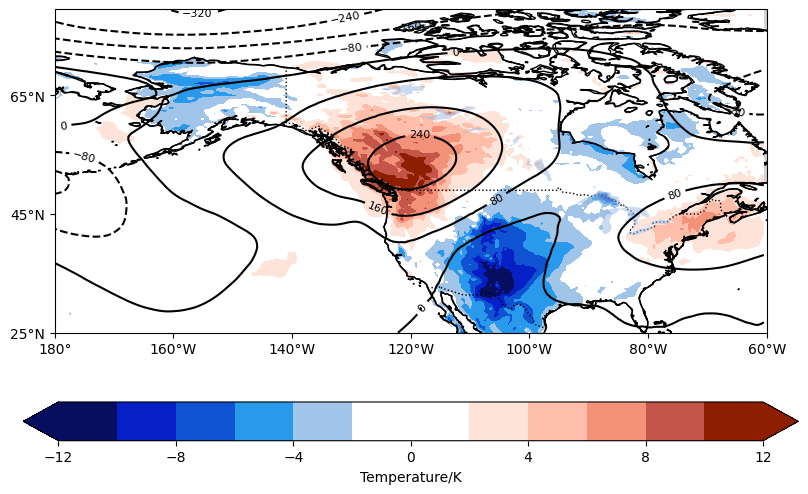

In [93]:
plot_t2m_z500_good_bad(ds_ano_era5_t2m_na_2701_mean_interpolated,ds_ano_era5_z500_na_2701_mean_interpolated , 'era5_reference_2701')

In [ ]:
#################### check the time axis ##############################################################

In [12]:
########################### time array of 0616 #################################################
start_date = "2021-01-01 00:00"

# Create a time array with 57 time steps, each spaced 6 hours apart
time_array = np.arange(0, 1460 * 6, 6)  # 57 time steps, 6-hour interval

# Create a DataArray with time values
time_data_array = xr.DataArray(time_array, dims=["time"], coords={"time": pd.date_range(start=start_date, periods=1460, freq="6H")})

In [18]:
time_data_array

<xarray.DataArray (time: 1460)> Size: 12kB
array([   0,    6,   12, ..., 8742, 8748, 8754])
Coordinates:
  * time     (time) datetime64[ns] 12kB 2021-01-01 ... 2021-12-31T18:00:00

In [17]:
time_data_array.sel(time = slice('2021-06-27T00:00:00.000000000','2021-07-01T00:00:00.000000000'))

<xarray.DataArray (time: 17)> Size: 136B
array([4248, 4254, 4260, 4266, 4272, 4278, 4284, 4290, 4296, 4302, 4308,
       4314, 4320, 4326, 4332, 4338, 4344])
Coordinates:
  * time     (time) datetime64[ns] 136B 2021-06-27 ... 2021-07-01